In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
cust_df = pd.read_csv("../../data/santander_customer_satisfaction/train_santandar.csv",encoding='latin-1')
print('dataset shape:',cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [24]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


null값 없음

In [25]:
print(cust_df['TARGET'].value_counts())

TARGET
0    73012
1     3008
Name: count, dtype: int64


### 전처리
- var3 컬럼의 min값은 fillnan한 것이므로 최빈값으로 대체한다.
- id 피처는 식별자이므로 드랍한다

In [27]:
cust_df['var3'].replace(cust_df['var3'].min(),2,inplace=True)
cust_df.drop('ID',axis=1,inplace=True)

X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]

In [28]:
X_features.shape

(76020, 369)

In [29]:
cust_df.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,2.716483,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,9.447971,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


### 데이터 분리
train, test 데이터셋 모두 원본 데이터셋과 유사한 96:4의 레이블 분포를 갖고 있다.

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_features,y_labels,
                                                test_size=0.2,random_state=0)

print('데이터 분포 확인')
print('train set label distribution')
print(y_train.value_counts()/y_train.count())
print('test set label distribution')
print(y_test.value_counts()/y_test.count())

데이터 분포 확인
train set label distribution
TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64
test set label distribution
TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


In [38]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [37]:
xgb_clf = XGBClassifier(n_estimators=500,random_state=156,
                        early_stopping_rounds=100,eval_metric='auc')
xgb_clf.fit(X_train,y_train,
            eval_set=[(X_train,y_train),(X_test,y_test)])

[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82745
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85831	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84055
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88071	validation_1-auc:0.84117
[16]	validation_0-auc:0.88237	validation_1-auc:0.84101
[17]	validation_0-auc:0.88352	validation_1-auc:0.84071
[18]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=100,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=156, ...)

In [40]:
xgb_pred_prob = xgb_clf.predict_proba(X_test)[:,1]
roc_auc_score(y_test,xgb_pred_prob,average='macro')

0.8413487915404584

## 하이퍼 파라미터 튜닝

In [41]:
from sklearn.model_selection import GridSearchCV
xgb_clf2 = XGBClassifier(n_estimators=100,early_stopping_rounds=30,eval_metric='auc')
params={
    'max_depth':[5,7],
    'min_child_weight':[1,3],
    'colsample_bytree':[0.5,0.75]
}

In [42]:
gridcv = GridSearchCV(xgb_clf2,param_grid=params,cv=3)
gridcv.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)])

[0]	validation_0-logloss:0.47313	validation_1-logloss:0.47438
[1]	validation_0-logloss:0.35262	validation_1-logloss:0.35498
[2]	validation_0-logloss:0.27858	validation_1-logloss:0.28188
[3]	validation_0-logloss:0.23071	validation_1-logloss:0.23468
[4]	validation_0-logloss:0.19883	validation_1-logloss:0.20347
[5]	validation_0-logloss:0.17801	validation_1-logloss:0.18329
[6]	validation_0-logloss:0.16381	validation_1-logloss:0.17001
[7]	validation_0-logloss:0.15299	validation_1-logloss:0.15970
[8]	validation_0-logloss:0.14550	validation_1-logloss:0.15284
[9]	validation_0-logloss:0.14108	validation_1-logloss:0.14916
[10]	validation_0-logloss:0.13825	validation_1-logloss:0.14691
[11]	validation_0-logloss:0.13591	validation_1-logloss:0.14537
[12]	validation_0-logloss:0.13328	validation_1-logloss:0.14315
[13]	validation_0-logloss:0.13153	validation_1-logloss:0.14174
[14]	validation_0-logloss:0.13035	validation_1-logloss:0.14089
[15]	validation_0-logloss:0.12967	validation_1-logloss:0.14078
[1

[22]	validation_0-logloss:0.12579	validation_1-logloss:0.13900
[23]	validation_0-logloss:0.12553	validation_1-logloss:0.13893
[24]	validation_0-logloss:0.12526	validation_1-logloss:0.13878
[25]	validation_0-logloss:0.12490	validation_1-logloss:0.13884
[26]	validation_0-logloss:0.12462	validation_1-logloss:0.13885
[27]	validation_0-logloss:0.12451	validation_1-logloss:0.13874
[28]	validation_0-logloss:0.12442	validation_1-logloss:0.13883
[29]	validation_0-logloss:0.12427	validation_1-logloss:0.13870
[30]	validation_0-logloss:0.12421	validation_1-logloss:0.13863
[31]	validation_0-logloss:0.12406	validation_1-logloss:0.13865
[32]	validation_0-logloss:0.12379	validation_1-logloss:0.13880
[33]	validation_0-logloss:0.12368	validation_1-logloss:0.13869
[34]	validation_0-logloss:0.12359	validation_1-logloss:0.13877
[35]	validation_0-logloss:0.12341	validation_1-logloss:0.13878
[36]	validation_0-logloss:0.12319	validation_1-logloss:0.13884
[37]	validation_0-logloss:0.12300	validation_1-logloss:

[42]	validation_0-logloss:0.12317	validation_1-logloss:0.13984
[43]	validation_0-logloss:0.12308	validation_1-logloss:0.13983
[44]	validation_0-logloss:0.12303	validation_1-logloss:0.13986
[45]	validation_0-logloss:0.12297	validation_1-logloss:0.13982
[46]	validation_0-logloss:0.12279	validation_1-logloss:0.13991
[47]	validation_0-logloss:0.12268	validation_1-logloss:0.13992
[48]	validation_0-logloss:0.12260	validation_1-logloss:0.13988
[49]	validation_0-logloss:0.12247	validation_1-logloss:0.13981
[50]	validation_0-logloss:0.12234	validation_1-logloss:0.13981
[51]	validation_0-logloss:0.12215	validation_1-logloss:0.13980
[52]	validation_0-logloss:0.12193	validation_1-logloss:0.13991
[53]	validation_0-logloss:0.12184	validation_1-logloss:0.13999
[54]	validation_0-logloss:0.12164	validation_1-logloss:0.14007
[0]	validation_0-logloss:0.47320	validation_1-logloss:0.47447
[1]	validation_0-logloss:0.35284	validation_1-logloss:0.35512
[2]	validation_0-logloss:0.27881	validation_1-logloss:0.2

[8]	validation_0-logloss:0.14124	validation_1-logloss:0.15278
[9]	validation_0-logloss:0.13632	validation_1-logloss:0.14907
[10]	validation_0-logloss:0.13284	validation_1-logloss:0.14688
[11]	validation_0-logloss:0.13001	validation_1-logloss:0.14539
[12]	validation_0-logloss:0.12722	validation_1-logloss:0.14330
[13]	validation_0-logloss:0.12501	validation_1-logloss:0.14179
[14]	validation_0-logloss:0.12349	validation_1-logloss:0.14105
[15]	validation_0-logloss:0.12246	validation_1-logloss:0.14112
[16]	validation_0-logloss:0.12141	validation_1-logloss:0.14049
[17]	validation_0-logloss:0.12049	validation_1-logloss:0.14041
[18]	validation_0-logloss:0.12002	validation_1-logloss:0.14044
[19]	validation_0-logloss:0.11936	validation_1-logloss:0.14026
[20]	validation_0-logloss:0.11917	validation_1-logloss:0.14036
[21]	validation_0-logloss:0.11903	validation_1-logloss:0.14043
[22]	validation_0-logloss:0.11827	validation_1-logloss:0.14049
[23]	validation_0-logloss:0.11779	validation_1-logloss:0.

[41]	validation_0-logloss:0.11941	validation_1-logloss:0.14140
[42]	validation_0-logloss:0.11924	validation_1-logloss:0.14165
[43]	validation_0-logloss:0.11916	validation_1-logloss:0.14168
[44]	validation_0-logloss:0.11879	validation_1-logloss:0.14187
[45]	validation_0-logloss:0.11864	validation_1-logloss:0.14187
[46]	validation_0-logloss:0.11861	validation_1-logloss:0.14193
[47]	validation_0-logloss:0.11827	validation_1-logloss:0.14183
[48]	validation_0-logloss:0.11812	validation_1-logloss:0.14183
[49]	validation_0-logloss:0.11799	validation_1-logloss:0.14182
[50]	validation_0-logloss:0.11794	validation_1-logloss:0.14191
[51]	validation_0-logloss:0.11791	validation_1-logloss:0.14197
[52]	validation_0-logloss:0.11773	validation_1-logloss:0.14204
[53]	validation_0-logloss:0.11772	validation_1-logloss:0.14215
[0]	validation_0-logloss:0.47282	validation_1-logloss:0.47426
[1]	validation_0-logloss:0.35210	validation_1-logloss:0.35470
[2]	validation_0-logloss:0.27776	validation_1-logloss:0.2

[5]	validation_0-logloss:0.17692	validation_1-logloss:0.18292
[6]	validation_0-logloss:0.16210	validation_1-logloss:0.16884
[7]	validation_0-logloss:0.15188	validation_1-logloss:0.15909
[8]	validation_0-logloss:0.14472	validation_1-logloss:0.15262
[9]	validation_0-logloss:0.14003	validation_1-logloss:0.14874
[10]	validation_0-logloss:0.13692	validation_1-logloss:0.14630
[11]	validation_0-logloss:0.13467	validation_1-logloss:0.14484
[12]	validation_0-logloss:0.13255	validation_1-logloss:0.14316
[13]	validation_0-logloss:0.13073	validation_1-logloss:0.14200
[14]	validation_0-logloss:0.12959	validation_1-logloss:0.14130
[15]	validation_0-logloss:0.12878	validation_1-logloss:0.14082
[16]	validation_0-logloss:0.12823	validation_1-logloss:0.14049
[17]	validation_0-logloss:0.12774	validation_1-logloss:0.14044
[18]	validation_0-logloss:0.12725	validation_1-logloss:0.14063
[19]	validation_0-logloss:0.12684	validation_1-logloss:0.14044
[20]	validation_0-logloss:0.12655	validation_1-logloss:0.140

[28]	validation_0-logloss:0.12436	validation_1-logloss:0.13842
[29]	validation_0-logloss:0.12430	validation_1-logloss:0.13845
[30]	validation_0-logloss:0.12409	validation_1-logloss:0.13841
[31]	validation_0-logloss:0.12381	validation_1-logloss:0.13840
[32]	validation_0-logloss:0.12345	validation_1-logloss:0.13865
[33]	validation_0-logloss:0.12332	validation_1-logloss:0.13863
[34]	validation_0-logloss:0.12318	validation_1-logloss:0.13872
[35]	validation_0-logloss:0.12310	validation_1-logloss:0.13876
[36]	validation_0-logloss:0.12299	validation_1-logloss:0.13870
[37]	validation_0-logloss:0.12281	validation_1-logloss:0.13876
[38]	validation_0-logloss:0.12260	validation_1-logloss:0.13885
[39]	validation_0-logloss:0.12255	validation_1-logloss:0.13888
[40]	validation_0-logloss:0.12250	validation_1-logloss:0.13892
[41]	validation_0-logloss:0.12237	validation_1-logloss:0.13889
[42]	validation_0-logloss:0.12213	validation_1-logloss:0.13905
[43]	validation_0-logloss:0.12200	validation_1-logloss:

[2]	validation_0-logloss:0.27866	validation_1-logloss:0.28185
[3]	validation_0-logloss:0.23064	validation_1-logloss:0.23463
[4]	validation_0-logloss:0.19866	validation_1-logloss:0.20320
[5]	validation_0-logloss:0.17696	validation_1-logloss:0.18223
[6]	validation_0-logloss:0.16197	validation_1-logloss:0.16819
[7]	validation_0-logloss:0.15170	validation_1-logloss:0.15870
[8]	validation_0-logloss:0.14465	validation_1-logloss:0.15221
[9]	validation_0-logloss:0.13993	validation_1-logloss:0.14814
[10]	validation_0-logloss:0.13692	validation_1-logloss:0.14546
[11]	validation_0-logloss:0.13484	validation_1-logloss:0.14366
[12]	validation_0-logloss:0.13270	validation_1-logloss:0.14202
[13]	validation_0-logloss:0.13120	validation_1-logloss:0.14081
[14]	validation_0-logloss:0.13018	validation_1-logloss:0.14000
[15]	validation_0-logloss:0.12941	validation_1-logloss:0.13944
[16]	validation_0-logloss:0.12872	validation_1-logloss:0.13899
[17]	validation_0-logloss:0.12824	validation_1-logloss:0.13886


[24]	validation_0-logloss:0.11708	validation_1-logloss:0.13991
[25]	validation_0-logloss:0.11672	validation_1-logloss:0.13997
[26]	validation_0-logloss:0.11648	validation_1-logloss:0.14006
[27]	validation_0-logloss:0.11616	validation_1-logloss:0.14020
[28]	validation_0-logloss:0.11591	validation_1-logloss:0.14018
[29]	validation_0-logloss:0.11581	validation_1-logloss:0.14008
[30]	validation_0-logloss:0.11564	validation_1-logloss:0.14015
[31]	validation_0-logloss:0.11553	validation_1-logloss:0.14022
[32]	validation_0-logloss:0.11520	validation_1-logloss:0.14018
[33]	validation_0-logloss:0.11467	validation_1-logloss:0.14036
[34]	validation_0-logloss:0.11416	validation_1-logloss:0.14024
[35]	validation_0-logloss:0.11396	validation_1-logloss:0.14025
[36]	validation_0-logloss:0.11360	validation_1-logloss:0.14051
[37]	validation_0-logloss:0.11351	validation_1-logloss:0.14050
[38]	validation_0-logloss:0.11343	validation_1-logloss:0.14050
[39]	validation_0-logloss:0.11324	validation_1-logloss:

[11]	validation_0-logloss:0.13037	validation_1-logloss:0.14338
[12]	validation_0-logloss:0.12784	validation_1-logloss:0.14156
[13]	validation_0-logloss:0.12580	validation_1-logloss:0.14036
[14]	validation_0-logloss:0.12462	validation_1-logloss:0.13976
[15]	validation_0-logloss:0.12359	validation_1-logloss:0.13943
[16]	validation_0-logloss:0.12291	validation_1-logloss:0.13902
[17]	validation_0-logloss:0.12237	validation_1-logloss:0.13889
[18]	validation_0-logloss:0.12217	validation_1-logloss:0.13889
[19]	validation_0-logloss:0.12166	validation_1-logloss:0.13879
[20]	validation_0-logloss:0.12145	validation_1-logloss:0.13885
[21]	validation_0-logloss:0.12108	validation_1-logloss:0.13885
[22]	validation_0-logloss:0.12074	validation_1-logloss:0.13896
[23]	validation_0-logloss:0.12035	validation_1-logloss:0.13895
[24]	validation_0-logloss:0.11989	validation_1-logloss:0.13882
[25]	validation_0-logloss:0.11969	validation_1-logloss:0.13887
[26]	validation_0-logloss:0.11961	validation_1-logloss:

[46]	validation_0-logloss:0.12034	validation_1-logloss:0.13903
[47]	validation_0-logloss:0.12023	validation_1-logloss:0.13909
[48]	validation_0-logloss:0.11993	validation_1-logloss:0.13911
[49]	validation_0-logloss:0.11973	validation_1-logloss:0.13915
[50]	validation_0-logloss:0.11948	validation_1-logloss:0.13913
[51]	validation_0-logloss:0.11923	validation_1-logloss:0.13929
[52]	validation_0-logloss:0.11913	validation_1-logloss:0.13931
[53]	validation_0-logloss:0.11906	validation_1-logloss:0.13937
[54]	validation_0-logloss:0.11870	validation_1-logloss:0.13955
[55]	validation_0-logloss:0.11863	validation_1-logloss:0.13955
[56]	validation_0-logloss:0.11846	validation_1-logloss:0.13961
[57]	validation_0-logloss:0.11833	validation_1-logloss:0.13966
[58]	validation_0-logloss:0.11817	validation_1-logloss:0.13970


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=30,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.75], 'max_depth': [5, 7],
                         'min_child_weight': [1, 3]})

In [43]:
print('Best params:',gridcv.best_params_)
print("Best score:",gridcv.best_score_)

Best params: {'colsample_bytree': 0.5, 'max_depth': 5, 'min_child_weight': 3}
Best score: 0.9608984477769008


## 알아낸 최적의 하이퍼 파라미터로 튜닝하고, plot_importance확인

In [63]:
xgb_clf = XGBClassifier(n_estimators=500,random_state=156,
                       max_depth=5,colsample_bytree=0.5,min_child_weight=3,
                       eval_metric='auc',early_stopping_rounds=150)
xgb_clf.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)])

[10:58:02] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "importance_types" } are not used.

[0]	validation_0-auc:0.72743	validation_1-auc:0.73391
[1]	validation_0-auc:0.81610	validation_1-auc:0.81933
[2]	validation_0-auc:0.81357	validation_1-auc:0.81305
[3]	validation_0-auc:0.81604	validation_1-auc:0.81038
[4]	validation_0-auc:0.81552	validation_1-auc:0.80726
[5]	validation_0-auc:0.83270	validation_1-auc:0.82306
[6]	validation_0-auc:0.83929	validation_1-auc:0.83059
[7]	validation_0-auc:0.84477	validation_1-auc:0.83422
[8]	validation_0-auc:0.84905	validation_1-auc:0.83685
[9]	validation_0-auc:0.84744	validation_1-auc:0.83764
[10]	validation_0-auc:0.85271	validation_1-auc:0.83942
[11]	validation_0-auc:0.85233	validation_1-auc:0.83861
[12]	validation_0-auc:0.85704	validation_1-auc:0.84007
[13]	validation_0-auc:0.85678	validation_1-auc:0.84042
[14]	validation_0-auc:0.85994	validation_1-auc:0.84271
[15]	validation_0-auc:0.86101	valid

[146]	validation_0-auc:0.91964	validation_1-auc:0.82976
[147]	validation_0-auc:0.91993	validation_1-auc:0.82957
[148]	validation_0-auc:0.92020	validation_1-auc:0.82987
[149]	validation_0-auc:0.92029	validation_1-auc:0.82995
[150]	validation_0-auc:0.92040	validation_1-auc:0.83010
[151]	validation_0-auc:0.92052	validation_1-auc:0.83011
[152]	validation_0-auc:0.92065	validation_1-auc:0.83032
[153]	validation_0-auc:0.92080	validation_1-auc:0.83016
[154]	validation_0-auc:0.92152	validation_1-auc:0.83010
[155]	validation_0-auc:0.92197	validation_1-auc:0.83003
[156]	validation_0-auc:0.92241	validation_1-auc:0.82992
[157]	validation_0-auc:0.92261	validation_1-auc:0.82978
[158]	validation_0-auc:0.92265	validation_1-auc:0.82963
[159]	validation_0-auc:0.92293	validation_1-auc:0.82955
[160]	validation_0-auc:0.92298	validation_1-auc:0.82954
[161]	validation_0-auc:0.92324	validation_1-auc:0.82960
[162]	validation_0-auc:0.92337	validation_1-auc:0.82929
[163]	validation_0-auc:0.92348	validation_1-auc:

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=150,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              importance_types='auc', interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [64]:
roc_auc = roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1],average='macro')
roc_auc

0.8442792761583912

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

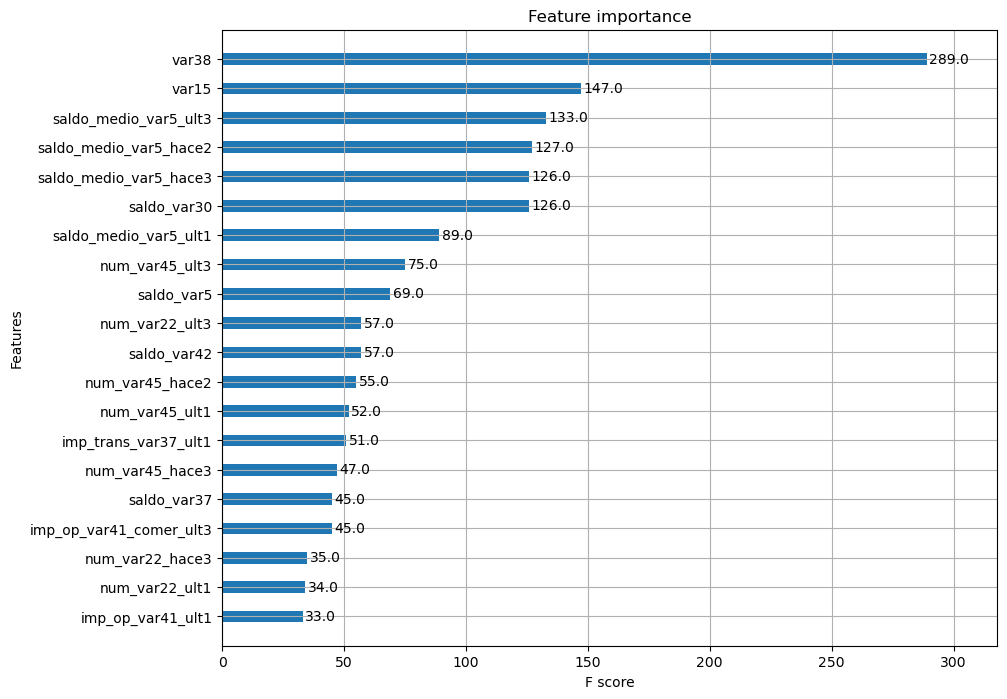

In [71]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf,ax=ax,max_num_features=20,height=0.4,
               importance_type='weight')

# LGBM

In [75]:
from lightgbm import LGBMClassifier
from lightgbm import log_evaluation

In [84]:
lgbm_clf = LGBMClassifier(n_estimators=500,early_stopping_rounds=150)
evals=[(X_train,y_train),(X_test,y_test)]
lgbm_clf.fit(X_train,y_train,eval_set=evals,eval_metric='auc')

[1]	training's auc: 0.823612	training's binary_logloss: 0.156016	valid_1's auc: 0.817384	valid_1's binary_logloss: 0.165046
[2]	training's auc: 0.827661	training's binary_logloss: 0.150579	valid_1's auc: 0.818903	valid_1's binary_logloss: 0.160006
[3]	training's auc: 0.837671	training's binary_logloss: 0.146617	valid_1's auc: 0.827707	valid_1's binary_logloss: 0.156323
[4]	training's auc: 0.843171	training's binary_logloss: 0.143452	valid_1's auc: 0.832155	valid_1's binary_logloss: 0.153463
[5]	training's auc: 0.845828	training's binary_logloss: 0.140934	valid_1's auc: 0.834677	valid_1's binary_logloss: 0.151256
[6]	training's auc: 0.846531	training's binary_logloss: 0.138851	valid_1's auc: 0.834093	valid_1's binary_logloss: 0.149427
[7]	training's auc: 0.850239	training's binary_logloss: 0.136968	valid_1's auc: 0.837046	valid_1's binary_logloss: 0.147961
[8]	training's auc: 0.852495	training's binary_logloss: 0.135451	valid_1's auc: 0.837838	valid_1's binary_logloss: 0.146591
[9]	trai

[79]	training's auc: 0.915934	training's binary_logloss: 0.1092	valid_1's auc: 0.837541	valid_1's binary_logloss: 0.139944
[80]	training's auc: 0.916607	training's binary_logloss: 0.108946	valid_1's auc: 0.838013	valid_1's binary_logloss: 0.13983
[81]	training's auc: 0.916807	training's binary_logloss: 0.108795	valid_1's auc: 0.83789	valid_1's binary_logloss: 0.139874
[82]	training's auc: 0.917234	training's binary_logloss: 0.108586	valid_1's auc: 0.837671	valid_1's binary_logloss: 0.139975
[83]	training's auc: 0.917623	training's binary_logloss: 0.108407	valid_1's auc: 0.837707	valid_1's binary_logloss: 0.139972
[84]	training's auc: 0.917831	training's binary_logloss: 0.108237	valid_1's auc: 0.837631	valid_1's binary_logloss: 0.140011
[85]	training's auc: 0.918049	training's binary_logloss: 0.10813	valid_1's auc: 0.837496	valid_1's binary_logloss: 0.140023
[86]	training's auc: 0.918313	training's binary_logloss: 0.107976	valid_1's auc: 0.83757	valid_1's binary_logloss: 0.140021
[87]	t

[159]	training's auc: 0.938877	training's binary_logloss: 0.0976385	valid_1's auc: 0.835064	valid_1's binary_logloss: 0.141515
[160]	training's auc: 0.938951	training's binary_logloss: 0.0975496	valid_1's auc: 0.835209	valid_1's binary_logloss: 0.141518
[161]	training's auc: 0.93923	training's binary_logloss: 0.0974029	valid_1's auc: 0.835224	valid_1's binary_logloss: 0.141557
[162]	training's auc: 0.939475	training's binary_logloss: 0.0973024	valid_1's auc: 0.835078	valid_1's binary_logloss: 0.141594
[163]	training's auc: 0.939629	training's binary_logloss: 0.0971908	valid_1's auc: 0.83489	valid_1's binary_logloss: 0.141653
[164]	training's auc: 0.939716	training's binary_logloss: 0.0971119	valid_1's auc: 0.834684	valid_1's binary_logloss: 0.141708
[165]	training's auc: 0.939835	training's binary_logloss: 0.0970084	valid_1's auc: 0.834549	valid_1's binary_logloss: 0.141768


LGBMClassifier(early_stopping_rounds=150, n_estimators=500)

In [82]:
lgbm_auc = roc_auc_score(y_test,lgbm_clf.predict_proba(X_test)[:,1],average='macro')
lgbm_auc

0.8397027620385867

In [89]:
lgbm_clf_cv = LGBMClassifier(n_estimators=500)
params={
    'num_leaves':[32,64],
    'max_depth':[128,160],
    'min_child_samples':[60,100],
    'subsample':[0.8,1]
}
gridcv_lgbm = GridSearchCV(lgbm_clf_cv,param_grid=params,cv=3)
gridcv_lgbm.fit(X_train,y_train,eval_metric='auc',eval_set=evals,
               early_stopping_rounds=200)

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832262	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826533	valid_1's binary_logloss: 0.156346
[4]	valid_0's auc: 0.83865	valid_0's binary_logloss: 0.144126	valid_1's auc: 0.833166	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.842822	valid_0's binary_logloss: 0.141725	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.151167
[6]	valid_0's auc: 0.844702	valid_0's binary_logloss: 0.139642	valid_1's auc: 0.837094	valid_1's binary_logloss: 0.149356
[7]	valid_0's auc: 0.847144	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.147853
[8]	valid_0's auc: 0.848277	valid_0's binary_logloss: 0.136499	valid_1's auc: 0.837663	valid_1's binary_logloss: 0.146543
[9]	valid_0's auc: 0.849328	v

[72]	valid_0's auc: 0.891558	valid_0's binary_logloss: 0.116702	valid_1's auc: 0.827902	valid_1's binary_logloss: 0.142012
[73]	valid_0's auc: 0.891602	valid_0's binary_logloss: 0.116648	valid_1's auc: 0.827793	valid_1's binary_logloss: 0.142096
[74]	valid_0's auc: 0.89226	valid_0's binary_logloss: 0.116495	valid_1's auc: 0.828225	valid_1's binary_logloss: 0.142068
[75]	valid_0's auc: 0.892335	valid_0's binary_logloss: 0.116396	valid_1's auc: 0.828496	valid_1's binary_logloss: 0.142
[76]	valid_0's auc: 0.892413	valid_0's binary_logloss: 0.116309	valid_1's auc: 0.828479	valid_1's binary_logloss: 0.142037
[77]	valid_0's auc: 0.892724	valid_0's binary_logloss: 0.116193	valid_1's auc: 0.828775	valid_1's binary_logloss: 0.141984
[78]	valid_0's auc: 0.893152	valid_0's binary_logloss: 0.116087	valid_1's auc: 0.828763	valid_1's binary_logloss: 0.142013
[79]	valid_0's auc: 0.893164	valid_0's binary_logloss: 0.116022	valid_1's auc: 0.828658	valid_1's binary_logloss: 0.142056
[80]	valid_0's auc: 

[152]	valid_0's auc: 0.902835	valid_0's binary_logloss: 0.109864	valid_1's auc: 0.822794	valid_1's binary_logloss: 0.145425
[153]	valid_0's auc: 0.902864	valid_0's binary_logloss: 0.109815	valid_1's auc: 0.822542	valid_1's binary_logloss: 0.14552
[154]	valid_0's auc: 0.90282	valid_0's binary_logloss: 0.109797	valid_1's auc: 0.822455	valid_1's binary_logloss: 0.14556
[155]	valid_0's auc: 0.902758	valid_0's binary_logloss: 0.109772	valid_1's auc: 0.822348	valid_1's binary_logloss: 0.14563
[156]	valid_0's auc: 0.902633	valid_0's binary_logloss: 0.109767	valid_1's auc: 0.822194	valid_1's binary_logloss: 0.145698
[157]	valid_0's auc: 0.902721	valid_0's binary_logloss: 0.109697	valid_1's auc: 0.822248	valid_1's binary_logloss: 0.145719
[158]	valid_0's auc: 0.902708	valid_0's binary_logloss: 0.109664	valid_1's auc: 0.822398	valid_1's binary_logloss: 0.145679
[159]	valid_0's auc: 0.903153	valid_0's binary_logloss: 0.109478	valid_1's auc: 0.822556	valid_1's binary_logloss: 0.145652
[160]	valid_

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156452	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.165418
[2]	valid_0's auc: 0.827277	valid_0's binary_logloss: 0.151084	valid_1's auc: 0.819635	valid_1's binary_logloss: 0.160159
[3]	valid_0's auc: 0.837033	valid_0's binary_logloss: 0.14722	valid_1's auc: 0.828221	valid_1's binary_logloss: 0.156492
[4]	valid_0's auc: 0.840167	valid_0's binary_logloss: 0.14423	valid_1's auc: 0.830942	valid_1's binary_logloss: 0.153586
[5]	valid_0's auc: 0.842499	valid_0's binary_logloss: 0.141721	valid_1's auc: 0.833301	valid_1's binary_logloss: 0.151219
[6]	valid_0's auc: 0.845403	valid_0's binary_logloss: 0.139708	valid_1's auc: 0.836412	valid_1's binary_logloss: 0.149312
[7]	valid_0's auc: 0.848049	valid_0's binary_logloss: 0.138024	valid_1's auc: 0.836054	valid_1's binary_logloss: 0.14779
[8]	valid_0's auc: 0.849694	valid_0's binary_logloss: 0.136542	valid_1's auc: 0.837537	valid_1's binary_logloss: 0.146417
[9]	valid_0's auc: 0.851646

[78]	valid_0's auc: 0.894068	valid_0's binary_logloss: 0.11567	valid_1's auc: 0.837073	valid_1's binary_logloss: 0.139974
[79]	valid_0's auc: 0.894273	valid_0's binary_logloss: 0.115558	valid_1's auc: 0.836937	valid_1's binary_logloss: 0.14002
[80]	valid_0's auc: 0.894504	valid_0's binary_logloss: 0.115429	valid_1's auc: 0.836766	valid_1's binary_logloss: 0.140076
[81]	valid_0's auc: 0.894687	valid_0's binary_logloss: 0.115316	valid_1's auc: 0.836693	valid_1's binary_logloss: 0.140123
[82]	valid_0's auc: 0.894884	valid_0's binary_logloss: 0.115215	valid_1's auc: 0.836769	valid_1's binary_logloss: 0.14013
[83]	valid_0's auc: 0.895284	valid_0's binary_logloss: 0.115108	valid_1's auc: 0.836873	valid_1's binary_logloss: 0.14013
[84]	valid_0's auc: 0.895392	valid_0's binary_logloss: 0.115016	valid_1's auc: 0.836993	valid_1's binary_logloss: 0.140145
[85]	valid_0's auc: 0.895567	valid_0's binary_logloss: 0.114915	valid_1's auc: 0.836835	valid_1's binary_logloss: 0.140206
[86]	valid_0's auc: 

[164]	valid_0's auc: 0.90744	valid_0's binary_logloss: 0.107605	valid_1's auc: 0.830226	valid_1's binary_logloss: 0.143713
[165]	valid_0's auc: 0.907669	valid_0's binary_logloss: 0.10749	valid_1's auc: 0.830182	valid_1's binary_logloss: 0.143745
[166]	valid_0's auc: 0.908048	valid_0's binary_logloss: 0.107301	valid_1's auc: 0.83012	valid_1's binary_logloss: 0.143797
[167]	valid_0's auc: 0.908018	valid_0's binary_logloss: 0.107259	valid_1's auc: 0.830071	valid_1's binary_logloss: 0.14387
[168]	valid_0's auc: 0.907995	valid_0's binary_logloss: 0.107221	valid_1's auc: 0.829837	valid_1's binary_logloss: 0.143971
[169]	valid_0's auc: 0.908071	valid_0's binary_logloss: 0.107169	valid_1's auc: 0.829545	valid_1's binary_logloss: 0.144078
[170]	valid_0's auc: 0.908545	valid_0's binary_logloss: 0.107033	valid_1's auc: 0.829152	valid_1's binary_logloss: 0.144177
[171]	valid_0's auc: 0.908565	valid_0's binary_logloss: 0.106993	valid_1's auc: 0.828822	valid_1's binary_logloss: 0.144291
[172]	valid_

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156528	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165101
[2]	valid_0's auc: 0.827488	valid_0's binary_logloss: 0.151189	valid_1's auc: 0.822299	valid_1's binary_logloss: 0.160072
[3]	valid_0's auc: 0.837855	valid_0's binary_logloss: 0.147263	valid_1's auc: 0.829855	valid_1's binary_logloss: 0.156527
[4]	valid_0's auc: 0.840063	valid_0's binary_logloss: 0.144261	valid_1's auc: 0.833088	valid_1's binary_logloss: 0.153446
[5]	valid_0's auc: 0.842802	valid_0's binary_logloss: 0.141691	valid_1's auc: 0.834541	valid_1's binary_logloss: 0.151144
[6]	valid_0's auc: 0.844	valid_0's binary_logloss: 0.139654	valid_1's auc: 0.834542	valid_1's binary_logloss: 0.149333
[7]	valid_0's auc: 0.845838	valid_0's binary_logloss: 0.138002	valid_1's auc: 0.835645	valid_1's binary_logloss: 0.147676
[8]	valid_0's auc: 0.846869	valid_0's binary_logloss: 0.136628	valid_1's auc: 0.836118	valid_1's binary_logloss: 0.146491
[9]	valid_0's auc: 0.849282	

[83]	valid_0's auc: 0.896054	valid_0's binary_logloss: 0.114678	valid_1's auc: 0.836488	valid_1's binary_logloss: 0.140068
[84]	valid_0's auc: 0.896305	valid_0's binary_logloss: 0.114539	valid_1's auc: 0.83652	valid_1's binary_logloss: 0.140077
[85]	valid_0's auc: 0.896859	valid_0's binary_logloss: 0.114328	valid_1's auc: 0.836447	valid_1's binary_logloss: 0.140117
[86]	valid_0's auc: 0.89731	valid_0's binary_logloss: 0.114193	valid_1's auc: 0.836749	valid_1's binary_logloss: 0.140071
[87]	valid_0's auc: 0.897361	valid_0's binary_logloss: 0.114125	valid_1's auc: 0.836611	valid_1's binary_logloss: 0.140127
[88]	valid_0's auc: 0.897477	valid_0's binary_logloss: 0.114045	valid_1's auc: 0.836278	valid_1's binary_logloss: 0.140222
[89]	valid_0's auc: 0.897566	valid_0's binary_logloss: 0.113968	valid_1's auc: 0.836412	valid_1's binary_logloss: 0.140217
[90]	valid_0's auc: 0.897624	valid_0's binary_logloss: 0.11387	valid_1's auc: 0.836295	valid_1's binary_logloss: 0.140278
[91]	valid_0's auc:

[163]	valid_0's auc: 0.909611	valid_0's binary_logloss: 0.106547	valid_1's auc: 0.832033	valid_1's binary_logloss: 0.142683
[164]	valid_0's auc: 0.90975	valid_0's binary_logloss: 0.106466	valid_1's auc: 0.83185	valid_1's binary_logloss: 0.14274
[165]	valid_0's auc: 0.909701	valid_0's binary_logloss: 0.106429	valid_1's auc: 0.831826	valid_1's binary_logloss: 0.14276
[166]	valid_0's auc: 0.909757	valid_0's binary_logloss: 0.106374	valid_1's auc: 0.831757	valid_1's binary_logloss: 0.142772
[167]	valid_0's auc: 0.90988	valid_0's binary_logloss: 0.106305	valid_1's auc: 0.831605	valid_1's binary_logloss: 0.142816
[168]	valid_0's auc: 0.909852	valid_0's binary_logloss: 0.106272	valid_1's auc: 0.831236	valid_1's binary_logloss: 0.142927
[169]	valid_0's auc: 0.909812	valid_0's binary_logloss: 0.10625	valid_1's auc: 0.831167	valid_1's binary_logloss: 0.142978
[170]	valid_0's auc: 0.909753	valid_0's binary_logloss: 0.106233	valid_1's auc: 0.831028	valid_1's binary_logloss: 0.143022
[171]	valid_0'

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832262	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826533	valid_1's binary_logloss: 0.156346
[4]	valid_0's auc: 0.83865	valid_0's binary_logloss: 0.144126	valid_1's auc: 0.833166	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.842822	valid_0's binary_logloss: 0.141725	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.151167
[6]	valid_0's auc: 0.844702	valid_0's binary_logloss: 0.139642	valid_1's auc: 0.837094	valid_1's binary_logloss: 0.149356
[7]	valid_0's auc: 0.847144	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.147853
[8]	valid_0's auc: 0.848277	valid_0's binary_logloss: 0.136499	valid_1's auc: 0.837663	valid_1's binary_logloss: 0.146543
[9]	valid_0's auc: 0.849328	v

[81]	valid_0's auc: 0.89346	valid_0's binary_logloss: 0.115789	valid_1's auc: 0.828949	valid_1's binary_logloss: 0.142048
[82]	valid_0's auc: 0.893828	valid_0's binary_logloss: 0.115606	valid_1's auc: 0.829065	valid_1's binary_logloss: 0.142024
[83]	valid_0's auc: 0.894386	valid_0's binary_logloss: 0.115442	valid_1's auc: 0.829141	valid_1's binary_logloss: 0.142056
[84]	valid_0's auc: 0.894739	valid_0's binary_logloss: 0.115328	valid_1's auc: 0.828999	valid_1's binary_logloss: 0.142124
[85]	valid_0's auc: 0.894905	valid_0's binary_logloss: 0.115179	valid_1's auc: 0.828444	valid_1's binary_logloss: 0.142222
[86]	valid_0's auc: 0.895067	valid_0's binary_logloss: 0.115081	valid_1's auc: 0.828585	valid_1's binary_logloss: 0.142227
[87]	valid_0's auc: 0.895074	valid_0's binary_logloss: 0.115009	valid_1's auc: 0.828605	valid_1's binary_logloss: 0.142226
[88]	valid_0's auc: 0.89542	valid_0's binary_logloss: 0.114906	valid_1's auc: 0.828526	valid_1's binary_logloss: 0.142254
[89]	valid_0's auc

[167]	valid_0's auc: 0.904572	valid_0's binary_logloss: 0.108755	valid_1's auc: 0.821906	valid_1's binary_logloss: 0.146084
[168]	valid_0's auc: 0.904672	valid_0's binary_logloss: 0.108715	valid_1's auc: 0.821991	valid_1's binary_logloss: 0.146129
[169]	valid_0's auc: 0.904826	valid_0's binary_logloss: 0.108617	valid_1's auc: 0.821901	valid_1's binary_logloss: 0.146213
[170]	valid_0's auc: 0.904832	valid_0's binary_logloss: 0.10858	valid_1's auc: 0.822084	valid_1's binary_logloss: 0.146189
[171]	valid_0's auc: 0.90483	valid_0's binary_logloss: 0.108569	valid_1's auc: 0.821998	valid_1's binary_logloss: 0.146263
[172]	valid_0's auc: 0.905009	valid_0's binary_logloss: 0.108472	valid_1's auc: 0.822105	valid_1's binary_logloss: 0.14625
[173]	valid_0's auc: 0.905106	valid_0's binary_logloss: 0.108436	valid_1's auc: 0.822259	valid_1's binary_logloss: 0.146288
[174]	valid_0's auc: 0.905197	valid_0's binary_logloss: 0.108385	valid_1's auc: 0.822248	valid_1's binary_logloss: 0.146314
[175]	valid

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156452	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.165418
[2]	valid_0's auc: 0.827277	valid_0's binary_logloss: 0.151084	valid_1's auc: 0.819635	valid_1's binary_logloss: 0.160159
[3]	valid_0's auc: 0.837033	valid_0's binary_logloss: 0.14722	valid_1's auc: 0.828221	valid_1's binary_logloss: 0.156492
[4]	valid_0's auc: 0.840167	valid_0's binary_logloss: 0.14423	valid_1's auc: 0.830942	valid_1's binary_logloss: 0.153586
[5]	valid_0's auc: 0.842499	valid_0's binary_logloss: 0.141721	valid_1's auc: 0.833301	valid_1's binary_logloss: 0.151219
[6]	valid_0's auc: 0.845403	valid_0's binary_logloss: 0.139708	valid_1's auc: 0.836412	valid_1's binary_logloss: 0.149312
[7]	valid_0's auc: 0.848049	valid_0's binary_logloss: 0.138024	valid_1's auc: 0.836054	valid_1's binary_logloss: 0.14779
[8]	valid_0's auc: 0.849694	valid_0's binary_logloss: 0.136542	valid_1's auc: 0.837537	valid_1's binary_logloss: 0.146417
[9]	valid_0's auc: 0.851646

[89]	valid_0's auc: 0.896488	valid_0's binary_logloss: 0.114388	valid_1's auc: 0.836241	valid_1's binary_logloss: 0.140411
[90]	valid_0's auc: 0.896531	valid_0's binary_logloss: 0.114326	valid_1's auc: 0.836268	valid_1's binary_logloss: 0.140444
[91]	valid_0's auc: 0.896754	valid_0's binary_logloss: 0.114198	valid_1's auc: 0.836041	valid_1's binary_logloss: 0.140505
[92]	valid_0's auc: 0.897093	valid_0's binary_logloss: 0.114051	valid_1's auc: 0.836192	valid_1's binary_logloss: 0.140474
[93]	valid_0's auc: 0.89719	valid_0's binary_logloss: 0.113968	valid_1's auc: 0.835823	valid_1's binary_logloss: 0.140581
[94]	valid_0's auc: 0.89743	valid_0's binary_logloss: 0.11388	valid_1's auc: 0.835958	valid_1's binary_logloss: 0.14062
[95]	valid_0's auc: 0.897522	valid_0's binary_logloss: 0.113814	valid_1's auc: 0.835884	valid_1's binary_logloss: 0.140659
[96]	valid_0's auc: 0.897724	valid_0's binary_logloss: 0.113701	valid_1's auc: 0.835575	valid_1's binary_logloss: 0.140775
[97]	valid_0's auc: 

[176]	valid_0's auc: 0.908947	valid_0's binary_logloss: 0.106654	valid_1's auc: 0.827929	valid_1's binary_logloss: 0.144645
[177]	valid_0's auc: 0.909167	valid_0's binary_logloss: 0.106538	valid_1's auc: 0.827515	valid_1's binary_logloss: 0.144765
[178]	valid_0's auc: 0.909534	valid_0's binary_logloss: 0.106403	valid_1's auc: 0.827135	valid_1's binary_logloss: 0.144888
[179]	valid_0's auc: 0.90963	valid_0's binary_logloss: 0.106337	valid_1's auc: 0.827151	valid_1's binary_logloss: 0.144852
[180]	valid_0's auc: 0.90961	valid_0's binary_logloss: 0.106297	valid_1's auc: 0.827052	valid_1's binary_logloss: 0.144908
[181]	valid_0's auc: 0.909658	valid_0's binary_logloss: 0.106245	valid_1's auc: 0.827087	valid_1's binary_logloss: 0.144894
[182]	valid_0's auc: 0.909778	valid_0's binary_logloss: 0.106142	valid_1's auc: 0.826978	valid_1's binary_logloss: 0.144941
[183]	valid_0's auc: 0.909916	valid_0's binary_logloss: 0.106034	valid_1's auc: 0.826879	valid_1's binary_logloss: 0.144992
[184]	vali

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156528	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165101
[2]	valid_0's auc: 0.827488	valid_0's binary_logloss: 0.151189	valid_1's auc: 0.822299	valid_1's binary_logloss: 0.160072
[3]	valid_0's auc: 0.837855	valid_0's binary_logloss: 0.147263	valid_1's auc: 0.829855	valid_1's binary_logloss: 0.156527
[4]	valid_0's auc: 0.840063	valid_0's binary_logloss: 0.144261	valid_1's auc: 0.833088	valid_1's binary_logloss: 0.153446
[5]	valid_0's auc: 0.842802	valid_0's binary_logloss: 0.141691	valid_1's auc: 0.834541	valid_1's binary_logloss: 0.151144
[6]	valid_0's auc: 0.844	valid_0's binary_logloss: 0.139654	valid_1's auc: 0.834542	valid_1's binary_logloss: 0.149333
[7]	valid_0's auc: 0.845838	valid_0's binary_logloss: 0.138002	valid_1's auc: 0.835645	valid_1's binary_logloss: 0.147676
[8]	valid_0's auc: 0.846869	valid_0's binary_logloss: 0.136628	valid_1's auc: 0.836118	valid_1's binary_logloss: 0.146491
[9]	valid_0's auc: 0.849282	

[81]	valid_0's auc: 0.895627	valid_0's binary_logloss: 0.11496	valid_1's auc: 0.836667	valid_1's binary_logloss: 0.13999
[82]	valid_0's auc: 0.895883	valid_0's binary_logloss: 0.114812	valid_1's auc: 0.8365	valid_1's binary_logloss: 0.14006
[83]	valid_0's auc: 0.896054	valid_0's binary_logloss: 0.114678	valid_1's auc: 0.836488	valid_1's binary_logloss: 0.140068
[84]	valid_0's auc: 0.896305	valid_0's binary_logloss: 0.114539	valid_1's auc: 0.83652	valid_1's binary_logloss: 0.140077
[85]	valid_0's auc: 0.896859	valid_0's binary_logloss: 0.114328	valid_1's auc: 0.836447	valid_1's binary_logloss: 0.140117
[86]	valid_0's auc: 0.89731	valid_0's binary_logloss: 0.114193	valid_1's auc: 0.836749	valid_1's binary_logloss: 0.140071
[87]	valid_0's auc: 0.897361	valid_0's binary_logloss: 0.114125	valid_1's auc: 0.836611	valid_1's binary_logloss: 0.140127
[88]	valid_0's auc: 0.897477	valid_0's binary_logloss: 0.114045	valid_1's auc: 0.836278	valid_1's binary_logloss: 0.140222
[89]	valid_0's auc: 0.8

[162]	valid_0's auc: 0.909526	valid_0's binary_logloss: 0.106608	valid_1's auc: 0.83201	valid_1's binary_logloss: 0.142667
[163]	valid_0's auc: 0.909611	valid_0's binary_logloss: 0.106547	valid_1's auc: 0.832033	valid_1's binary_logloss: 0.142683
[164]	valid_0's auc: 0.90975	valid_0's binary_logloss: 0.106466	valid_1's auc: 0.83185	valid_1's binary_logloss: 0.14274
[165]	valid_0's auc: 0.909701	valid_0's binary_logloss: 0.106429	valid_1's auc: 0.831826	valid_1's binary_logloss: 0.14276
[166]	valid_0's auc: 0.909757	valid_0's binary_logloss: 0.106374	valid_1's auc: 0.831757	valid_1's binary_logloss: 0.142772
[167]	valid_0's auc: 0.90988	valid_0's binary_logloss: 0.106305	valid_1's auc: 0.831605	valid_1's binary_logloss: 0.142816
[168]	valid_0's auc: 0.909852	valid_0's binary_logloss: 0.106272	valid_1's auc: 0.831236	valid_1's binary_logloss: 0.142927
[169]	valid_0's auc: 0.909812	valid_0's binary_logloss: 0.10625	valid_1's auc: 0.831167	valid_1's binary_logloss: 0.142978
[170]	valid_0's

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155302	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164826
[2]	valid_0's auc: 0.84519	valid_0's binary_logloss: 0.149727	valid_1's auc: 0.827144	valid_1's binary_logloss: 0.159879
[3]	valid_0's auc: 0.848018	valid_0's binary_logloss: 0.145627	valid_1's auc: 0.826851	valid_1's binary_logloss: 0.15631
[4]	valid_0's auc: 0.851096	valid_0's binary_logloss: 0.142423	valid_1's auc: 0.83073	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.854735	valid_0's binary_logloss: 0.139746	valid_1's auc: 0.832753	valid_1's binary_logloss: 0.151136
[6]	valid_0's auc: 0.856928	valid_0's binary_logloss: 0.137509	valid_1's auc: 0.835605	valid_1's binary_logloss: 0.14924
[7]	valid_0's auc: 0.859448	valid_0's binary_logloss: 0.135575	valid_1's auc: 0.835612	valid_1's binary_logloss: 0.147799
[8]	valid_0's auc: 0.861685	valid_0's binary_logloss: 0.133953	valid_1's auc: 0.834408	valid_1's binary_logloss: 0.146634
[9]	valid_0's auc: 0.863391	va

[86]	valid_0's auc: 0.90914	valid_0's binary_logloss: 0.10674	valid_1's auc: 0.823051	valid_1's binary_logloss: 0.145534
[87]	valid_0's auc: 0.909482	valid_0's binary_logloss: 0.106558	valid_1's auc: 0.823052	valid_1's binary_logloss: 0.145589
[88]	valid_0's auc: 0.909507	valid_0's binary_logloss: 0.106472	valid_1's auc: 0.823027	valid_1's binary_logloss: 0.14562
[89]	valid_0's auc: 0.909486	valid_0's binary_logloss: 0.106424	valid_1's auc: 0.82293	valid_1's binary_logloss: 0.145704
[90]	valid_0's auc: 0.909683	valid_0's binary_logloss: 0.106277	valid_1's auc: 0.822743	valid_1's binary_logloss: 0.145826
[91]	valid_0's auc: 0.909866	valid_0's binary_logloss: 0.106137	valid_1's auc: 0.822796	valid_1's binary_logloss: 0.145886
[92]	valid_0's auc: 0.909777	valid_0's binary_logloss: 0.106086	valid_1's auc: 0.822974	valid_1's binary_logloss: 0.145918
[93]	valid_0's auc: 0.91011	valid_0's binary_logloss: 0.105874	valid_1's auc: 0.823094	valid_1's binary_logloss: 0.145966
[94]	valid_0's auc: 0

[166]	valid_0's auc: 0.917776	valid_0's binary_logloss: 0.0994221	valid_1's auc: 0.81357	valid_1's binary_logloss: 0.154015
[167]	valid_0's auc: 0.917938	valid_0's binary_logloss: 0.09932	valid_1's auc: 0.81386	valid_1's binary_logloss: 0.153998
[168]	valid_0's auc: 0.918075	valid_0's binary_logloss: 0.0992267	valid_1's auc: 0.814075	valid_1's binary_logloss: 0.154008
[169]	valid_0's auc: 0.918084	valid_0's binary_logloss: 0.0991575	valid_1's auc: 0.813824	valid_1's binary_logloss: 0.154191
[170]	valid_0's auc: 0.918317	valid_0's binary_logloss: 0.0990401	valid_1's auc: 0.813915	valid_1's binary_logloss: 0.154247
[171]	valid_0's auc: 0.918409	valid_0's binary_logloss: 0.0989582	valid_1's auc: 0.813811	valid_1's binary_logloss: 0.15434
[172]	valid_0's auc: 0.918487	valid_0's binary_logloss: 0.0988937	valid_1's auc: 0.813817	valid_1's binary_logloss: 0.154381
[173]	valid_0's auc: 0.918691	valid_0's binary_logloss: 0.098748	valid_1's auc: 0.813786	valid_1's binary_logloss: 0.154435
[174]	

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.15572	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165036
[2]	valid_0's auc: 0.841397	valid_0's binary_logloss: 0.149862	valid_1's auc: 0.82157	valid_1's binary_logloss: 0.159575
[3]	valid_0's auc: 0.849058	valid_0's binary_logloss: 0.145662	valid_1's auc: 0.829866	valid_1's binary_logloss: 0.155774
[4]	valid_0's auc: 0.854301	valid_0's binary_logloss: 0.142356	valid_1's auc: 0.832415	valid_1's binary_logloss: 0.152936
[5]	valid_0's auc: 0.858045	valid_0's binary_logloss: 0.139697	valid_1's auc: 0.834554	valid_1's binary_logloss: 0.150635
[6]	valid_0's auc: 0.860767	valid_0's binary_logloss: 0.137458	valid_1's auc: 0.834885	valid_1's binary_logloss: 0.148761
[7]	valid_0's auc: 0.863011	valid_0's binary_logloss: 0.135522	valid_1's auc: 0.835812	valid_1's binary_logloss: 0.147245
[8]	valid_0's auc: 0.864923	valid_0's binary_logloss: 0.133792	valid_1's auc: 0.836656	valid_1's binary_logloss: 0.145923
[9]	valid_0's auc: 0.86570

[77]	valid_0's auc: 0.912683	valid_0's binary_logloss: 0.106226	valid_1's auc: 0.830713	valid_1's binary_logloss: 0.142655
[78]	valid_0's auc: 0.913189	valid_0's binary_logloss: 0.105987	valid_1's auc: 0.830457	valid_1's binary_logloss: 0.142737
[79]	valid_0's auc: 0.913501	valid_0's binary_logloss: 0.105765	valid_1's auc: 0.830322	valid_1's binary_logloss: 0.142753
[80]	valid_0's auc: 0.913793	valid_0's binary_logloss: 0.10556	valid_1's auc: 0.829889	valid_1's binary_logloss: 0.142907
[81]	valid_0's auc: 0.913798	valid_0's binary_logloss: 0.105465	valid_1's auc: 0.829989	valid_1's binary_logloss: 0.142952
[82]	valid_0's auc: 0.914021	valid_0's binary_logloss: 0.105275	valid_1's auc: 0.829865	valid_1's binary_logloss: 0.143005
[83]	valid_0's auc: 0.914194	valid_0's binary_logloss: 0.105173	valid_1's auc: 0.829956	valid_1's binary_logloss: 0.143048
[84]	valid_0's auc: 0.914433	valid_0's binary_logloss: 0.105003	valid_1's auc: 0.829678	valid_1's binary_logloss: 0.143153
[85]	valid_0's au

[156]	valid_0's auc: 0.923082	valid_0's binary_logloss: 0.0970106	valid_1's auc: 0.820541	valid_1's binary_logloss: 0.150114
[157]	valid_0's auc: 0.923382	valid_0's binary_logloss: 0.0969125	valid_1's auc: 0.820704	valid_1's binary_logloss: 0.150214
[158]	valid_0's auc: 0.923466	valid_0's binary_logloss: 0.0968281	valid_1's auc: 0.82035	valid_1's binary_logloss: 0.15038
[159]	valid_0's auc: 0.923692	valid_0's binary_logloss: 0.096685	valid_1's auc: 0.820305	valid_1's binary_logloss: 0.150476
[160]	valid_0's auc: 0.923735	valid_0's binary_logloss: 0.0966096	valid_1's auc: 0.820248	valid_1's binary_logloss: 0.15057
[161]	valid_0's auc: 0.923875	valid_0's binary_logloss: 0.0964775	valid_1's auc: 0.820052	valid_1's binary_logloss: 0.150694
[162]	valid_0's auc: 0.924141	valid_0's binary_logloss: 0.0963544	valid_1's auc: 0.820116	valid_1's binary_logloss: 0.150737
[163]	valid_0's auc: 0.924165	valid_0's binary_logloss: 0.0962931	valid_1's auc: 0.820099	valid_1's binary_logloss: 0.150783
[164

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.830643	valid_0's binary_logloss: 0.155759	valid_1's auc: 0.816734	valid_1's binary_logloss: 0.164985
[2]	valid_0's auc: 0.839353	valid_0's binary_logloss: 0.149977	valid_1's auc: 0.822571	valid_1's binary_logloss: 0.159808
[3]	valid_0's auc: 0.847366	valid_0's binary_logloss: 0.145866	valid_1's auc: 0.829312	valid_1's binary_logloss: 0.156171
[4]	valid_0's auc: 0.850911	valid_0's binary_logloss: 0.14247	valid_1's auc: 0.830848	valid_1's binary_logloss: 0.153328
[5]	valid_0's auc: 0.854674	valid_0's binary_logloss: 0.139764	valid_1's auc: 0.833041	valid_1's binary_logloss: 0.151023
[6]	valid_0's auc: 0.856722	valid_0's binary_logloss: 0.1375	valid_1's auc: 0.834264	valid_1's binary_logloss: 0.149166
[7]	valid_0's auc: 0.858253	valid_0's binary_logloss: 0.135713	valid_1's auc: 0.834998	valid_1's binary_logloss: 0.147631
[8]	valid_0's auc: 0.859768	valid_0's binary_logloss: 0.134063	valid_1's auc: 0.835678	valid_1's binary_logloss: 0.146384
[9]	valid_0's auc: 0.86262	

[75]	valid_0's auc: 0.91068	valid_0's binary_logloss: 0.106676	valid_1's auc: 0.831581	valid_1's binary_logloss: 0.142749
[76]	valid_0's auc: 0.911124	valid_0's binary_logloss: 0.106447	valid_1's auc: 0.831756	valid_1's binary_logloss: 0.142749
[77]	valid_0's auc: 0.911601	valid_0's binary_logloss: 0.106277	valid_1's auc: 0.831607	valid_1's binary_logloss: 0.142835
[78]	valid_0's auc: 0.911521	valid_0's binary_logloss: 0.10618	valid_1's auc: 0.831774	valid_1's binary_logloss: 0.142857
[79]	valid_0's auc: 0.911842	valid_0's binary_logloss: 0.105953	valid_1's auc: 0.83158	valid_1's binary_logloss: 0.142946
[80]	valid_0's auc: 0.91199	valid_0's binary_logloss: 0.105798	valid_1's auc: 0.831598	valid_1's binary_logloss: 0.143034
[81]	valid_0's auc: 0.912277	valid_0's binary_logloss: 0.105612	valid_1's auc: 0.831175	valid_1's binary_logloss: 0.14315
[82]	valid_0's auc: 0.912643	valid_0's binary_logloss: 0.105492	valid_1's auc: 0.83134	valid_1's binary_logloss: 0.143197
[83]	valid_0's auc: 0.

[152]	valid_0's auc: 0.92194	valid_0's binary_logloss: 0.0977687	valid_1's auc: 0.825668	valid_1's binary_logloss: 0.148683
[153]	valid_0's auc: 0.922087	valid_0's binary_logloss: 0.0976648	valid_1's auc: 0.825694	valid_1's binary_logloss: 0.148738
[154]	valid_0's auc: 0.922102	valid_0's binary_logloss: 0.0976149	valid_1's auc: 0.825442	valid_1's binary_logloss: 0.148835
[155]	valid_0's auc: 0.922072	valid_0's binary_logloss: 0.0975465	valid_1's auc: 0.825137	valid_1's binary_logloss: 0.148994
[156]	valid_0's auc: 0.921966	valid_0's binary_logloss: 0.0975444	valid_1's auc: 0.824944	valid_1's binary_logloss: 0.149097
[157]	valid_0's auc: 0.921933	valid_0's binary_logloss: 0.0975248	valid_1's auc: 0.82472	valid_1's binary_logloss: 0.149269
[158]	valid_0's auc: 0.922106	valid_0's binary_logloss: 0.0974634	valid_1's auc: 0.824719	valid_1's binary_logloss: 0.149341
[159]	valid_0's auc: 0.922349	valid_0's binary_logloss: 0.0973149	valid_1's auc: 0.824537	valid_1's binary_logloss: 0.149425
[1

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155302	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164826
[2]	valid_0's auc: 0.84519	valid_0's binary_logloss: 0.149727	valid_1's auc: 0.827144	valid_1's binary_logloss: 0.159879
[3]	valid_0's auc: 0.848018	valid_0's binary_logloss: 0.145627	valid_1's auc: 0.826851	valid_1's binary_logloss: 0.15631
[4]	valid_0's auc: 0.851096	valid_0's binary_logloss: 0.142423	valid_1's auc: 0.83073	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.854735	valid_0's binary_logloss: 0.139746	valid_1's auc: 0.832753	valid_1's binary_logloss: 0.151136
[6]	valid_0's auc: 0.856928	valid_0's binary_logloss: 0.137509	valid_1's auc: 0.835605	valid_1's binary_logloss: 0.14924
[7]	valid_0's auc: 0.859448	valid_0's binary_logloss: 0.135575	valid_1's auc: 0.835612	valid_1's binary_logloss: 0.147799
[8]	valid_0's auc: 0.861685	valid_0's binary_logloss: 0.133953	valid_1's auc: 0.834408	valid_1's binary_logloss: 0.146634
[9]	valid_0's auc: 0.863391	va

[73]	valid_0's auc: 0.905929	valid_0's binary_logloss: 0.108841	valid_1's auc: 0.824217	valid_1's binary_logloss: 0.144292
[74]	valid_0's auc: 0.905995	valid_0's binary_logloss: 0.108725	valid_1's auc: 0.824209	valid_1's binary_logloss: 0.144366
[75]	valid_0's auc: 0.906084	valid_0's binary_logloss: 0.108587	valid_1's auc: 0.824267	valid_1's binary_logloss: 0.144406
[76]	valid_0's auc: 0.90622	valid_0's binary_logloss: 0.10845	valid_1's auc: 0.824253	valid_1's binary_logloss: 0.144481
[77]	valid_0's auc: 0.906661	valid_0's binary_logloss: 0.108235	valid_1's auc: 0.824244	valid_1's binary_logloss: 0.144539
[78]	valid_0's auc: 0.907095	valid_0's binary_logloss: 0.108012	valid_1's auc: 0.824186	valid_1's binary_logloss: 0.144641
[79]	valid_0's auc: 0.907105	valid_0's binary_logloss: 0.107912	valid_1's auc: 0.823885	valid_1's binary_logloss: 0.144744
[80]	valid_0's auc: 0.907255	valid_0's binary_logloss: 0.107762	valid_1's auc: 0.823794	valid_1's binary_logloss: 0.144816
[81]	valid_0's auc

[156]	valid_0's auc: 0.916954	valid_0's binary_logloss: 0.100122	valid_1's auc: 0.814582	valid_1's binary_logloss: 0.152984
[157]	valid_0's auc: 0.917065	valid_0's binary_logloss: 0.100084	valid_1's auc: 0.814783	valid_1's binary_logloss: 0.15307
[158]	valid_0's auc: 0.917162	valid_0's binary_logloss: 0.10002	valid_1's auc: 0.814567	valid_1's binary_logloss: 0.153181
[159]	valid_0's auc: 0.917072	valid_0's binary_logloss: 0.100021	valid_1's auc: 0.814348	valid_1's binary_logloss: 0.153317
[160]	valid_0's auc: 0.917089	valid_0's binary_logloss: 0.0999696	valid_1's auc: 0.814198	valid_1's binary_logloss: 0.153456
[161]	valid_0's auc: 0.91715	valid_0's binary_logloss: 0.0999309	valid_1's auc: 0.814113	valid_1's binary_logloss: 0.153566
[162]	valid_0's auc: 0.917284	valid_0's binary_logloss: 0.0998109	valid_1's auc: 0.814015	valid_1's binary_logloss: 0.153634
[163]	valid_0's auc: 0.91736	valid_0's binary_logloss: 0.099708	valid_1's auc: 0.813556	valid_1's binary_logloss: 0.153785
[164]	val

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.15572	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165036
[2]	valid_0's auc: 0.841397	valid_0's binary_logloss: 0.149862	valid_1's auc: 0.82157	valid_1's binary_logloss: 0.159575
[3]	valid_0's auc: 0.849058	valid_0's binary_logloss: 0.145662	valid_1's auc: 0.829866	valid_1's binary_logloss: 0.155774
[4]	valid_0's auc: 0.854301	valid_0's binary_logloss: 0.142356	valid_1's auc: 0.832415	valid_1's binary_logloss: 0.152936
[5]	valid_0's auc: 0.858045	valid_0's binary_logloss: 0.139697	valid_1's auc: 0.834554	valid_1's binary_logloss: 0.150635
[6]	valid_0's auc: 0.860767	valid_0's binary_logloss: 0.137458	valid_1's auc: 0.834885	valid_1's binary_logloss: 0.148761
[7]	valid_0's auc: 0.863011	valid_0's binary_logloss: 0.135522	valid_1's auc: 0.835812	valid_1's binary_logloss: 0.147245
[8]	valid_0's auc: 0.864923	valid_0's binary_logloss: 0.133792	valid_1's auc: 0.836656	valid_1's binary_logloss: 0.145923
[9]	valid_0's auc: 0.86570

[76]	valid_0's auc: 0.912485	valid_0's binary_logloss: 0.10639	valid_1's auc: 0.830808	valid_1's binary_logloss: 0.142596
[77]	valid_0's auc: 0.912683	valid_0's binary_logloss: 0.106226	valid_1's auc: 0.830713	valid_1's binary_logloss: 0.142655
[78]	valid_0's auc: 0.913189	valid_0's binary_logloss: 0.105987	valid_1's auc: 0.830457	valid_1's binary_logloss: 0.142737
[79]	valid_0's auc: 0.913501	valid_0's binary_logloss: 0.105765	valid_1's auc: 0.830322	valid_1's binary_logloss: 0.142753
[80]	valid_0's auc: 0.913793	valid_0's binary_logloss: 0.10556	valid_1's auc: 0.829889	valid_1's binary_logloss: 0.142907
[81]	valid_0's auc: 0.913798	valid_0's binary_logloss: 0.105465	valid_1's auc: 0.829989	valid_1's binary_logloss: 0.142952
[82]	valid_0's auc: 0.914021	valid_0's binary_logloss: 0.105275	valid_1's auc: 0.829865	valid_1's binary_logloss: 0.143005
[83]	valid_0's auc: 0.914194	valid_0's binary_logloss: 0.105173	valid_1's auc: 0.829956	valid_1's binary_logloss: 0.143048
[84]	valid_0's auc

[159]	valid_0's auc: 0.923692	valid_0's binary_logloss: 0.096685	valid_1's auc: 0.820305	valid_1's binary_logloss: 0.150476
[160]	valid_0's auc: 0.923735	valid_0's binary_logloss: 0.0966096	valid_1's auc: 0.820248	valid_1's binary_logloss: 0.15057
[161]	valid_0's auc: 0.923875	valid_0's binary_logloss: 0.0964775	valid_1's auc: 0.820052	valid_1's binary_logloss: 0.150694
[162]	valid_0's auc: 0.924141	valid_0's binary_logloss: 0.0963544	valid_1's auc: 0.820116	valid_1's binary_logloss: 0.150737
[163]	valid_0's auc: 0.924165	valid_0's binary_logloss: 0.0962931	valid_1's auc: 0.820099	valid_1's binary_logloss: 0.150783
[164]	valid_0's auc: 0.924333	valid_0's binary_logloss: 0.0962359	valid_1's auc: 0.820047	valid_1's binary_logloss: 0.150913
[165]	valid_0's auc: 0.924431	valid_0's binary_logloss: 0.096138	valid_1's auc: 0.819802	valid_1's binary_logloss: 0.151036
[166]	valid_0's auc: 0.924707	valid_0's binary_logloss: 0.0960448	valid_1's auc: 0.820005	valid_1's binary_logloss: 0.151094
[16

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.830643	valid_0's binary_logloss: 0.155759	valid_1's auc: 0.816734	valid_1's binary_logloss: 0.164985
[2]	valid_0's auc: 0.839353	valid_0's binary_logloss: 0.149977	valid_1's auc: 0.822571	valid_1's binary_logloss: 0.159808
[3]	valid_0's auc: 0.847366	valid_0's binary_logloss: 0.145866	valid_1's auc: 0.829312	valid_1's binary_logloss: 0.156171
[4]	valid_0's auc: 0.850911	valid_0's binary_logloss: 0.14247	valid_1's auc: 0.830848	valid_1's binary_logloss: 0.153328
[5]	valid_0's auc: 0.854674	valid_0's binary_logloss: 0.139764	valid_1's auc: 0.833041	valid_1's binary_logloss: 0.151023
[6]	valid_0's auc: 0.856722	valid_0's binary_logloss: 0.1375	valid_1's auc: 0.834264	valid_1's binary_logloss: 0.149166
[7]	valid_0's auc: 0.858253	valid_0's binary_logloss: 0.135713	valid_1's auc: 0.834998	valid_1's binary_logloss: 0.147631
[8]	valid_0's auc: 0.859768	valid_0's binary_logloss: 0.134063	valid_1's auc: 0.835678	valid_1's binary_logloss: 0.146384
[9]	valid_0's auc: 0.86262	

[80]	valid_0's auc: 0.91199	valid_0's binary_logloss: 0.105798	valid_1's auc: 0.831598	valid_1's binary_logloss: 0.143034
[81]	valid_0's auc: 0.912277	valid_0's binary_logloss: 0.105612	valid_1's auc: 0.831175	valid_1's binary_logloss: 0.14315
[82]	valid_0's auc: 0.912643	valid_0's binary_logloss: 0.105492	valid_1's auc: 0.83134	valid_1's binary_logloss: 0.143197
[83]	valid_0's auc: 0.912823	valid_0's binary_logloss: 0.105377	valid_1's auc: 0.831212	valid_1's binary_logloss: 0.143293
[84]	valid_0's auc: 0.913159	valid_0's binary_logloss: 0.105245	valid_1's auc: 0.831178	valid_1's binary_logloss: 0.143383
[85]	valid_0's auc: 0.913213	valid_0's binary_logloss: 0.105078	valid_1's auc: 0.83101	valid_1's binary_logloss: 0.143486
[86]	valid_0's auc: 0.913335	valid_0's binary_logloss: 0.104946	valid_1's auc: 0.831075	valid_1's binary_logloss: 0.143515
[87]	valid_0's auc: 0.913349	valid_0's binary_logloss: 0.104831	valid_1's auc: 0.831087	valid_1's binary_logloss: 0.143603
[88]	valid_0's auc: 

[163]	valid_0's auc: 0.922885	valid_0's binary_logloss: 0.0970429	valid_1's auc: 0.824421	valid_1's binary_logloss: 0.149836
[164]	valid_0's auc: 0.92305	valid_0's binary_logloss: 0.0969103	valid_1's auc: 0.824511	valid_1's binary_logloss: 0.149827
[165]	valid_0's auc: 0.92306	valid_0's binary_logloss: 0.0968557	valid_1's auc: 0.824312	valid_1's binary_logloss: 0.149924
[166]	valid_0's auc: 0.923065	valid_0's binary_logloss: 0.0968198	valid_1's auc: 0.824107	valid_1's binary_logloss: 0.150062
[167]	valid_0's auc: 0.923383	valid_0's binary_logloss: 0.0966897	valid_1's auc: 0.824078	valid_1's binary_logloss: 0.150127
[168]	valid_0's auc: 0.923314	valid_0's binary_logloss: 0.0966874	valid_1's auc: 0.823762	valid_1's binary_logloss: 0.150275
[169]	valid_0's auc: 0.923497	valid_0's binary_logloss: 0.0966196	valid_1's auc: 0.823786	valid_1's binary_logloss: 0.150373
[170]	valid_0's auc: 0.923634	valid_0's binary_logloss: 0.0965139	valid_1's auc: 0.8238	valid_1's binary_logloss: 0.150374
[171

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165072
[2]	valid_0's auc: 0.828725	valid_0's binary_logloss: 0.151244	valid_1's auc: 0.822586	valid_1's binary_logloss: 0.160253
[3]	valid_0's auc: 0.83594	valid_0's binary_logloss: 0.147423	valid_1's auc: 0.828474	valid_1's binary_logloss: 0.156542
[4]	valid_0's auc: 0.839489	valid_0's binary_logloss: 0.144426	valid_1's auc: 0.831396	valid_1's binary_logloss: 0.153706
[5]	valid_0's auc: 0.843358	valid_0's binary_logloss: 0.142067	valid_1's auc: 0.833466	valid_1's binary_logloss: 0.151399
[6]	valid_0's auc: 0.845601	valid_0's binary_logloss: 0.14009	valid_1's auc: 0.833857	valid_1's binary_logloss: 0.149488
[7]	valid_0's auc: 0.846477	valid_0's binary_logloss: 0.138491	valid_1's auc: 0.833143	valid_1's binary_logloss: 0.148023
[8]	valid_0's auc: 0.847725	valid_0's binary_logloss: 0.137129	valid_1's auc: 0.833971	valid_1's binary_logloss: 0.146757
[9]	valid_0's auc: 0.84844

[87]	valid_0's auc: 0.892493	valid_0's binary_logloss: 0.116086	valid_1's auc: 0.830101	valid_1's binary_logloss: 0.141496
[88]	valid_0's auc: 0.892751	valid_0's binary_logloss: 0.116	valid_1's auc: 0.830066	valid_1's binary_logloss: 0.141558
[89]	valid_0's auc: 0.893066	valid_0's binary_logloss: 0.115876	valid_1's auc: 0.829758	valid_1's binary_logloss: 0.14165
[90]	valid_0's auc: 0.893231	valid_0's binary_logloss: 0.115754	valid_1's auc: 0.829879	valid_1's binary_logloss: 0.141633
[91]	valid_0's auc: 0.893275	valid_0's binary_logloss: 0.115679	valid_1's auc: 0.829705	valid_1's binary_logloss: 0.141659
[92]	valid_0's auc: 0.893435	valid_0's binary_logloss: 0.115581	valid_1's auc: 0.829788	valid_1's binary_logloss: 0.141651
[93]	valid_0's auc: 0.893585	valid_0's binary_logloss: 0.115464	valid_1's auc: 0.82962	valid_1's binary_logloss: 0.141716
[94]	valid_0's auc: 0.893684	valid_0's binary_logloss: 0.115386	valid_1's auc: 0.829438	valid_1's binary_logloss: 0.141797
[95]	valid_0's auc: 0

[175]	valid_0's auc: 0.901723	valid_0's binary_logloss: 0.109645	valid_1's auc: 0.822366	valid_1's binary_logloss: 0.145722
[176]	valid_0's auc: 0.901956	valid_0's binary_logloss: 0.109564	valid_1's auc: 0.822324	valid_1's binary_logloss: 0.145757
[177]	valid_0's auc: 0.901947	valid_0's binary_logloss: 0.109534	valid_1's auc: 0.822119	valid_1's binary_logloss: 0.145855
[178]	valid_0's auc: 0.902036	valid_0's binary_logloss: 0.109439	valid_1's auc: 0.822123	valid_1's binary_logloss: 0.145928
[179]	valid_0's auc: 0.902159	valid_0's binary_logloss: 0.109384	valid_1's auc: 0.822161	valid_1's binary_logloss: 0.145936
[180]	valid_0's auc: 0.902392	valid_0's binary_logloss: 0.109291	valid_1's auc: 0.822074	valid_1's binary_logloss: 0.145982
[181]	valid_0's auc: 0.902423	valid_0's binary_logloss: 0.109248	valid_1's auc: 0.822016	valid_1's binary_logloss: 0.146028
[182]	valid_0's auc: 0.90253	valid_0's binary_logloss: 0.109167	valid_1's auc: 0.821712	valid_1's binary_logloss: 0.146127
[183]	val

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156466	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165186
[2]	valid_0's auc: 0.831974	valid_0's binary_logloss: 0.151137	valid_1's auc: 0.82532	valid_1's binary_logloss: 0.159691
[3]	valid_0's auc: 0.839496	valid_0's binary_logloss: 0.14733	valid_1's auc: 0.831946	valid_1's binary_logloss: 0.156
[4]	valid_0's auc: 0.843984	valid_0's binary_logloss: 0.144371	valid_1's auc: 0.834064	valid_1's binary_logloss: 0.153082
[5]	valid_0's auc: 0.845854	valid_0's binary_logloss: 0.142024	valid_1's auc: 0.836918	valid_1's binary_logloss: 0.150735
[6]	valid_0's auc: 0.848041	valid_0's binary_logloss: 0.140009	valid_1's auc: 0.838831	valid_1's binary_logloss: 0.148771
[7]	valid_0's auc: 0.849655	valid_0's binary_logloss: 0.138307	valid_1's auc: 0.839111	valid_1's binary_logloss: 0.147373
[8]	valid_0's auc: 0.85185	valid_0's binary_logloss: 0.136891	valid_1's auc: 0.838955	valid_1's binary_logloss: 0.146094
[9]	valid_0's auc: 0.853067	va

[86]	valid_0's auc: 0.893237	valid_0's binary_logloss: 0.115934	valid_1's auc: 0.836742	valid_1's binary_logloss: 0.140103
[87]	valid_0's auc: 0.893242	valid_0's binary_logloss: 0.11584	valid_1's auc: 0.836757	valid_1's binary_logloss: 0.140143
[88]	valid_0's auc: 0.893621	valid_0's binary_logloss: 0.115739	valid_1's auc: 0.836774	valid_1's binary_logloss: 0.140166
[89]	valid_0's auc: 0.89391	valid_0's binary_logloss: 0.115595	valid_1's auc: 0.836463	valid_1's binary_logloss: 0.140274
[90]	valid_0's auc: 0.894033	valid_0's binary_logloss: 0.115498	valid_1's auc: 0.836146	valid_1's binary_logloss: 0.140363
[91]	valid_0's auc: 0.894231	valid_0's binary_logloss: 0.115373	valid_1's auc: 0.835939	valid_1's binary_logloss: 0.140439
[92]	valid_0's auc: 0.894369	valid_0's binary_logloss: 0.115292	valid_1's auc: 0.835912	valid_1's binary_logloss: 0.140461
[93]	valid_0's auc: 0.894774	valid_0's binary_logloss: 0.115132	valid_1's auc: 0.836005	valid_1's binary_logloss: 0.14046
[94]	valid_0's auc:

[173]	valid_0's auc: 0.906645	valid_0's binary_logloss: 0.107936	valid_1's auc: 0.829884	valid_1's binary_logloss: 0.143442
[174]	valid_0's auc: 0.906628	valid_0's binary_logloss: 0.107903	valid_1's auc: 0.829696	valid_1's binary_logloss: 0.143499
[175]	valid_0's auc: 0.906661	valid_0's binary_logloss: 0.107846	valid_1's auc: 0.829579	valid_1's binary_logloss: 0.143547
[176]	valid_0's auc: 0.906759	valid_0's binary_logloss: 0.107759	valid_1's auc: 0.829384	valid_1's binary_logloss: 0.14361
[177]	valid_0's auc: 0.906696	valid_0's binary_logloss: 0.107746	valid_1's auc: 0.829369	valid_1's binary_logloss: 0.143627
[178]	valid_0's auc: 0.906771	valid_0's binary_logloss: 0.107678	valid_1's auc: 0.829242	valid_1's binary_logloss: 0.14369
[179]	valid_0's auc: 0.906821	valid_0's binary_logloss: 0.107644	valid_1's auc: 0.829194	valid_1's binary_logloss: 0.143736
[180]	valid_0's auc: 0.906882	valid_0's binary_logloss: 0.107586	valid_1's auc: 0.829094	valid_1's binary_logloss: 0.143767
[181]	vali

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156592	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165273
[2]	valid_0's auc: 0.827893	valid_0's binary_logloss: 0.151336	valid_1's auc: 0.820533	valid_1's binary_logloss: 0.160243
[3]	valid_0's auc: 0.83753	valid_0's binary_logloss: 0.147487	valid_1's auc: 0.82841	valid_1's binary_logloss: 0.156547
[4]	valid_0's auc: 0.84038	valid_0's binary_logloss: 0.144428	valid_1's auc: 0.8313	valid_1's binary_logloss: 0.153575
[5]	valid_0's auc: 0.842945	valid_0's binary_logloss: 0.142089	valid_1's auc: 0.833579	valid_1's binary_logloss: 0.151354
[6]	valid_0's auc: 0.843246	valid_0's binary_logloss: 0.140186	valid_1's auc: 0.833781	valid_1's binary_logloss: 0.14953
[7]	valid_0's auc: 0.844301	valid_0's binary_logloss: 0.138471	valid_1's auc: 0.834317	valid_1's binary_logloss: 0.147954
[8]	valid_0's auc: 0.846945	valid_0's binary_logloss: 0.137078	valid_1's auc: 0.834895	valid_1's binary_logloss: 0.146786
[9]	valid_0's auc: 0.849381	val

[85]	valid_0's auc: 0.89358	valid_0's binary_logloss: 0.115844	valid_1's auc: 0.83617	valid_1's binary_logloss: 0.140544
[86]	valid_0's auc: 0.893732	valid_0's binary_logloss: 0.115728	valid_1's auc: 0.835973	valid_1's binary_logloss: 0.140621
[87]	valid_0's auc: 0.894054	valid_0's binary_logloss: 0.11556	valid_1's auc: 0.835997	valid_1's binary_logloss: 0.140635
[88]	valid_0's auc: 0.894155	valid_0's binary_logloss: 0.115462	valid_1's auc: 0.835928	valid_1's binary_logloss: 0.140658
[89]	valid_0's auc: 0.894206	valid_0's binary_logloss: 0.115392	valid_1's auc: 0.835604	valid_1's binary_logloss: 0.140737
[90]	valid_0's auc: 0.894224	valid_0's binary_logloss: 0.115308	valid_1's auc: 0.835671	valid_1's binary_logloss: 0.14077
[91]	valid_0's auc: 0.894257	valid_0's binary_logloss: 0.115227	valid_1's auc: 0.835523	valid_1's binary_logloss: 0.140853
[92]	valid_0's auc: 0.894583	valid_0's binary_logloss: 0.115127	valid_1's auc: 0.835433	valid_1's binary_logloss: 0.140875
[93]	valid_0's auc: 

[168]	valid_0's auc: 0.906941	valid_0's binary_logloss: 0.107792	valid_1's auc: 0.829858	valid_1's binary_logloss: 0.143781
[169]	valid_0's auc: 0.906893	valid_0's binary_logloss: 0.107761	valid_1's auc: 0.829942	valid_1's binary_logloss: 0.143791
[170]	valid_0's auc: 0.907098	valid_0's binary_logloss: 0.107646	valid_1's auc: 0.829851	valid_1's binary_logloss: 0.143826
[171]	valid_0's auc: 0.907206	valid_0's binary_logloss: 0.107584	valid_1's auc: 0.829794	valid_1's binary_logloss: 0.143867
[172]	valid_0's auc: 0.907214	valid_0's binary_logloss: 0.107548	valid_1's auc: 0.829653	valid_1's binary_logloss: 0.143925
[173]	valid_0's auc: 0.907305	valid_0's binary_logloss: 0.10749	valid_1's auc: 0.829672	valid_1's binary_logloss: 0.143945
[174]	valid_0's auc: 0.907478	valid_0's binary_logloss: 0.107397	valid_1's auc: 0.829693	valid_1's binary_logloss: 0.143947
[175]	valid_0's auc: 0.90758	valid_0's binary_logloss: 0.107336	valid_1's auc: 0.829579	valid_1's binary_logloss: 0.143993
[176]	vali

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165072
[2]	valid_0's auc: 0.828725	valid_0's binary_logloss: 0.151244	valid_1's auc: 0.822586	valid_1's binary_logloss: 0.160253
[3]	valid_0's auc: 0.83594	valid_0's binary_logloss: 0.147423	valid_1's auc: 0.828474	valid_1's binary_logloss: 0.156542
[4]	valid_0's auc: 0.839489	valid_0's binary_logloss: 0.144426	valid_1's auc: 0.831396	valid_1's binary_logloss: 0.153706
[5]	valid_0's auc: 0.843358	valid_0's binary_logloss: 0.142067	valid_1's auc: 0.833466	valid_1's binary_logloss: 0.151399
[6]	valid_0's auc: 0.845601	valid_0's binary_logloss: 0.14009	valid_1's auc: 0.833857	valid_1's binary_logloss: 0.149488
[7]	valid_0's auc: 0.846477	valid_0's binary_logloss: 0.138491	valid_1's auc: 0.833143	valid_1's binary_logloss: 0.148023
[8]	valid_0's auc: 0.847725	valid_0's binary_logloss: 0.137129	valid_1's auc: 0.833971	valid_1's binary_logloss: 0.146757
[9]	valid_0's auc: 0.84844

[85]	valid_0's auc: 0.892196	valid_0's binary_logloss: 0.116281	valid_1's auc: 0.830391	valid_1's binary_logloss: 0.141449
[86]	valid_0's auc: 0.892456	valid_0's binary_logloss: 0.116177	valid_1's auc: 0.830428	valid_1's binary_logloss: 0.141443
[87]	valid_0's auc: 0.892493	valid_0's binary_logloss: 0.116086	valid_1's auc: 0.830101	valid_1's binary_logloss: 0.141496
[88]	valid_0's auc: 0.892751	valid_0's binary_logloss: 0.116	valid_1's auc: 0.830066	valid_1's binary_logloss: 0.141558
[89]	valid_0's auc: 0.893066	valid_0's binary_logloss: 0.115876	valid_1's auc: 0.829758	valid_1's binary_logloss: 0.14165
[90]	valid_0's auc: 0.893231	valid_0's binary_logloss: 0.115754	valid_1's auc: 0.829879	valid_1's binary_logloss: 0.141633
[91]	valid_0's auc: 0.893275	valid_0's binary_logloss: 0.115679	valid_1's auc: 0.829705	valid_1's binary_logloss: 0.141659
[92]	valid_0's auc: 0.893435	valid_0's binary_logloss: 0.115581	valid_1's auc: 0.829788	valid_1's binary_logloss: 0.141651
[93]	valid_0's auc: 

[171]	valid_0's auc: 0.90156	valid_0's binary_logloss: 0.109831	valid_1's auc: 0.822757	valid_1's binary_logloss: 0.145492
[172]	valid_0's auc: 0.901543	valid_0's binary_logloss: 0.109804	valid_1's auc: 0.82267	valid_1's binary_logloss: 0.145533
[173]	valid_0's auc: 0.901508	valid_0's binary_logloss: 0.109771	valid_1's auc: 0.822551	valid_1's binary_logloss: 0.145622
[174]	valid_0's auc: 0.901538	valid_0's binary_logloss: 0.109739	valid_1's auc: 0.82229	valid_1's binary_logloss: 0.145716
[175]	valid_0's auc: 0.901723	valid_0's binary_logloss: 0.109645	valid_1's auc: 0.822366	valid_1's binary_logloss: 0.145722
[176]	valid_0's auc: 0.901956	valid_0's binary_logloss: 0.109564	valid_1's auc: 0.822324	valid_1's binary_logloss: 0.145757
[177]	valid_0's auc: 0.901947	valid_0's binary_logloss: 0.109534	valid_1's auc: 0.822119	valid_1's binary_logloss: 0.145855
[178]	valid_0's auc: 0.902036	valid_0's binary_logloss: 0.109439	valid_1's auc: 0.822123	valid_1's binary_logloss: 0.145928
[179]	valid

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156466	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165186
[2]	valid_0's auc: 0.831974	valid_0's binary_logloss: 0.151137	valid_1's auc: 0.82532	valid_1's binary_logloss: 0.159691
[3]	valid_0's auc: 0.839496	valid_0's binary_logloss: 0.14733	valid_1's auc: 0.831946	valid_1's binary_logloss: 0.156
[4]	valid_0's auc: 0.843984	valid_0's binary_logloss: 0.144371	valid_1's auc: 0.834064	valid_1's binary_logloss: 0.153082
[5]	valid_0's auc: 0.845854	valid_0's binary_logloss: 0.142024	valid_1's auc: 0.836918	valid_1's binary_logloss: 0.150735
[6]	valid_0's auc: 0.848041	valid_0's binary_logloss: 0.140009	valid_1's auc: 0.838831	valid_1's binary_logloss: 0.148771
[7]	valid_0's auc: 0.849655	valid_0's binary_logloss: 0.138307	valid_1's auc: 0.839111	valid_1's binary_logloss: 0.147373
[8]	valid_0's auc: 0.85185	valid_0's binary_logloss: 0.136891	valid_1's auc: 0.838955	valid_1's binary_logloss: 0.146094
[9]	valid_0's auc: 0.853067	va

[84]	valid_0's auc: 0.892698	valid_0's binary_logloss: 0.116194	valid_1's auc: 0.836785	valid_1's binary_logloss: 0.140076
[85]	valid_0's auc: 0.893003	valid_0's binary_logloss: 0.116086	valid_1's auc: 0.836902	valid_1's binary_logloss: 0.14005
[86]	valid_0's auc: 0.893237	valid_0's binary_logloss: 0.115934	valid_1's auc: 0.836742	valid_1's binary_logloss: 0.140103
[87]	valid_0's auc: 0.893242	valid_0's binary_logloss: 0.11584	valid_1's auc: 0.836757	valid_1's binary_logloss: 0.140143
[88]	valid_0's auc: 0.893621	valid_0's binary_logloss: 0.115739	valid_1's auc: 0.836774	valid_1's binary_logloss: 0.140166
[89]	valid_0's auc: 0.89391	valid_0's binary_logloss: 0.115595	valid_1's auc: 0.836463	valid_1's binary_logloss: 0.140274
[90]	valid_0's auc: 0.894033	valid_0's binary_logloss: 0.115498	valid_1's auc: 0.836146	valid_1's binary_logloss: 0.140363
[91]	valid_0's auc: 0.894231	valid_0's binary_logloss: 0.115373	valid_1's auc: 0.835939	valid_1's binary_logloss: 0.140439
[92]	valid_0's auc:

[168]	valid_0's auc: 0.90603	valid_0's binary_logloss: 0.108325	valid_1's auc: 0.830335	valid_1's binary_logloss: 0.143289
[169]	valid_0's auc: 0.906281	valid_0's binary_logloss: 0.108216	valid_1's auc: 0.830314	valid_1's binary_logloss: 0.143276
[170]	valid_0's auc: 0.906408	valid_0's binary_logloss: 0.108139	valid_1's auc: 0.830289	valid_1's binary_logloss: 0.143294
[171]	valid_0's auc: 0.90642	valid_0's binary_logloss: 0.108089	valid_1's auc: 0.830125	valid_1's binary_logloss: 0.143327
[172]	valid_0's auc: 0.906488	valid_0's binary_logloss: 0.108029	valid_1's auc: 0.829906	valid_1's binary_logloss: 0.1434
[173]	valid_0's auc: 0.906645	valid_0's binary_logloss: 0.107936	valid_1's auc: 0.829884	valid_1's binary_logloss: 0.143442
[174]	valid_0's auc: 0.906628	valid_0's binary_logloss: 0.107903	valid_1's auc: 0.829696	valid_1's binary_logloss: 0.143499
[175]	valid_0's auc: 0.906661	valid_0's binary_logloss: 0.107846	valid_1's auc: 0.829579	valid_1's binary_logloss: 0.143547
[176]	valid_

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156592	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165273
[2]	valid_0's auc: 0.827893	valid_0's binary_logloss: 0.151336	valid_1's auc: 0.820533	valid_1's binary_logloss: 0.160243
[3]	valid_0's auc: 0.83753	valid_0's binary_logloss: 0.147487	valid_1's auc: 0.82841	valid_1's binary_logloss: 0.156547
[4]	valid_0's auc: 0.84038	valid_0's binary_logloss: 0.144428	valid_1's auc: 0.8313	valid_1's binary_logloss: 0.153575
[5]	valid_0's auc: 0.842945	valid_0's binary_logloss: 0.142089	valid_1's auc: 0.833579	valid_1's binary_logloss: 0.151354
[6]	valid_0's auc: 0.843246	valid_0's binary_logloss: 0.140186	valid_1's auc: 0.833781	valid_1's binary_logloss: 0.14953
[7]	valid_0's auc: 0.844301	valid_0's binary_logloss: 0.138471	valid_1's auc: 0.834317	valid_1's binary_logloss: 0.147954
[8]	valid_0's auc: 0.846945	valid_0's binary_logloss: 0.137078	valid_1's auc: 0.834895	valid_1's binary_logloss: 0.146786
[9]	valid_0's auc: 0.849381	val

[70]	valid_0's auc: 0.889337	valid_0's binary_logloss: 0.117721	valid_1's auc: 0.836428	valid_1's binary_logloss: 0.140328
[71]	valid_0's auc: 0.889497	valid_0's binary_logloss: 0.117596	valid_1's auc: 0.836543	valid_1's binary_logloss: 0.140297
[72]	valid_0's auc: 0.889666	valid_0's binary_logloss: 0.117495	valid_1's auc: 0.836102	valid_1's binary_logloss: 0.140405
[73]	valid_0's auc: 0.890287	valid_0's binary_logloss: 0.117336	valid_1's auc: 0.836524	valid_1's binary_logloss: 0.140323
[74]	valid_0's auc: 0.890422	valid_0's binary_logloss: 0.117236	valid_1's auc: 0.83657	valid_1's binary_logloss: 0.140336
[75]	valid_0's auc: 0.890632	valid_0's binary_logloss: 0.117106	valid_1's auc: 0.836436	valid_1's binary_logloss: 0.140358
[76]	valid_0's auc: 0.891218	valid_0's binary_logloss: 0.11696	valid_1's auc: 0.836764	valid_1's binary_logloss: 0.140319
[77]	valid_0's auc: 0.891664	valid_0's binary_logloss: 0.116834	valid_1's auc: 0.836684	valid_1's binary_logloss: 0.140346
[78]	valid_0's auc

[161]	valid_0's auc: 0.905942	valid_0's binary_logloss: 0.108432	valid_1's auc: 0.829987	valid_1's binary_logloss: 0.14362
[162]	valid_0's auc: 0.906153	valid_0's binary_logloss: 0.108331	valid_1's auc: 0.829878	valid_1's binary_logloss: 0.14364
[163]	valid_0's auc: 0.90624	valid_0's binary_logloss: 0.108231	valid_1's auc: 0.829674	valid_1's binary_logloss: 0.143741
[164]	valid_0's auc: 0.906278	valid_0's binary_logloss: 0.108183	valid_1's auc: 0.829549	valid_1's binary_logloss: 0.143776
[165]	valid_0's auc: 0.90642	valid_0's binary_logloss: 0.108099	valid_1's auc: 0.829581	valid_1's binary_logloss: 0.143785
[166]	valid_0's auc: 0.906555	valid_0's binary_logloss: 0.10803	valid_1's auc: 0.829759	valid_1's binary_logloss: 0.143771
[167]	valid_0's auc: 0.90674	valid_0's binary_logloss: 0.107908	valid_1's auc: 0.829702	valid_1's binary_logloss: 0.143799
[168]	valid_0's auc: 0.906941	valid_0's binary_logloss: 0.107792	valid_1's auc: 0.829858	valid_1's binary_logloss: 0.143781
[169]	valid_0'

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164844
[2]	valid_0's auc: 0.841188	valid_0's binary_logloss: 0.150354	valid_1's auc: 0.823402	valid_1's binary_logloss: 0.16006
[3]	valid_0's auc: 0.846758	valid_0's binary_logloss: 0.146288	valid_1's auc: 0.824811	valid_1's binary_logloss: 0.15621
[4]	valid_0's auc: 0.850398	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830278	valid_1's binary_logloss: 0.153352
[5]	valid_0's auc: 0.853086	valid_0's binary_logloss: 0.140514	valid_1's auc: 0.833574	valid_1's binary_logloss: 0.151071
[6]	valid_0's auc: 0.855915	valid_0's binary_logloss: 0.138329	valid_1's auc: 0.834881	valid_1's binary_logloss: 0.149277
[7]	valid_0's auc: 0.858115	valid_0's binary_logloss: 0.136481	valid_1's auc: 0.833603	valid_1's binary_logloss: 0.14786
[8]	valid_0's auc: 0.859479	valid_0's binary_logloss: 0.134947	valid_1's auc: 0.834093	valid_1's binary_logloss: 0.146607
[9]	valid_0's auc: 0.86143	v

[78]	valid_0's auc: 0.90401	valid_0's binary_logloss: 0.109578	valid_1's auc: 0.822365	valid_1's binary_logloss: 0.144605
[79]	valid_0's auc: 0.904246	valid_0's binary_logloss: 0.109476	valid_1's auc: 0.822508	valid_1's binary_logloss: 0.144638
[80]	valid_0's auc: 0.904623	valid_0's binary_logloss: 0.1093	valid_1's auc: 0.822279	valid_1's binary_logloss: 0.144731
[81]	valid_0's auc: 0.904571	valid_0's binary_logloss: 0.109234	valid_1's auc: 0.822114	valid_1's binary_logloss: 0.144857
[82]	valid_0's auc: 0.904698	valid_0's binary_logloss: 0.109076	valid_1's auc: 0.821906	valid_1's binary_logloss: 0.144968
[83]	valid_0's auc: 0.905037	valid_0's binary_logloss: 0.108915	valid_1's auc: 0.821701	valid_1's binary_logloss: 0.14508
[84]	valid_0's auc: 0.905156	valid_0's binary_logloss: 0.108807	valid_1's auc: 0.821566	valid_1's binary_logloss: 0.14518
[85]	valid_0's auc: 0.90555	valid_0's binary_logloss: 0.108613	valid_1's auc: 0.82156	valid_1's binary_logloss: 0.145199
[86]	valid_0's auc: 0.9

[160]	valid_0's auc: 0.913883	valid_0's binary_logloss: 0.101862	valid_1's auc: 0.813124	valid_1's binary_logloss: 0.152477
[161]	valid_0's auc: 0.913867	valid_0's binary_logloss: 0.101841	valid_1's auc: 0.812901	valid_1's binary_logloss: 0.152617
[162]	valid_0's auc: 0.91387	valid_0's binary_logloss: 0.101822	valid_1's auc: 0.812613	valid_1's binary_logloss: 0.152794
[163]	valid_0's auc: 0.913947	valid_0's binary_logloss: 0.101749	valid_1's auc: 0.812346	valid_1's binary_logloss: 0.152956
[164]	valid_0's auc: 0.914031	valid_0's binary_logloss: 0.101666	valid_1's auc: 0.812498	valid_1's binary_logloss: 0.153017
[165]	valid_0's auc: 0.914283	valid_0's binary_logloss: 0.101553	valid_1's auc: 0.812216	valid_1's binary_logloss: 0.153183
[166]	valid_0's auc: 0.914508	valid_0's binary_logloss: 0.101434	valid_1's auc: 0.812313	valid_1's binary_logloss: 0.153229
[167]	valid_0's auc: 0.914389	valid_0's binary_logloss: 0.101442	valid_1's auc: 0.811985	valid_1's binary_logloss: 0.15341
[168]	vali

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.830474	valid_0's binary_logloss: 0.155928	valid_1's auc: 0.817343	valid_1's binary_logloss: 0.164928
[2]	valid_0's auc: 0.842931	valid_0's binary_logloss: 0.1503	valid_1's auc: 0.82699	valid_1's binary_logloss: 0.15948
[3]	valid_0's auc: 0.850877	valid_0's binary_logloss: 0.14631	valid_1's auc: 0.832212	valid_1's binary_logloss: 0.155775
[4]	valid_0's auc: 0.854431	valid_0's binary_logloss: 0.143104	valid_1's auc: 0.83392	valid_1's binary_logloss: 0.152698
[5]	valid_0's auc: 0.85663	valid_0's binary_logloss: 0.140582	valid_1's auc: 0.835094	valid_1's binary_logloss: 0.150349
[6]	valid_0's auc: 0.859142	valid_0's binary_logloss: 0.138289	valid_1's auc: 0.836166	valid_1's binary_logloss: 0.148424
[7]	valid_0's auc: 0.861364	valid_0's binary_logloss: 0.136413	valid_1's auc: 0.837184	valid_1's binary_logloss: 0.146912
[8]	valid_0's auc: 0.862199	valid_0's binary_logloss: 0.134841	valid_1's auc: 0.837545	valid_1's binary_logloss: 0.145726
[9]	valid_0's auc: 0.864095	val

[68]	valid_0's auc: 0.907066	valid_0's binary_logloss: 0.109528	valid_1's auc: 0.834051	valid_1's binary_logloss: 0.141191
[69]	valid_0's auc: 0.907169	valid_0's binary_logloss: 0.109384	valid_1's auc: 0.833679	valid_1's binary_logloss: 0.141327
[70]	valid_0's auc: 0.907339	valid_0's binary_logloss: 0.109232	valid_1's auc: 0.833845	valid_1's binary_logloss: 0.141338
[71]	valid_0's auc: 0.907608	valid_0's binary_logloss: 0.109004	valid_1's auc: 0.833431	valid_1's binary_logloss: 0.141432
[72]	valid_0's auc: 0.907771	valid_0's binary_logloss: 0.108829	valid_1's auc: 0.833246	valid_1's binary_logloss: 0.141502
[73]	valid_0's auc: 0.907888	valid_0's binary_logloss: 0.108667	valid_1's auc: 0.832828	valid_1's binary_logloss: 0.141618
[74]	valid_0's auc: 0.908175	valid_0's binary_logloss: 0.10845	valid_1's auc: 0.83248	valid_1's binary_logloss: 0.141704
[75]	valid_0's auc: 0.90835	valid_0's binary_logloss: 0.10829	valid_1's auc: 0.832027	valid_1's binary_logloss: 0.141873
[76]	valid_0's auc: 

[135]	valid_0's auc: 0.917814	valid_0's binary_logloss: 0.100906	valid_1's auc: 0.822801	valid_1's binary_logloss: 0.147439
[136]	valid_0's auc: 0.917932	valid_0's binary_logloss: 0.100796	valid_1's auc: 0.822768	valid_1's binary_logloss: 0.147475
[137]	valid_0's auc: 0.917931	valid_0's binary_logloss: 0.100723	valid_1's auc: 0.822734	valid_1's binary_logloss: 0.147563
[138]	valid_0's auc: 0.91796	valid_0's binary_logloss: 0.100673	valid_1's auc: 0.82263	valid_1's binary_logloss: 0.147682
[139]	valid_0's auc: 0.917924	valid_0's binary_logloss: 0.10065	valid_1's auc: 0.82253	valid_1's binary_logloss: 0.147765
[140]	valid_0's auc: 0.917905	valid_0's binary_logloss: 0.100613	valid_1's auc: 0.822043	valid_1's binary_logloss: 0.147992
[141]	valid_0's auc: 0.918008	valid_0's binary_logloss: 0.100542	valid_1's auc: 0.821958	valid_1's binary_logloss: 0.148043
[142]	valid_0's auc: 0.918012	valid_0's binary_logloss: 0.100486	valid_1's auc: 0.821897	valid_1's binary_logloss: 0.148122
[143]	valid_

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.834724	valid_0's binary_logloss: 0.15607	valid_1's auc: 0.822983	valid_1's binary_logloss: 0.165104
[2]	valid_0's auc: 0.842835	valid_0's binary_logloss: 0.150494	valid_1's auc: 0.830472	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.847187	valid_0's binary_logloss: 0.146306	valid_1's auc: 0.830873	valid_1's binary_logloss: 0.155985
[4]	valid_0's auc: 0.850394	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830975	valid_1's binary_logloss: 0.15321
[5]	valid_0's auc: 0.853379	valid_0's binary_logloss: 0.140508	valid_1's auc: 0.832135	valid_1's binary_logloss: 0.150854
[6]	valid_0's auc: 0.855463	valid_0's binary_logloss: 0.138297	valid_1's auc: 0.833116	valid_1's binary_logloss: 0.149013
[7]	valid_0's auc: 0.856723	valid_0's binary_logloss: 0.136504	valid_1's auc: 0.833811	valid_1's binary_logloss: 0.147577
[8]	valid_0's auc: 0.858076	valid_0's binary_logloss: 0.13495	valid_1's auc: 0.835315	valid_1's binary_logloss: 0.146273
[9]	valid_0's auc: 0.861024

[77]	valid_0's auc: 0.907061	valid_0's binary_logloss: 0.108476	valid_1's auc: 0.832107	valid_1's binary_logloss: 0.142464
[78]	valid_0's auc: 0.907079	valid_0's binary_logloss: 0.108378	valid_1's auc: 0.832071	valid_1's binary_logloss: 0.142499
[79]	valid_0's auc: 0.907216	valid_0's binary_logloss: 0.108254	valid_1's auc: 0.832158	valid_1's binary_logloss: 0.142524
[80]	valid_0's auc: 0.907404	valid_0's binary_logloss: 0.108086	valid_1's auc: 0.832239	valid_1's binary_logloss: 0.142597
[81]	valid_0's auc: 0.907455	valid_0's binary_logloss: 0.107982	valid_1's auc: 0.832202	valid_1's binary_logloss: 0.142637
[82]	valid_0's auc: 0.90744	valid_0's binary_logloss: 0.107866	valid_1's auc: 0.831921	valid_1's binary_logloss: 0.142725
[83]	valid_0's auc: 0.907685	valid_0's binary_logloss: 0.107679	valid_1's auc: 0.831778	valid_1's binary_logloss: 0.142803
[84]	valid_0's auc: 0.907985	valid_0's binary_logloss: 0.107494	valid_1's auc: 0.831793	valid_1's binary_logloss: 0.142822
[85]	valid_0's au

[160]	valid_0's auc: 0.917915	valid_0's binary_logloss: 0.0993947	valid_1's auc: 0.822351	valid_1's binary_logloss: 0.149624
[161]	valid_0's auc: 0.917916	valid_0's binary_logloss: 0.0993453	valid_1's auc: 0.822016	valid_1's binary_logloss: 0.149764
[162]	valid_0's auc: 0.917931	valid_0's binary_logloss: 0.0993176	valid_1's auc: 0.821516	valid_1's binary_logloss: 0.149974
[163]	valid_0's auc: 0.917862	valid_0's binary_logloss: 0.0993169	valid_1's auc: 0.821489	valid_1's binary_logloss: 0.150076
[164]	valid_0's auc: 0.918091	valid_0's binary_logloss: 0.0992403	valid_1's auc: 0.82144	valid_1's binary_logloss: 0.150175
[165]	valid_0's auc: 0.918292	valid_0's binary_logloss: 0.099149	valid_1's auc: 0.821848	valid_1's binary_logloss: 0.150153
[166]	valid_0's auc: 0.918235	valid_0's binary_logloss: 0.099132	valid_1's auc: 0.8219	valid_1's binary_logloss: 0.150196
[167]	valid_0's auc: 0.918326	valid_0's binary_logloss: 0.0990606	valid_1's auc: 0.82186	valid_1's binary_logloss: 0.150258
[168]	

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164844
[2]	valid_0's auc: 0.841188	valid_0's binary_logloss: 0.150354	valid_1's auc: 0.823402	valid_1's binary_logloss: 0.16006
[3]	valid_0's auc: 0.846758	valid_0's binary_logloss: 0.146288	valid_1's auc: 0.824811	valid_1's binary_logloss: 0.15621
[4]	valid_0's auc: 0.850398	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830278	valid_1's binary_logloss: 0.153352
[5]	valid_0's auc: 0.853086	valid_0's binary_logloss: 0.140514	valid_1's auc: 0.833574	valid_1's binary_logloss: 0.151071
[6]	valid_0's auc: 0.855915	valid_0's binary_logloss: 0.138329	valid_1's auc: 0.834881	valid_1's binary_logloss: 0.149277
[7]	valid_0's auc: 0.858115	valid_0's binary_logloss: 0.136481	valid_1's auc: 0.833603	valid_1's binary_logloss: 0.14786
[8]	valid_0's auc: 0.859479	valid_0's binary_logloss: 0.134947	valid_1's auc: 0.834093	valid_1's binary_logloss: 0.146607
[9]	valid_0's auc: 0.86143	v

[80]	valid_0's auc: 0.904623	valid_0's binary_logloss: 0.1093	valid_1's auc: 0.822279	valid_1's binary_logloss: 0.144731
[81]	valid_0's auc: 0.904571	valid_0's binary_logloss: 0.109234	valid_1's auc: 0.822114	valid_1's binary_logloss: 0.144857
[82]	valid_0's auc: 0.904698	valid_0's binary_logloss: 0.109076	valid_1's auc: 0.821906	valid_1's binary_logloss: 0.144968
[83]	valid_0's auc: 0.905037	valid_0's binary_logloss: 0.108915	valid_1's auc: 0.821701	valid_1's binary_logloss: 0.14508
[84]	valid_0's auc: 0.905156	valid_0's binary_logloss: 0.108807	valid_1's auc: 0.821566	valid_1's binary_logloss: 0.14518
[85]	valid_0's auc: 0.90555	valid_0's binary_logloss: 0.108613	valid_1's auc: 0.82156	valid_1's binary_logloss: 0.145199
[86]	valid_0's auc: 0.905575	valid_0's binary_logloss: 0.108538	valid_1's auc: 0.821136	valid_1's binary_logloss: 0.145314
[87]	valid_0's auc: 0.905674	valid_0's binary_logloss: 0.108415	valid_1's auc: 0.821372	valid_1's binary_logloss: 0.14531
[88]	valid_0's auc: 0.9

[162]	valid_0's auc: 0.91387	valid_0's binary_logloss: 0.101822	valid_1's auc: 0.812613	valid_1's binary_logloss: 0.152794
[163]	valid_0's auc: 0.913947	valid_0's binary_logloss: 0.101749	valid_1's auc: 0.812346	valid_1's binary_logloss: 0.152956
[164]	valid_0's auc: 0.914031	valid_0's binary_logloss: 0.101666	valid_1's auc: 0.812498	valid_1's binary_logloss: 0.153017
[165]	valid_0's auc: 0.914283	valid_0's binary_logloss: 0.101553	valid_1's auc: 0.812216	valid_1's binary_logloss: 0.153183
[166]	valid_0's auc: 0.914508	valid_0's binary_logloss: 0.101434	valid_1's auc: 0.812313	valid_1's binary_logloss: 0.153229
[167]	valid_0's auc: 0.914389	valid_0's binary_logloss: 0.101442	valid_1's auc: 0.811985	valid_1's binary_logloss: 0.15341
[168]	valid_0's auc: 0.914564	valid_0's binary_logloss: 0.101322	valid_1's auc: 0.811948	valid_1's binary_logloss: 0.153496
[169]	valid_0's auc: 0.914565	valid_0's binary_logloss: 0.101283	valid_1's auc: 0.812039	valid_1's binary_logloss: 0.153563
[170]	vali

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.830474	valid_0's binary_logloss: 0.155928	valid_1's auc: 0.817343	valid_1's binary_logloss: 0.164928
[2]	valid_0's auc: 0.842931	valid_0's binary_logloss: 0.1503	valid_1's auc: 0.82699	valid_1's binary_logloss: 0.15948
[3]	valid_0's auc: 0.850877	valid_0's binary_logloss: 0.14631	valid_1's auc: 0.832212	valid_1's binary_logloss: 0.155775
[4]	valid_0's auc: 0.854431	valid_0's binary_logloss: 0.143104	valid_1's auc: 0.83392	valid_1's binary_logloss: 0.152698
[5]	valid_0's auc: 0.85663	valid_0's binary_logloss: 0.140582	valid_1's auc: 0.835094	valid_1's binary_logloss: 0.150349
[6]	valid_0's auc: 0.859142	valid_0's binary_logloss: 0.138289	valid_1's auc: 0.836166	valid_1's binary_logloss: 0.148424
[7]	valid_0's auc: 0.861364	valid_0's binary_logloss: 0.136413	valid_1's auc: 0.837184	valid_1's binary_logloss: 0.146912
[8]	valid_0's auc: 0.862199	valid_0's binary_logloss: 0.134841	valid_1's auc: 0.837545	valid_1's binary_logloss: 0.145726
[9]	valid_0's auc: 0.864095	val

[78]	valid_0's auc: 0.908712	valid_0's binary_logloss: 0.107902	valid_1's auc: 0.830919	valid_1's binary_logloss: 0.142242
[79]	valid_0's auc: 0.908949	valid_0's binary_logloss: 0.107746	valid_1's auc: 0.830663	valid_1's binary_logloss: 0.142334
[80]	valid_0's auc: 0.908981	valid_0's binary_logloss: 0.107628	valid_1's auc: 0.830637	valid_1's binary_logloss: 0.142361
[81]	valid_0's auc: 0.90931	valid_0's binary_logloss: 0.107425	valid_1's auc: 0.830387	valid_1's binary_logloss: 0.142467
[82]	valid_0's auc: 0.909673	valid_0's binary_logloss: 0.107237	valid_1's auc: 0.830359	valid_1's binary_logloss: 0.142566
[83]	valid_0's auc: 0.909623	valid_0's binary_logloss: 0.107129	valid_1's auc: 0.830232	valid_1's binary_logloss: 0.142653
[84]	valid_0's auc: 0.909872	valid_0's binary_logloss: 0.106998	valid_1's auc: 0.830161	valid_1's binary_logloss: 0.142754
[85]	valid_0's auc: 0.909835	valid_0's binary_logloss: 0.106912	valid_1's auc: 0.830256	valid_1's binary_logloss: 0.142788
[86]	valid_0's au

[155]	valid_0's auc: 0.91919	valid_0's binary_logloss: 0.099424	valid_1's auc: 0.820364	valid_1's binary_logloss: 0.149318
[156]	valid_0's auc: 0.919407	valid_0's binary_logloss: 0.0993059	valid_1's auc: 0.82029	valid_1's binary_logloss: 0.149404
[157]	valid_0's auc: 0.919598	valid_0's binary_logloss: 0.0992014	valid_1's auc: 0.820161	valid_1's binary_logloss: 0.149504
[158]	valid_0's auc: 0.919684	valid_0's binary_logloss: 0.099117	valid_1's auc: 0.820268	valid_1's binary_logloss: 0.149547
[159]	valid_0's auc: 0.919682	valid_0's binary_logloss: 0.0990576	valid_1's auc: 0.820221	valid_1's binary_logloss: 0.14967
[160]	valid_0's auc: 0.919817	valid_0's binary_logloss: 0.0989506	valid_1's auc: 0.819986	valid_1's binary_logloss: 0.149756
[161]	valid_0's auc: 0.919831	valid_0's binary_logloss: 0.0989157	valid_1's auc: 0.819852	valid_1's binary_logloss: 0.14988
[162]	valid_0's auc: 0.919822	valid_0's binary_logloss: 0.0988497	valid_1's auc: 0.819517	valid_1's binary_logloss: 0.150027
[163]	

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.834724	valid_0's binary_logloss: 0.15607	valid_1's auc: 0.822983	valid_1's binary_logloss: 0.165104
[2]	valid_0's auc: 0.842835	valid_0's binary_logloss: 0.150494	valid_1's auc: 0.830472	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.847187	valid_0's binary_logloss: 0.146306	valid_1's auc: 0.830873	valid_1's binary_logloss: 0.155985
[4]	valid_0's auc: 0.850394	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830975	valid_1's binary_logloss: 0.15321
[5]	valid_0's auc: 0.853379	valid_0's binary_logloss: 0.140508	valid_1's auc: 0.832135	valid_1's binary_logloss: 0.150854
[6]	valid_0's auc: 0.855463	valid_0's binary_logloss: 0.138297	valid_1's auc: 0.833116	valid_1's binary_logloss: 0.149013
[7]	valid_0's auc: 0.856723	valid_0's binary_logloss: 0.136504	valid_1's auc: 0.833811	valid_1's binary_logloss: 0.147577
[8]	valid_0's auc: 0.858076	valid_0's binary_logloss: 0.13495	valid_1's auc: 0.835315	valid_1's binary_logloss: 0.146273
[9]	valid_0's auc: 0.861024

[74]	valid_0's auc: 0.906625	valid_0's binary_logloss: 0.108801	valid_1's auc: 0.832566	valid_1's binary_logloss: 0.142234
[75]	valid_0's auc: 0.907118	valid_0's binary_logloss: 0.108641	valid_1's auc: 0.83273	valid_1's binary_logloss: 0.142251
[76]	valid_0's auc: 0.907075	valid_0's binary_logloss: 0.108565	valid_1's auc: 0.832499	valid_1's binary_logloss: 0.142362
[77]	valid_0's auc: 0.907061	valid_0's binary_logloss: 0.108476	valid_1's auc: 0.832107	valid_1's binary_logloss: 0.142464
[78]	valid_0's auc: 0.907079	valid_0's binary_logloss: 0.108378	valid_1's auc: 0.832071	valid_1's binary_logloss: 0.142499
[79]	valid_0's auc: 0.907216	valid_0's binary_logloss: 0.108254	valid_1's auc: 0.832158	valid_1's binary_logloss: 0.142524
[80]	valid_0's auc: 0.907404	valid_0's binary_logloss: 0.108086	valid_1's auc: 0.832239	valid_1's binary_logloss: 0.142597
[81]	valid_0's auc: 0.907455	valid_0's binary_logloss: 0.107982	valid_1's auc: 0.832202	valid_1's binary_logloss: 0.142637
[82]	valid_0's au

[145]	valid_0's auc: 0.916506	valid_0's binary_logloss: 0.100685	valid_1's auc: 0.824449	valid_1's binary_logloss: 0.148053
[146]	valid_0's auc: 0.916654	valid_0's binary_logloss: 0.100549	valid_1's auc: 0.824184	valid_1's binary_logloss: 0.148208
[147]	valid_0's auc: 0.916622	valid_0's binary_logloss: 0.100501	valid_1's auc: 0.823967	valid_1's binary_logloss: 0.148315
[148]	valid_0's auc: 0.916896	valid_0's binary_logloss: 0.100357	valid_1's auc: 0.823708	valid_1's binary_logloss: 0.148437
[149]	valid_0's auc: 0.91711	valid_0's binary_logloss: 0.100195	valid_1's auc: 0.823469	valid_1's binary_logloss: 0.148548
[150]	valid_0's auc: 0.917049	valid_0's binary_logloss: 0.100184	valid_1's auc: 0.823404	valid_1's binary_logloss: 0.148648
[151]	valid_0's auc: 0.917084	valid_0's binary_logloss: 0.100122	valid_1's auc: 0.823409	valid_1's binary_logloss: 0.14873
[152]	valid_0's auc: 0.917056	valid_0's binary_logloss: 0.100081	valid_1's auc: 0.822875	valid_1's binary_logloss: 0.148941
[153]	vali

[226]	valid_0's auc: 0.922228	valid_0's binary_logloss: 0.0955116	valid_1's auc: 0.817816	valid_1's binary_logloss: 0.155545
[227]	valid_0's auc: 0.922217	valid_0's binary_logloss: 0.0954823	valid_1's auc: 0.817453	valid_1's binary_logloss: 0.155752


C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832262	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826533	valid_1's binary_logloss: 0.156346
[4]	valid_0's auc: 0.83865	valid_0's binary_logloss: 0.144126	valid_1's auc: 0.833166	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.842822	valid_0's binary_logloss: 0.141725	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.151167
[6]	valid_0's auc: 0.844702	valid_0's binary_logloss: 0.139642	valid_1's auc: 0.837094	valid_1's binary_logloss: 0.149356
[7]	valid_0's auc: 0.847144	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.147853
[8]	valid_0's auc: 0.848277	valid_0's binary_logloss: 0.136499	valid_1's auc: 0.837663	valid_1's binary_logloss: 0.146543
[9]	valid_0's auc: 0.849328	v

[76]	valid_0's auc: 0.892413	valid_0's binary_logloss: 0.116309	valid_1's auc: 0.828479	valid_1's binary_logloss: 0.142037
[77]	valid_0's auc: 0.892724	valid_0's binary_logloss: 0.116193	valid_1's auc: 0.828775	valid_1's binary_logloss: 0.141984
[78]	valid_0's auc: 0.893152	valid_0's binary_logloss: 0.116087	valid_1's auc: 0.828763	valid_1's binary_logloss: 0.142013
[79]	valid_0's auc: 0.893164	valid_0's binary_logloss: 0.116022	valid_1's auc: 0.828658	valid_1's binary_logloss: 0.142056
[80]	valid_0's auc: 0.893358	valid_0's binary_logloss: 0.115878	valid_1's auc: 0.828923	valid_1's binary_logloss: 0.142009
[81]	valid_0's auc: 0.89346	valid_0's binary_logloss: 0.115789	valid_1's auc: 0.828949	valid_1's binary_logloss: 0.142048
[82]	valid_0's auc: 0.893828	valid_0's binary_logloss: 0.115606	valid_1's auc: 0.829065	valid_1's binary_logloss: 0.142024
[83]	valid_0's auc: 0.894386	valid_0's binary_logloss: 0.115442	valid_1's auc: 0.829141	valid_1's binary_logloss: 0.142056
[84]	valid_0's au

[161]	valid_0's auc: 0.903502	valid_0's binary_logloss: 0.1093	valid_1's auc: 0.822433	valid_1's binary_logloss: 0.145732
[162]	valid_0's auc: 0.903877	valid_0's binary_logloss: 0.109144	valid_1's auc: 0.822474	valid_1's binary_logloss: 0.145751
[163]	valid_0's auc: 0.903907	valid_0's binary_logloss: 0.109104	valid_1's auc: 0.822526	valid_1's binary_logloss: 0.145772
[164]	valid_0's auc: 0.903907	valid_0's binary_logloss: 0.109057	valid_1's auc: 0.822333	valid_1's binary_logloss: 0.145868
[165]	valid_0's auc: 0.9041	valid_0's binary_logloss: 0.108953	valid_1's auc: 0.822151	valid_1's binary_logloss: 0.145963
[166]	valid_0's auc: 0.904305	valid_0's binary_logloss: 0.108859	valid_1's auc: 0.822078	valid_1's binary_logloss: 0.146005
[167]	valid_0's auc: 0.904572	valid_0's binary_logloss: 0.108755	valid_1's auc: 0.821906	valid_1's binary_logloss: 0.146084
[168]	valid_0's auc: 0.904672	valid_0's binary_logloss: 0.108715	valid_1's auc: 0.821991	valid_1's binary_logloss: 0.146129
[169]	valid_

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156452	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.165418
[2]	valid_0's auc: 0.827277	valid_0's binary_logloss: 0.151084	valid_1's auc: 0.819635	valid_1's binary_logloss: 0.160159
[3]	valid_0's auc: 0.837033	valid_0's binary_logloss: 0.14722	valid_1's auc: 0.828221	valid_1's binary_logloss: 0.156492
[4]	valid_0's auc: 0.840167	valid_0's binary_logloss: 0.14423	valid_1's auc: 0.830942	valid_1's binary_logloss: 0.153586
[5]	valid_0's auc: 0.842499	valid_0's binary_logloss: 0.141721	valid_1's auc: 0.833301	valid_1's binary_logloss: 0.151219
[6]	valid_0's auc: 0.845403	valid_0's binary_logloss: 0.139708	valid_1's auc: 0.836412	valid_1's binary_logloss: 0.149312
[7]	valid_0's auc: 0.848049	valid_0's binary_logloss: 0.138024	valid_1's auc: 0.836054	valid_1's binary_logloss: 0.14779
[8]	valid_0's auc: 0.849694	valid_0's binary_logloss: 0.136542	valid_1's auc: 0.837537	valid_1's binary_logloss: 0.146417
[9]	valid_0's auc: 0.851646

[83]	valid_0's auc: 0.895284	valid_0's binary_logloss: 0.115108	valid_1's auc: 0.836873	valid_1's binary_logloss: 0.14013
[84]	valid_0's auc: 0.895392	valid_0's binary_logloss: 0.115016	valid_1's auc: 0.836993	valid_1's binary_logloss: 0.140145
[85]	valid_0's auc: 0.895567	valid_0's binary_logloss: 0.114915	valid_1's auc: 0.836835	valid_1's binary_logloss: 0.140206
[86]	valid_0's auc: 0.895649	valid_0's binary_logloss: 0.114809	valid_1's auc: 0.836614	valid_1's binary_logloss: 0.140274
[87]	valid_0's auc: 0.8959	valid_0's binary_logloss: 0.114661	valid_1's auc: 0.836371	valid_1's binary_logloss: 0.140353
[88]	valid_0's auc: 0.896132	valid_0's binary_logloss: 0.114536	valid_1's auc: 0.836031	valid_1's binary_logloss: 0.140434
[89]	valid_0's auc: 0.896488	valid_0's binary_logloss: 0.114388	valid_1's auc: 0.836241	valid_1's binary_logloss: 0.140411
[90]	valid_0's auc: 0.896531	valid_0's binary_logloss: 0.114326	valid_1's auc: 0.836268	valid_1's binary_logloss: 0.140444
[91]	valid_0's auc:

[170]	valid_0's auc: 0.908545	valid_0's binary_logloss: 0.107033	valid_1's auc: 0.829152	valid_1's binary_logloss: 0.144177
[171]	valid_0's auc: 0.908565	valid_0's binary_logloss: 0.106993	valid_1's auc: 0.828822	valid_1's binary_logloss: 0.144291
[172]	valid_0's auc: 0.908538	valid_0's binary_logloss: 0.106966	valid_1's auc: 0.828395	valid_1's binary_logloss: 0.144453
[173]	valid_0's auc: 0.908553	valid_0's binary_logloss: 0.106913	valid_1's auc: 0.828498	valid_1's binary_logloss: 0.144419
[174]	valid_0's auc: 0.908603	valid_0's binary_logloss: 0.106868	valid_1's auc: 0.828475	valid_1's binary_logloss: 0.144451
[175]	valid_0's auc: 0.908793	valid_0's binary_logloss: 0.106754	valid_1's auc: 0.828306	valid_1's binary_logloss: 0.144522
[176]	valid_0's auc: 0.908947	valid_0's binary_logloss: 0.106654	valid_1's auc: 0.827929	valid_1's binary_logloss: 0.144645
[177]	valid_0's auc: 0.909167	valid_0's binary_logloss: 0.106538	valid_1's auc: 0.827515	valid_1's binary_logloss: 0.144765
[178]	va

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156528	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165101
[2]	valid_0's auc: 0.827488	valid_0's binary_logloss: 0.151189	valid_1's auc: 0.822299	valid_1's binary_logloss: 0.160072
[3]	valid_0's auc: 0.837855	valid_0's binary_logloss: 0.147263	valid_1's auc: 0.829855	valid_1's binary_logloss: 0.156527
[4]	valid_0's auc: 0.840063	valid_0's binary_logloss: 0.144261	valid_1's auc: 0.833088	valid_1's binary_logloss: 0.153446
[5]	valid_0's auc: 0.842802	valid_0's binary_logloss: 0.141691	valid_1's auc: 0.834541	valid_1's binary_logloss: 0.151144
[6]	valid_0's auc: 0.844	valid_0's binary_logloss: 0.139654	valid_1's auc: 0.834542	valid_1's binary_logloss: 0.149333
[7]	valid_0's auc: 0.845838	valid_0's binary_logloss: 0.138002	valid_1's auc: 0.835645	valid_1's binary_logloss: 0.147676
[8]	valid_0's auc: 0.846869	valid_0's binary_logloss: 0.136628	valid_1's auc: 0.836118	valid_1's binary_logloss: 0.146491
[9]	valid_0's auc: 0.849282	

[82]	valid_0's auc: 0.895883	valid_0's binary_logloss: 0.114812	valid_1's auc: 0.8365	valid_1's binary_logloss: 0.14006
[83]	valid_0's auc: 0.896054	valid_0's binary_logloss: 0.114678	valid_1's auc: 0.836488	valid_1's binary_logloss: 0.140068
[84]	valid_0's auc: 0.896305	valid_0's binary_logloss: 0.114539	valid_1's auc: 0.83652	valid_1's binary_logloss: 0.140077
[85]	valid_0's auc: 0.896859	valid_0's binary_logloss: 0.114328	valid_1's auc: 0.836447	valid_1's binary_logloss: 0.140117
[86]	valid_0's auc: 0.89731	valid_0's binary_logloss: 0.114193	valid_1's auc: 0.836749	valid_1's binary_logloss: 0.140071
[87]	valid_0's auc: 0.897361	valid_0's binary_logloss: 0.114125	valid_1's auc: 0.836611	valid_1's binary_logloss: 0.140127
[88]	valid_0's auc: 0.897477	valid_0's binary_logloss: 0.114045	valid_1's auc: 0.836278	valid_1's binary_logloss: 0.140222
[89]	valid_0's auc: 0.897566	valid_0's binary_logloss: 0.113968	valid_1's auc: 0.836412	valid_1's binary_logloss: 0.140217
[90]	valid_0's auc: 0

[164]	valid_0's auc: 0.90975	valid_0's binary_logloss: 0.106466	valid_1's auc: 0.83185	valid_1's binary_logloss: 0.14274
[165]	valid_0's auc: 0.909701	valid_0's binary_logloss: 0.106429	valid_1's auc: 0.831826	valid_1's binary_logloss: 0.14276
[166]	valid_0's auc: 0.909757	valid_0's binary_logloss: 0.106374	valid_1's auc: 0.831757	valid_1's binary_logloss: 0.142772
[167]	valid_0's auc: 0.90988	valid_0's binary_logloss: 0.106305	valid_1's auc: 0.831605	valid_1's binary_logloss: 0.142816
[168]	valid_0's auc: 0.909852	valid_0's binary_logloss: 0.106272	valid_1's auc: 0.831236	valid_1's binary_logloss: 0.142927
[169]	valid_0's auc: 0.909812	valid_0's binary_logloss: 0.10625	valid_1's auc: 0.831167	valid_1's binary_logloss: 0.142978
[170]	valid_0's auc: 0.909753	valid_0's binary_logloss: 0.106233	valid_1's auc: 0.831028	valid_1's binary_logloss: 0.143022
[171]	valid_0's auc: 0.909824	valid_0's binary_logloss: 0.10616	valid_1's auc: 0.831129	valid_1's binary_logloss: 0.143033
[172]	valid_0's

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832262	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826533	valid_1's binary_logloss: 0.156346
[4]	valid_0's auc: 0.83865	valid_0's binary_logloss: 0.144126	valid_1's auc: 0.833166	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.842822	valid_0's binary_logloss: 0.141725	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.151167
[6]	valid_0's auc: 0.844702	valid_0's binary_logloss: 0.139642	valid_1's auc: 0.837094	valid_1's binary_logloss: 0.149356
[7]	valid_0's auc: 0.847144	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.147853
[8]	valid_0's auc: 0.848277	valid_0's binary_logloss: 0.136499	valid_1's auc: 0.837663	valid_1's binary_logloss: 0.146543
[9]	valid_0's auc: 0.849328	v

[86]	valid_0's auc: 0.895067	valid_0's binary_logloss: 0.115081	valid_1's auc: 0.828585	valid_1's binary_logloss: 0.142227
[87]	valid_0's auc: 0.895074	valid_0's binary_logloss: 0.115009	valid_1's auc: 0.828605	valid_1's binary_logloss: 0.142226
[88]	valid_0's auc: 0.89542	valid_0's binary_logloss: 0.114906	valid_1's auc: 0.828526	valid_1's binary_logloss: 0.142254
[89]	valid_0's auc: 0.895739	valid_0's binary_logloss: 0.11475	valid_1's auc: 0.82844	valid_1's binary_logloss: 0.1423
[90]	valid_0's auc: 0.895895	valid_0's binary_logloss: 0.114613	valid_1's auc: 0.828429	valid_1's binary_logloss: 0.142342
[91]	valid_0's auc: 0.896103	valid_0's binary_logloss: 0.11449	valid_1's auc: 0.828113	valid_1's binary_logloss: 0.142424
[92]	valid_0's auc: 0.896472	valid_0's binary_logloss: 0.114365	valid_1's auc: 0.828074	valid_1's binary_logloss: 0.142466
[93]	valid_0's auc: 0.89641	valid_0's binary_logloss: 0.114325	valid_1's auc: 0.827875	valid_1's binary_logloss: 0.142527
[94]	valid_0's auc: 0.8

[172]	valid_0's auc: 0.905009	valid_0's binary_logloss: 0.108472	valid_1's auc: 0.822105	valid_1's binary_logloss: 0.14625
[173]	valid_0's auc: 0.905106	valid_0's binary_logloss: 0.108436	valid_1's auc: 0.822259	valid_1's binary_logloss: 0.146288
[174]	valid_0's auc: 0.905197	valid_0's binary_logloss: 0.108385	valid_1's auc: 0.822248	valid_1's binary_logloss: 0.146314
[175]	valid_0's auc: 0.905427	valid_0's binary_logloss: 0.10827	valid_1's auc: 0.822507	valid_1's binary_logloss: 0.146279
[176]	valid_0's auc: 0.905421	valid_0's binary_logloss: 0.108234	valid_1's auc: 0.822265	valid_1's binary_logloss: 0.146362
[177]	valid_0's auc: 0.905476	valid_0's binary_logloss: 0.108179	valid_1's auc: 0.822046	valid_1's binary_logloss: 0.146441
[178]	valid_0's auc: 0.905426	valid_0's binary_logloss: 0.108165	valid_1's auc: 0.822092	valid_1's binary_logloss: 0.146477
[179]	valid_0's auc: 0.905543	valid_0's binary_logloss: 0.108122	valid_1's auc: 0.82226	valid_1's binary_logloss: 0.146483
[180]	valid

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156452	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.165418
[2]	valid_0's auc: 0.827277	valid_0's binary_logloss: 0.151084	valid_1's auc: 0.819635	valid_1's binary_logloss: 0.160159
[3]	valid_0's auc: 0.837033	valid_0's binary_logloss: 0.14722	valid_1's auc: 0.828221	valid_1's binary_logloss: 0.156492
[4]	valid_0's auc: 0.840167	valid_0's binary_logloss: 0.14423	valid_1's auc: 0.830942	valid_1's binary_logloss: 0.153586
[5]	valid_0's auc: 0.842499	valid_0's binary_logloss: 0.141721	valid_1's auc: 0.833301	valid_1's binary_logloss: 0.151219
[6]	valid_0's auc: 0.845403	valid_0's binary_logloss: 0.139708	valid_1's auc: 0.836412	valid_1's binary_logloss: 0.149312
[7]	valid_0's auc: 0.848049	valid_0's binary_logloss: 0.138024	valid_1's auc: 0.836054	valid_1's binary_logloss: 0.14779
[8]	valid_0's auc: 0.849694	valid_0's binary_logloss: 0.136542	valid_1's auc: 0.837537	valid_1's binary_logloss: 0.146417
[9]	valid_0's auc: 0.851646

[79]	valid_0's auc: 0.894273	valid_0's binary_logloss: 0.115558	valid_1's auc: 0.836937	valid_1's binary_logloss: 0.14002
[80]	valid_0's auc: 0.894504	valid_0's binary_logloss: 0.115429	valid_1's auc: 0.836766	valid_1's binary_logloss: 0.140076
[81]	valid_0's auc: 0.894687	valid_0's binary_logloss: 0.115316	valid_1's auc: 0.836693	valid_1's binary_logloss: 0.140123
[82]	valid_0's auc: 0.894884	valid_0's binary_logloss: 0.115215	valid_1's auc: 0.836769	valid_1's binary_logloss: 0.14013
[83]	valid_0's auc: 0.895284	valid_0's binary_logloss: 0.115108	valid_1's auc: 0.836873	valid_1's binary_logloss: 0.14013
[84]	valid_0's auc: 0.895392	valid_0's binary_logloss: 0.115016	valid_1's auc: 0.836993	valid_1's binary_logloss: 0.140145
[85]	valid_0's auc: 0.895567	valid_0's binary_logloss: 0.114915	valid_1's auc: 0.836835	valid_1's binary_logloss: 0.140206
[86]	valid_0's auc: 0.895649	valid_0's binary_logloss: 0.114809	valid_1's auc: 0.836614	valid_1's binary_logloss: 0.140274
[87]	valid_0's auc:

[163]	valid_0's auc: 0.907255	valid_0's binary_logloss: 0.107737	valid_1's auc: 0.830501	valid_1's binary_logloss: 0.143623
[164]	valid_0's auc: 0.90744	valid_0's binary_logloss: 0.107605	valid_1's auc: 0.830226	valid_1's binary_logloss: 0.143713
[165]	valid_0's auc: 0.907669	valid_0's binary_logloss: 0.10749	valid_1's auc: 0.830182	valid_1's binary_logloss: 0.143745
[166]	valid_0's auc: 0.908048	valid_0's binary_logloss: 0.107301	valid_1's auc: 0.83012	valid_1's binary_logloss: 0.143797
[167]	valid_0's auc: 0.908018	valid_0's binary_logloss: 0.107259	valid_1's auc: 0.830071	valid_1's binary_logloss: 0.14387
[168]	valid_0's auc: 0.907995	valid_0's binary_logloss: 0.107221	valid_1's auc: 0.829837	valid_1's binary_logloss: 0.143971
[169]	valid_0's auc: 0.908071	valid_0's binary_logloss: 0.107169	valid_1's auc: 0.829545	valid_1's binary_logloss: 0.144078
[170]	valid_0's auc: 0.908545	valid_0's binary_logloss: 0.107033	valid_1's auc: 0.829152	valid_1's binary_logloss: 0.144177
[171]	valid_

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156528	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165101
[2]	valid_0's auc: 0.827488	valid_0's binary_logloss: 0.151189	valid_1's auc: 0.822299	valid_1's binary_logloss: 0.160072
[3]	valid_0's auc: 0.837855	valid_0's binary_logloss: 0.147263	valid_1's auc: 0.829855	valid_1's binary_logloss: 0.156527
[4]	valid_0's auc: 0.840063	valid_0's binary_logloss: 0.144261	valid_1's auc: 0.833088	valid_1's binary_logloss: 0.153446
[5]	valid_0's auc: 0.842802	valid_0's binary_logloss: 0.141691	valid_1's auc: 0.834541	valid_1's binary_logloss: 0.151144
[6]	valid_0's auc: 0.844	valid_0's binary_logloss: 0.139654	valid_1's auc: 0.834542	valid_1's binary_logloss: 0.149333
[7]	valid_0's auc: 0.845838	valid_0's binary_logloss: 0.138002	valid_1's auc: 0.835645	valid_1's binary_logloss: 0.147676
[8]	valid_0's auc: 0.846869	valid_0's binary_logloss: 0.136628	valid_1's auc: 0.836118	valid_1's binary_logloss: 0.146491
[9]	valid_0's auc: 0.849282	

[80]	valid_0's auc: 0.895116	valid_0's binary_logloss: 0.115172	valid_1's auc: 0.837185	valid_1's binary_logloss: 0.139877
[81]	valid_0's auc: 0.895627	valid_0's binary_logloss: 0.11496	valid_1's auc: 0.836667	valid_1's binary_logloss: 0.13999
[82]	valid_0's auc: 0.895883	valid_0's binary_logloss: 0.114812	valid_1's auc: 0.8365	valid_1's binary_logloss: 0.14006
[83]	valid_0's auc: 0.896054	valid_0's binary_logloss: 0.114678	valid_1's auc: 0.836488	valid_1's binary_logloss: 0.140068
[84]	valid_0's auc: 0.896305	valid_0's binary_logloss: 0.114539	valid_1's auc: 0.83652	valid_1's binary_logloss: 0.140077
[85]	valid_0's auc: 0.896859	valid_0's binary_logloss: 0.114328	valid_1's auc: 0.836447	valid_1's binary_logloss: 0.140117
[86]	valid_0's auc: 0.89731	valid_0's binary_logloss: 0.114193	valid_1's auc: 0.836749	valid_1's binary_logloss: 0.140071
[87]	valid_0's auc: 0.897361	valid_0's binary_logloss: 0.114125	valid_1's auc: 0.836611	valid_1's binary_logloss: 0.140127
[88]	valid_0's auc: 0.8

[168]	valid_0's auc: 0.909852	valid_0's binary_logloss: 0.106272	valid_1's auc: 0.831236	valid_1's binary_logloss: 0.142927
[169]	valid_0's auc: 0.909812	valid_0's binary_logloss: 0.10625	valid_1's auc: 0.831167	valid_1's binary_logloss: 0.142978
[170]	valid_0's auc: 0.909753	valid_0's binary_logloss: 0.106233	valid_1's auc: 0.831028	valid_1's binary_logloss: 0.143022
[171]	valid_0's auc: 0.909824	valid_0's binary_logloss: 0.10616	valid_1's auc: 0.831129	valid_1's binary_logloss: 0.143033
[172]	valid_0's auc: 0.909918	valid_0's binary_logloss: 0.106081	valid_1's auc: 0.831148	valid_1's binary_logloss: 0.143059
[173]	valid_0's auc: 0.910036	valid_0's binary_logloss: 0.106011	valid_1's auc: 0.831264	valid_1's binary_logloss: 0.143026
[174]	valid_0's auc: 0.910203	valid_0's binary_logloss: 0.105949	valid_1's auc: 0.831204	valid_1's binary_logloss: 0.14307
[175]	valid_0's auc: 0.91024	valid_0's binary_logloss: 0.105881	valid_1's auc: 0.831374	valid_1's binary_logloss: 0.143009
[176]	valid_

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155302	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164826
[2]	valid_0's auc: 0.84519	valid_0's binary_logloss: 0.149727	valid_1's auc: 0.827144	valid_1's binary_logloss: 0.159879
[3]	valid_0's auc: 0.848018	valid_0's binary_logloss: 0.145627	valid_1's auc: 0.826851	valid_1's binary_logloss: 0.15631
[4]	valid_0's auc: 0.851096	valid_0's binary_logloss: 0.142423	valid_1's auc: 0.83073	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.854735	valid_0's binary_logloss: 0.139746	valid_1's auc: 0.832753	valid_1's binary_logloss: 0.151136
[6]	valid_0's auc: 0.856928	valid_0's binary_logloss: 0.137509	valid_1's auc: 0.835605	valid_1's binary_logloss: 0.14924
[7]	valid_0's auc: 0.859448	valid_0's binary_logloss: 0.135575	valid_1's auc: 0.835612	valid_1's binary_logloss: 0.147799
[8]	valid_0's auc: 0.861685	valid_0's binary_logloss: 0.133953	valid_1's auc: 0.834408	valid_1's binary_logloss: 0.146634
[9]	valid_0's auc: 0.863391	va

[76]	valid_0's auc: 0.90622	valid_0's binary_logloss: 0.10845	valid_1's auc: 0.824253	valid_1's binary_logloss: 0.144481
[77]	valid_0's auc: 0.906661	valid_0's binary_logloss: 0.108235	valid_1's auc: 0.824244	valid_1's binary_logloss: 0.144539
[78]	valid_0's auc: 0.907095	valid_0's binary_logloss: 0.108012	valid_1's auc: 0.824186	valid_1's binary_logloss: 0.144641
[79]	valid_0's auc: 0.907105	valid_0's binary_logloss: 0.107912	valid_1's auc: 0.823885	valid_1's binary_logloss: 0.144744
[80]	valid_0's auc: 0.907255	valid_0's binary_logloss: 0.107762	valid_1's auc: 0.823794	valid_1's binary_logloss: 0.144816
[81]	valid_0's auc: 0.907388	valid_0's binary_logloss: 0.107582	valid_1's auc: 0.823675	valid_1's binary_logloss: 0.144931
[82]	valid_0's auc: 0.907916	valid_0's binary_logloss: 0.107379	valid_1's auc: 0.82382	valid_1's binary_logloss: 0.145005
[83]	valid_0's auc: 0.908094	valid_0's binary_logloss: 0.107291	valid_1's auc: 0.82364	valid_1's binary_logloss: 0.145103
[84]	valid_0's auc: 

[159]	valid_0's auc: 0.917072	valid_0's binary_logloss: 0.100021	valid_1's auc: 0.814348	valid_1's binary_logloss: 0.153317
[160]	valid_0's auc: 0.917089	valid_0's binary_logloss: 0.0999696	valid_1's auc: 0.814198	valid_1's binary_logloss: 0.153456
[161]	valid_0's auc: 0.91715	valid_0's binary_logloss: 0.0999309	valid_1's auc: 0.814113	valid_1's binary_logloss: 0.153566
[162]	valid_0's auc: 0.917284	valid_0's binary_logloss: 0.0998109	valid_1's auc: 0.814015	valid_1's binary_logloss: 0.153634
[163]	valid_0's auc: 0.91736	valid_0's binary_logloss: 0.099708	valid_1's auc: 0.813556	valid_1's binary_logloss: 0.153785
[164]	valid_0's auc: 0.917463	valid_0's binary_logloss: 0.0996228	valid_1's auc: 0.813532	valid_1's binary_logloss: 0.153858
[165]	valid_0's auc: 0.917725	valid_0's binary_logloss: 0.0994887	valid_1's auc: 0.813588	valid_1's binary_logloss: 0.153914
[166]	valid_0's auc: 0.917776	valid_0's binary_logloss: 0.0994221	valid_1's auc: 0.81357	valid_1's binary_logloss: 0.154015
[167]

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.15572	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165036
[2]	valid_0's auc: 0.841397	valid_0's binary_logloss: 0.149862	valid_1's auc: 0.82157	valid_1's binary_logloss: 0.159575
[3]	valid_0's auc: 0.849058	valid_0's binary_logloss: 0.145662	valid_1's auc: 0.829866	valid_1's binary_logloss: 0.155774
[4]	valid_0's auc: 0.854301	valid_0's binary_logloss: 0.142356	valid_1's auc: 0.832415	valid_1's binary_logloss: 0.152936
[5]	valid_0's auc: 0.858045	valid_0's binary_logloss: 0.139697	valid_1's auc: 0.834554	valid_1's binary_logloss: 0.150635
[6]	valid_0's auc: 0.860767	valid_0's binary_logloss: 0.137458	valid_1's auc: 0.834885	valid_1's binary_logloss: 0.148761
[7]	valid_0's auc: 0.863011	valid_0's binary_logloss: 0.135522	valid_1's auc: 0.835812	valid_1's binary_logloss: 0.147245
[8]	valid_0's auc: 0.864923	valid_0's binary_logloss: 0.133792	valid_1's auc: 0.836656	valid_1's binary_logloss: 0.145923
[9]	valid_0's auc: 0.86570

[80]	valid_0's auc: 0.913793	valid_0's binary_logloss: 0.10556	valid_1's auc: 0.829889	valid_1's binary_logloss: 0.142907
[81]	valid_0's auc: 0.913798	valid_0's binary_logloss: 0.105465	valid_1's auc: 0.829989	valid_1's binary_logloss: 0.142952
[82]	valid_0's auc: 0.914021	valid_0's binary_logloss: 0.105275	valid_1's auc: 0.829865	valid_1's binary_logloss: 0.143005
[83]	valid_0's auc: 0.914194	valid_0's binary_logloss: 0.105173	valid_1's auc: 0.829956	valid_1's binary_logloss: 0.143048
[84]	valid_0's auc: 0.914433	valid_0's binary_logloss: 0.105003	valid_1's auc: 0.829678	valid_1's binary_logloss: 0.143153
[85]	valid_0's auc: 0.914738	valid_0's binary_logloss: 0.104852	valid_1's auc: 0.829542	valid_1's binary_logloss: 0.143215
[86]	valid_0's auc: 0.914927	valid_0's binary_logloss: 0.104682	valid_1's auc: 0.829284	valid_1's binary_logloss: 0.143319
[87]	valid_0's auc: 0.915128	valid_0's binary_logloss: 0.104523	valid_1's auc: 0.829243	valid_1's binary_logloss: 0.143352
[88]	valid_0's au

[163]	valid_0's auc: 0.924165	valid_0's binary_logloss: 0.0962931	valid_1's auc: 0.820099	valid_1's binary_logloss: 0.150783
[164]	valid_0's auc: 0.924333	valid_0's binary_logloss: 0.0962359	valid_1's auc: 0.820047	valid_1's binary_logloss: 0.150913
[165]	valid_0's auc: 0.924431	valid_0's binary_logloss: 0.096138	valid_1's auc: 0.819802	valid_1's binary_logloss: 0.151036
[166]	valid_0's auc: 0.924707	valid_0's binary_logloss: 0.0960448	valid_1's auc: 0.820005	valid_1's binary_logloss: 0.151094
[167]	valid_0's auc: 0.924947	valid_0's binary_logloss: 0.0958648	valid_1's auc: 0.820173	valid_1's binary_logloss: 0.151083
[168]	valid_0's auc: 0.925095	valid_0's binary_logloss: 0.0957429	valid_1's auc: 0.820065	valid_1's binary_logloss: 0.151147
[169]	valid_0's auc: 0.925321	valid_0's binary_logloss: 0.0956089	valid_1's auc: 0.820153	valid_1's binary_logloss: 0.151172
[170]	valid_0's auc: 0.925375	valid_0's binary_logloss: 0.0955192	valid_1's auc: 0.820169	valid_1's binary_logloss: 0.151253
[

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.830643	valid_0's binary_logloss: 0.155759	valid_1's auc: 0.816734	valid_1's binary_logloss: 0.164985
[2]	valid_0's auc: 0.839353	valid_0's binary_logloss: 0.149977	valid_1's auc: 0.822571	valid_1's binary_logloss: 0.159808
[3]	valid_0's auc: 0.847366	valid_0's binary_logloss: 0.145866	valid_1's auc: 0.829312	valid_1's binary_logloss: 0.156171
[4]	valid_0's auc: 0.850911	valid_0's binary_logloss: 0.14247	valid_1's auc: 0.830848	valid_1's binary_logloss: 0.153328
[5]	valid_0's auc: 0.854674	valid_0's binary_logloss: 0.139764	valid_1's auc: 0.833041	valid_1's binary_logloss: 0.151023
[6]	valid_0's auc: 0.856722	valid_0's binary_logloss: 0.1375	valid_1's auc: 0.834264	valid_1's binary_logloss: 0.149166
[7]	valid_0's auc: 0.858253	valid_0's binary_logloss: 0.135713	valid_1's auc: 0.834998	valid_1's binary_logloss: 0.147631
[8]	valid_0's auc: 0.859768	valid_0's binary_logloss: 0.134063	valid_1's auc: 0.835678	valid_1's binary_logloss: 0.146384
[9]	valid_0's auc: 0.86262	

[79]	valid_0's auc: 0.911842	valid_0's binary_logloss: 0.105953	valid_1's auc: 0.83158	valid_1's binary_logloss: 0.142946
[80]	valid_0's auc: 0.91199	valid_0's binary_logloss: 0.105798	valid_1's auc: 0.831598	valid_1's binary_logloss: 0.143034
[81]	valid_0's auc: 0.912277	valid_0's binary_logloss: 0.105612	valid_1's auc: 0.831175	valid_1's binary_logloss: 0.14315
[82]	valid_0's auc: 0.912643	valid_0's binary_logloss: 0.105492	valid_1's auc: 0.83134	valid_1's binary_logloss: 0.143197
[83]	valid_0's auc: 0.912823	valid_0's binary_logloss: 0.105377	valid_1's auc: 0.831212	valid_1's binary_logloss: 0.143293
[84]	valid_0's auc: 0.913159	valid_0's binary_logloss: 0.105245	valid_1's auc: 0.831178	valid_1's binary_logloss: 0.143383
[85]	valid_0's auc: 0.913213	valid_0's binary_logloss: 0.105078	valid_1's auc: 0.83101	valid_1's binary_logloss: 0.143486
[86]	valid_0's auc: 0.913335	valid_0's binary_logloss: 0.104946	valid_1's auc: 0.831075	valid_1's binary_logloss: 0.143515
[87]	valid_0's auc: 0

[163]	valid_0's auc: 0.922885	valid_0's binary_logloss: 0.0970429	valid_1's auc: 0.824421	valid_1's binary_logloss: 0.149836
[164]	valid_0's auc: 0.92305	valid_0's binary_logloss: 0.0969103	valid_1's auc: 0.824511	valid_1's binary_logloss: 0.149827
[165]	valid_0's auc: 0.92306	valid_0's binary_logloss: 0.0968557	valid_1's auc: 0.824312	valid_1's binary_logloss: 0.149924
[166]	valid_0's auc: 0.923065	valid_0's binary_logloss: 0.0968198	valid_1's auc: 0.824107	valid_1's binary_logloss: 0.150062
[167]	valid_0's auc: 0.923383	valid_0's binary_logloss: 0.0966897	valid_1's auc: 0.824078	valid_1's binary_logloss: 0.150127
[168]	valid_0's auc: 0.923314	valid_0's binary_logloss: 0.0966874	valid_1's auc: 0.823762	valid_1's binary_logloss: 0.150275
[169]	valid_0's auc: 0.923497	valid_0's binary_logloss: 0.0966196	valid_1's auc: 0.823786	valid_1's binary_logloss: 0.150373
[170]	valid_0's auc: 0.923634	valid_0's binary_logloss: 0.0965139	valid_1's auc: 0.8238	valid_1's binary_logloss: 0.150374
[171

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155302	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164826
[2]	valid_0's auc: 0.84519	valid_0's binary_logloss: 0.149727	valid_1's auc: 0.827144	valid_1's binary_logloss: 0.159879
[3]	valid_0's auc: 0.848018	valid_0's binary_logloss: 0.145627	valid_1's auc: 0.826851	valid_1's binary_logloss: 0.15631
[4]	valid_0's auc: 0.851096	valid_0's binary_logloss: 0.142423	valid_1's auc: 0.83073	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.854735	valid_0's binary_logloss: 0.139746	valid_1's auc: 0.832753	valid_1's binary_logloss: 0.151136
[6]	valid_0's auc: 0.856928	valid_0's binary_logloss: 0.137509	valid_1's auc: 0.835605	valid_1's binary_logloss: 0.14924
[7]	valid_0's auc: 0.859448	valid_0's binary_logloss: 0.135575	valid_1's auc: 0.835612	valid_1's binary_logloss: 0.147799
[8]	valid_0's auc: 0.861685	valid_0's binary_logloss: 0.133953	valid_1's auc: 0.834408	valid_1's binary_logloss: 0.146634
[9]	valid_0's auc: 0.863391	va

[77]	valid_0's auc: 0.906661	valid_0's binary_logloss: 0.108235	valid_1's auc: 0.824244	valid_1's binary_logloss: 0.144539
[78]	valid_0's auc: 0.907095	valid_0's binary_logloss: 0.108012	valid_1's auc: 0.824186	valid_1's binary_logloss: 0.144641
[79]	valid_0's auc: 0.907105	valid_0's binary_logloss: 0.107912	valid_1's auc: 0.823885	valid_1's binary_logloss: 0.144744
[80]	valid_0's auc: 0.907255	valid_0's binary_logloss: 0.107762	valid_1's auc: 0.823794	valid_1's binary_logloss: 0.144816
[81]	valid_0's auc: 0.907388	valid_0's binary_logloss: 0.107582	valid_1's auc: 0.823675	valid_1's binary_logloss: 0.144931
[82]	valid_0's auc: 0.907916	valid_0's binary_logloss: 0.107379	valid_1's auc: 0.82382	valid_1's binary_logloss: 0.145005
[83]	valid_0's auc: 0.908094	valid_0's binary_logloss: 0.107291	valid_1's auc: 0.82364	valid_1's binary_logloss: 0.145103
[84]	valid_0's auc: 0.908071	valid_0's binary_logloss: 0.107206	valid_1's auc: 0.823439	valid_1's binary_logloss: 0.145248
[85]	valid_0's auc

[155]	valid_0's auc: 0.917056	valid_0's binary_logloss: 0.100114	valid_1's auc: 0.815073	valid_1's binary_logloss: 0.152791
[156]	valid_0's auc: 0.916954	valid_0's binary_logloss: 0.100122	valid_1's auc: 0.814582	valid_1's binary_logloss: 0.152984
[157]	valid_0's auc: 0.917065	valid_0's binary_logloss: 0.100084	valid_1's auc: 0.814783	valid_1's binary_logloss: 0.15307
[158]	valid_0's auc: 0.917162	valid_0's binary_logloss: 0.10002	valid_1's auc: 0.814567	valid_1's binary_logloss: 0.153181
[159]	valid_0's auc: 0.917072	valid_0's binary_logloss: 0.100021	valid_1's auc: 0.814348	valid_1's binary_logloss: 0.153317
[160]	valid_0's auc: 0.917089	valid_0's binary_logloss: 0.0999696	valid_1's auc: 0.814198	valid_1's binary_logloss: 0.153456
[161]	valid_0's auc: 0.91715	valid_0's binary_logloss: 0.0999309	valid_1's auc: 0.814113	valid_1's binary_logloss: 0.153566
[162]	valid_0's auc: 0.917284	valid_0's binary_logloss: 0.0998109	valid_1's auc: 0.814015	valid_1's binary_logloss: 0.153634
[163]	va

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.15572	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165036
[2]	valid_0's auc: 0.841397	valid_0's binary_logloss: 0.149862	valid_1's auc: 0.82157	valid_1's binary_logloss: 0.159575
[3]	valid_0's auc: 0.849058	valid_0's binary_logloss: 0.145662	valid_1's auc: 0.829866	valid_1's binary_logloss: 0.155774
[4]	valid_0's auc: 0.854301	valid_0's binary_logloss: 0.142356	valid_1's auc: 0.832415	valid_1's binary_logloss: 0.152936
[5]	valid_0's auc: 0.858045	valid_0's binary_logloss: 0.139697	valid_1's auc: 0.834554	valid_1's binary_logloss: 0.150635
[6]	valid_0's auc: 0.860767	valid_0's binary_logloss: 0.137458	valid_1's auc: 0.834885	valid_1's binary_logloss: 0.148761
[7]	valid_0's auc: 0.863011	valid_0's binary_logloss: 0.135522	valid_1's auc: 0.835812	valid_1's binary_logloss: 0.147245
[8]	valid_0's auc: 0.864923	valid_0's binary_logloss: 0.133792	valid_1's auc: 0.836656	valid_1's binary_logloss: 0.145923
[9]	valid_0's auc: 0.86570

[78]	valid_0's auc: 0.913189	valid_0's binary_logloss: 0.105987	valid_1's auc: 0.830457	valid_1's binary_logloss: 0.142737
[79]	valid_0's auc: 0.913501	valid_0's binary_logloss: 0.105765	valid_1's auc: 0.830322	valid_1's binary_logloss: 0.142753
[80]	valid_0's auc: 0.913793	valid_0's binary_logloss: 0.10556	valid_1's auc: 0.829889	valid_1's binary_logloss: 0.142907
[81]	valid_0's auc: 0.913798	valid_0's binary_logloss: 0.105465	valid_1's auc: 0.829989	valid_1's binary_logloss: 0.142952
[82]	valid_0's auc: 0.914021	valid_0's binary_logloss: 0.105275	valid_1's auc: 0.829865	valid_1's binary_logloss: 0.143005
[83]	valid_0's auc: 0.914194	valid_0's binary_logloss: 0.105173	valid_1's auc: 0.829956	valid_1's binary_logloss: 0.143048
[84]	valid_0's auc: 0.914433	valid_0's binary_logloss: 0.105003	valid_1's auc: 0.829678	valid_1's binary_logloss: 0.143153
[85]	valid_0's auc: 0.914738	valid_0's binary_logloss: 0.104852	valid_1's auc: 0.829542	valid_1's binary_logloss: 0.143215
[86]	valid_0's au

[160]	valid_0's auc: 0.923735	valid_0's binary_logloss: 0.0966096	valid_1's auc: 0.820248	valid_1's binary_logloss: 0.15057
[161]	valid_0's auc: 0.923875	valid_0's binary_logloss: 0.0964775	valid_1's auc: 0.820052	valid_1's binary_logloss: 0.150694
[162]	valid_0's auc: 0.924141	valid_0's binary_logloss: 0.0963544	valid_1's auc: 0.820116	valid_1's binary_logloss: 0.150737
[163]	valid_0's auc: 0.924165	valid_0's binary_logloss: 0.0962931	valid_1's auc: 0.820099	valid_1's binary_logloss: 0.150783
[164]	valid_0's auc: 0.924333	valid_0's binary_logloss: 0.0962359	valid_1's auc: 0.820047	valid_1's binary_logloss: 0.150913
[165]	valid_0's auc: 0.924431	valid_0's binary_logloss: 0.096138	valid_1's auc: 0.819802	valid_1's binary_logloss: 0.151036
[166]	valid_0's auc: 0.924707	valid_0's binary_logloss: 0.0960448	valid_1's auc: 0.820005	valid_1's binary_logloss: 0.151094
[167]	valid_0's auc: 0.924947	valid_0's binary_logloss: 0.0958648	valid_1's auc: 0.820173	valid_1's binary_logloss: 0.151083
[1

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.830643	valid_0's binary_logloss: 0.155759	valid_1's auc: 0.816734	valid_1's binary_logloss: 0.164985
[2]	valid_0's auc: 0.839353	valid_0's binary_logloss: 0.149977	valid_1's auc: 0.822571	valid_1's binary_logloss: 0.159808
[3]	valid_0's auc: 0.847366	valid_0's binary_logloss: 0.145866	valid_1's auc: 0.829312	valid_1's binary_logloss: 0.156171
[4]	valid_0's auc: 0.850911	valid_0's binary_logloss: 0.14247	valid_1's auc: 0.830848	valid_1's binary_logloss: 0.153328
[5]	valid_0's auc: 0.854674	valid_0's binary_logloss: 0.139764	valid_1's auc: 0.833041	valid_1's binary_logloss: 0.151023
[6]	valid_0's auc: 0.856722	valid_0's binary_logloss: 0.1375	valid_1's auc: 0.834264	valid_1's binary_logloss: 0.149166
[7]	valid_0's auc: 0.858253	valid_0's binary_logloss: 0.135713	valid_1's auc: 0.834998	valid_1's binary_logloss: 0.147631
[8]	valid_0's auc: 0.859768	valid_0's binary_logloss: 0.134063	valid_1's auc: 0.835678	valid_1's binary_logloss: 0.146384
[9]	valid_0's auc: 0.86262	

[79]	valid_0's auc: 0.911842	valid_0's binary_logloss: 0.105953	valid_1's auc: 0.83158	valid_1's binary_logloss: 0.142946
[80]	valid_0's auc: 0.91199	valid_0's binary_logloss: 0.105798	valid_1's auc: 0.831598	valid_1's binary_logloss: 0.143034
[81]	valid_0's auc: 0.912277	valid_0's binary_logloss: 0.105612	valid_1's auc: 0.831175	valid_1's binary_logloss: 0.14315
[82]	valid_0's auc: 0.912643	valid_0's binary_logloss: 0.105492	valid_1's auc: 0.83134	valid_1's binary_logloss: 0.143197
[83]	valid_0's auc: 0.912823	valid_0's binary_logloss: 0.105377	valid_1's auc: 0.831212	valid_1's binary_logloss: 0.143293
[84]	valid_0's auc: 0.913159	valid_0's binary_logloss: 0.105245	valid_1's auc: 0.831178	valid_1's binary_logloss: 0.143383
[85]	valid_0's auc: 0.913213	valid_0's binary_logloss: 0.105078	valid_1's auc: 0.83101	valid_1's binary_logloss: 0.143486
[86]	valid_0's auc: 0.913335	valid_0's binary_logloss: 0.104946	valid_1's auc: 0.831075	valid_1's binary_logloss: 0.143515
[87]	valid_0's auc: 0

[165]	valid_0's auc: 0.92306	valid_0's binary_logloss: 0.0968557	valid_1's auc: 0.824312	valid_1's binary_logloss: 0.149924
[166]	valid_0's auc: 0.923065	valid_0's binary_logloss: 0.0968198	valid_1's auc: 0.824107	valid_1's binary_logloss: 0.150062
[167]	valid_0's auc: 0.923383	valid_0's binary_logloss: 0.0966897	valid_1's auc: 0.824078	valid_1's binary_logloss: 0.150127
[168]	valid_0's auc: 0.923314	valid_0's binary_logloss: 0.0966874	valid_1's auc: 0.823762	valid_1's binary_logloss: 0.150275
[169]	valid_0's auc: 0.923497	valid_0's binary_logloss: 0.0966196	valid_1's auc: 0.823786	valid_1's binary_logloss: 0.150373
[170]	valid_0's auc: 0.923634	valid_0's binary_logloss: 0.0965139	valid_1's auc: 0.8238	valid_1's binary_logloss: 0.150374
[171]	valid_0's auc: 0.923736	valid_0's binary_logloss: 0.0964418	valid_1's auc: 0.823783	valid_1's binary_logloss: 0.150451
[172]	valid_0's auc: 0.923917	valid_0's binary_logloss: 0.0963017	valid_1's auc: 0.823701	valid_1's binary_logloss: 0.150533
[17

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165072
[2]	valid_0's auc: 0.828725	valid_0's binary_logloss: 0.151244	valid_1's auc: 0.822586	valid_1's binary_logloss: 0.160253
[3]	valid_0's auc: 0.83594	valid_0's binary_logloss: 0.147423	valid_1's auc: 0.828474	valid_1's binary_logloss: 0.156542
[4]	valid_0's auc: 0.839489	valid_0's binary_logloss: 0.144426	valid_1's auc: 0.831396	valid_1's binary_logloss: 0.153706
[5]	valid_0's auc: 0.843358	valid_0's binary_logloss: 0.142067	valid_1's auc: 0.833466	valid_1's binary_logloss: 0.151399
[6]	valid_0's auc: 0.845601	valid_0's binary_logloss: 0.14009	valid_1's auc: 0.833857	valid_1's binary_logloss: 0.149488
[7]	valid_0's auc: 0.846477	valid_0's binary_logloss: 0.138491	valid_1's auc: 0.833143	valid_1's binary_logloss: 0.148023
[8]	valid_0's auc: 0.847725	valid_0's binary_logloss: 0.137129	valid_1's auc: 0.833971	valid_1's binary_logloss: 0.146757
[9]	valid_0's auc: 0.84844

[85]	valid_0's auc: 0.892196	valid_0's binary_logloss: 0.116281	valid_1's auc: 0.830391	valid_1's binary_logloss: 0.141449
[86]	valid_0's auc: 0.892456	valid_0's binary_logloss: 0.116177	valid_1's auc: 0.830428	valid_1's binary_logloss: 0.141443
[87]	valid_0's auc: 0.892493	valid_0's binary_logloss: 0.116086	valid_1's auc: 0.830101	valid_1's binary_logloss: 0.141496
[88]	valid_0's auc: 0.892751	valid_0's binary_logloss: 0.116	valid_1's auc: 0.830066	valid_1's binary_logloss: 0.141558
[89]	valid_0's auc: 0.893066	valid_0's binary_logloss: 0.115876	valid_1's auc: 0.829758	valid_1's binary_logloss: 0.14165
[90]	valid_0's auc: 0.893231	valid_0's binary_logloss: 0.115754	valid_1's auc: 0.829879	valid_1's binary_logloss: 0.141633
[91]	valid_0's auc: 0.893275	valid_0's binary_logloss: 0.115679	valid_1's auc: 0.829705	valid_1's binary_logloss: 0.141659
[92]	valid_0's auc: 0.893435	valid_0's binary_logloss: 0.115581	valid_1's auc: 0.829788	valid_1's binary_logloss: 0.141651
[93]	valid_0's auc: 

[170]	valid_0's auc: 0.9016	valid_0's binary_logloss: 0.109854	valid_1's auc: 0.82288	valid_1's binary_logloss: 0.145435
[171]	valid_0's auc: 0.90156	valid_0's binary_logloss: 0.109831	valid_1's auc: 0.822757	valid_1's binary_logloss: 0.145492
[172]	valid_0's auc: 0.901543	valid_0's binary_logloss: 0.109804	valid_1's auc: 0.82267	valid_1's binary_logloss: 0.145533
[173]	valid_0's auc: 0.901508	valid_0's binary_logloss: 0.109771	valid_1's auc: 0.822551	valid_1's binary_logloss: 0.145622
[174]	valid_0's auc: 0.901538	valid_0's binary_logloss: 0.109739	valid_1's auc: 0.82229	valid_1's binary_logloss: 0.145716
[175]	valid_0's auc: 0.901723	valid_0's binary_logloss: 0.109645	valid_1's auc: 0.822366	valid_1's binary_logloss: 0.145722
[176]	valid_0's auc: 0.901956	valid_0's binary_logloss: 0.109564	valid_1's auc: 0.822324	valid_1's binary_logloss: 0.145757
[177]	valid_0's auc: 0.901947	valid_0's binary_logloss: 0.109534	valid_1's auc: 0.822119	valid_1's binary_logloss: 0.145855
[178]	valid_0'

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156466	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165186
[2]	valid_0's auc: 0.831974	valid_0's binary_logloss: 0.151137	valid_1's auc: 0.82532	valid_1's binary_logloss: 0.159691
[3]	valid_0's auc: 0.839496	valid_0's binary_logloss: 0.14733	valid_1's auc: 0.831946	valid_1's binary_logloss: 0.156
[4]	valid_0's auc: 0.843984	valid_0's binary_logloss: 0.144371	valid_1's auc: 0.834064	valid_1's binary_logloss: 0.153082
[5]	valid_0's auc: 0.845854	valid_0's binary_logloss: 0.142024	valid_1's auc: 0.836918	valid_1's binary_logloss: 0.150735
[6]	valid_0's auc: 0.848041	valid_0's binary_logloss: 0.140009	valid_1's auc: 0.838831	valid_1's binary_logloss: 0.148771
[7]	valid_0's auc: 0.849655	valid_0's binary_logloss: 0.138307	valid_1's auc: 0.839111	valid_1's binary_logloss: 0.147373
[8]	valid_0's auc: 0.85185	valid_0's binary_logloss: 0.136891	valid_1's auc: 0.838955	valid_1's binary_logloss: 0.146094
[9]	valid_0's auc: 0.853067	va

[81]	valid_0's auc: 0.891972	valid_0's binary_logloss: 0.116524	valid_1's auc: 0.836672	valid_1's binary_logloss: 0.140111
[82]	valid_0's auc: 0.892342	valid_0's binary_logloss: 0.116406	valid_1's auc: 0.836847	valid_1's binary_logloss: 0.140069
[83]	valid_0's auc: 0.892485	valid_0's binary_logloss: 0.116311	valid_1's auc: 0.836803	valid_1's binary_logloss: 0.140078
[84]	valid_0's auc: 0.892698	valid_0's binary_logloss: 0.116194	valid_1's auc: 0.836785	valid_1's binary_logloss: 0.140076
[85]	valid_0's auc: 0.893003	valid_0's binary_logloss: 0.116086	valid_1's auc: 0.836902	valid_1's binary_logloss: 0.14005
[86]	valid_0's auc: 0.893237	valid_0's binary_logloss: 0.115934	valid_1's auc: 0.836742	valid_1's binary_logloss: 0.140103
[87]	valid_0's auc: 0.893242	valid_0's binary_logloss: 0.11584	valid_1's auc: 0.836757	valid_1's binary_logloss: 0.140143
[88]	valid_0's auc: 0.893621	valid_0's binary_logloss: 0.115739	valid_1's auc: 0.836774	valid_1's binary_logloss: 0.140166
[89]	valid_0's auc

[159]	valid_0's auc: 0.904795	valid_0's binary_logloss: 0.109052	valid_1's auc: 0.830968	valid_1's binary_logloss: 0.14298
[160]	valid_0's auc: 0.904898	valid_0's binary_logloss: 0.108986	valid_1's auc: 0.830837	valid_1's binary_logloss: 0.143056
[161]	valid_0's auc: 0.905175	valid_0's binary_logloss: 0.108906	valid_1's auc: 0.830954	valid_1's binary_logloss: 0.143059
[162]	valid_0's auc: 0.905265	valid_0's binary_logloss: 0.108839	valid_1's auc: 0.83087	valid_1's binary_logloss: 0.143071
[163]	valid_0's auc: 0.905444	valid_0's binary_logloss: 0.10875	valid_1's auc: 0.830659	valid_1's binary_logloss: 0.143162
[164]	valid_0's auc: 0.905451	valid_0's binary_logloss: 0.108702	valid_1's auc: 0.830645	valid_1's binary_logloss: 0.143175
[165]	valid_0's auc: 0.905588	valid_0's binary_logloss: 0.10861	valid_1's auc: 0.830583	valid_1's binary_logloss: 0.143208
[166]	valid_0's auc: 0.905793	valid_0's binary_logloss: 0.108505	valid_1's auc: 0.830583	valid_1's binary_logloss: 0.143207
[167]	valid_

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156592	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165273
[2]	valid_0's auc: 0.827893	valid_0's binary_logloss: 0.151336	valid_1's auc: 0.820533	valid_1's binary_logloss: 0.160243
[3]	valid_0's auc: 0.83753	valid_0's binary_logloss: 0.147487	valid_1's auc: 0.82841	valid_1's binary_logloss: 0.156547
[4]	valid_0's auc: 0.84038	valid_0's binary_logloss: 0.144428	valid_1's auc: 0.8313	valid_1's binary_logloss: 0.153575
[5]	valid_0's auc: 0.842945	valid_0's binary_logloss: 0.142089	valid_1's auc: 0.833579	valid_1's binary_logloss: 0.151354
[6]	valid_0's auc: 0.843246	valid_0's binary_logloss: 0.140186	valid_1's auc: 0.833781	valid_1's binary_logloss: 0.14953
[7]	valid_0's auc: 0.844301	valid_0's binary_logloss: 0.138471	valid_1's auc: 0.834317	valid_1's binary_logloss: 0.147954
[8]	valid_0's auc: 0.846945	valid_0's binary_logloss: 0.137078	valid_1's auc: 0.834895	valid_1's binary_logloss: 0.146786
[9]	valid_0's auc: 0.849381	val

[87]	valid_0's auc: 0.894054	valid_0's binary_logloss: 0.11556	valid_1's auc: 0.835997	valid_1's binary_logloss: 0.140635
[88]	valid_0's auc: 0.894155	valid_0's binary_logloss: 0.115462	valid_1's auc: 0.835928	valid_1's binary_logloss: 0.140658
[89]	valid_0's auc: 0.894206	valid_0's binary_logloss: 0.115392	valid_1's auc: 0.835604	valid_1's binary_logloss: 0.140737
[90]	valid_0's auc: 0.894224	valid_0's binary_logloss: 0.115308	valid_1's auc: 0.835671	valid_1's binary_logloss: 0.14077
[91]	valid_0's auc: 0.894257	valid_0's binary_logloss: 0.115227	valid_1's auc: 0.835523	valid_1's binary_logloss: 0.140853
[92]	valid_0's auc: 0.894583	valid_0's binary_logloss: 0.115127	valid_1's auc: 0.835433	valid_1's binary_logloss: 0.140875
[93]	valid_0's auc: 0.894731	valid_0's binary_logloss: 0.115028	valid_1's auc: 0.835477	valid_1's binary_logloss: 0.140925
[94]	valid_0's auc: 0.894933	valid_0's binary_logloss: 0.114927	valid_1's auc: 0.835262	valid_1's binary_logloss: 0.14099
[95]	valid_0's auc:

[174]	valid_0's auc: 0.907478	valid_0's binary_logloss: 0.107397	valid_1's auc: 0.829693	valid_1's binary_logloss: 0.143947
[175]	valid_0's auc: 0.90758	valid_0's binary_logloss: 0.107336	valid_1's auc: 0.829579	valid_1's binary_logloss: 0.143993
[176]	valid_0's auc: 0.907852	valid_0's binary_logloss: 0.107255	valid_1's auc: 0.82951	valid_1's binary_logloss: 0.14406
[177]	valid_0's auc: 0.908016	valid_0's binary_logloss: 0.107165	valid_1's auc: 0.829567	valid_1's binary_logloss: 0.144071
[178]	valid_0's auc: 0.908289	valid_0's binary_logloss: 0.107063	valid_1's auc: 0.829374	valid_1's binary_logloss: 0.144147
[179]	valid_0's auc: 0.908578	valid_0's binary_logloss: 0.106947	valid_1's auc: 0.829412	valid_1's binary_logloss: 0.144153
[180]	valid_0's auc: 0.908581	valid_0's binary_logloss: 0.106898	valid_1's auc: 0.829394	valid_1's binary_logloss: 0.144188
[181]	valid_0's auc: 0.908602	valid_0's binary_logloss: 0.106853	valid_1's auc: 0.829188	valid_1's binary_logloss: 0.144262
[182]	valid

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165072
[2]	valid_0's auc: 0.828725	valid_0's binary_logloss: 0.151244	valid_1's auc: 0.822586	valid_1's binary_logloss: 0.160253
[3]	valid_0's auc: 0.83594	valid_0's binary_logloss: 0.147423	valid_1's auc: 0.828474	valid_1's binary_logloss: 0.156542
[4]	valid_0's auc: 0.839489	valid_0's binary_logloss: 0.144426	valid_1's auc: 0.831396	valid_1's binary_logloss: 0.153706
[5]	valid_0's auc: 0.843358	valid_0's binary_logloss: 0.142067	valid_1's auc: 0.833466	valid_1's binary_logloss: 0.151399
[6]	valid_0's auc: 0.845601	valid_0's binary_logloss: 0.14009	valid_1's auc: 0.833857	valid_1's binary_logloss: 0.149488
[7]	valid_0's auc: 0.846477	valid_0's binary_logloss: 0.138491	valid_1's auc: 0.833143	valid_1's binary_logloss: 0.148023
[8]	valid_0's auc: 0.847725	valid_0's binary_logloss: 0.137129	valid_1's auc: 0.833971	valid_1's binary_logloss: 0.146757
[9]	valid_0's auc: 0.84844

[84]	valid_0's auc: 0.891908	valid_0's binary_logloss: 0.116435	valid_1's auc: 0.830432	valid_1's binary_logloss: 0.141445
[85]	valid_0's auc: 0.892196	valid_0's binary_logloss: 0.116281	valid_1's auc: 0.830391	valid_1's binary_logloss: 0.141449
[86]	valid_0's auc: 0.892456	valid_0's binary_logloss: 0.116177	valid_1's auc: 0.830428	valid_1's binary_logloss: 0.141443
[87]	valid_0's auc: 0.892493	valid_0's binary_logloss: 0.116086	valid_1's auc: 0.830101	valid_1's binary_logloss: 0.141496
[88]	valid_0's auc: 0.892751	valid_0's binary_logloss: 0.116	valid_1's auc: 0.830066	valid_1's binary_logloss: 0.141558
[89]	valid_0's auc: 0.893066	valid_0's binary_logloss: 0.115876	valid_1's auc: 0.829758	valid_1's binary_logloss: 0.14165
[90]	valid_0's auc: 0.893231	valid_0's binary_logloss: 0.115754	valid_1's auc: 0.829879	valid_1's binary_logloss: 0.141633
[91]	valid_0's auc: 0.893275	valid_0's binary_logloss: 0.115679	valid_1's auc: 0.829705	valid_1's binary_logloss: 0.141659
[92]	valid_0's auc: 

[167]	valid_0's auc: 0.9015	valid_0's binary_logloss: 0.109975	valid_1's auc: 0.823426	valid_1's binary_logloss: 0.145157
[168]	valid_0's auc: 0.901559	valid_0's binary_logloss: 0.10992	valid_1's auc: 0.823136	valid_1's binary_logloss: 0.145249
[169]	valid_0's auc: 0.901576	valid_0's binary_logloss: 0.10989	valid_1's auc: 0.823259	valid_1's binary_logloss: 0.145291
[170]	valid_0's auc: 0.9016	valid_0's binary_logloss: 0.109854	valid_1's auc: 0.82288	valid_1's binary_logloss: 0.145435
[171]	valid_0's auc: 0.90156	valid_0's binary_logloss: 0.109831	valid_1's auc: 0.822757	valid_1's binary_logloss: 0.145492
[172]	valid_0's auc: 0.901543	valid_0's binary_logloss: 0.109804	valid_1's auc: 0.82267	valid_1's binary_logloss: 0.145533
[173]	valid_0's auc: 0.901508	valid_0's binary_logloss: 0.109771	valid_1's auc: 0.822551	valid_1's binary_logloss: 0.145622
[174]	valid_0's auc: 0.901538	valid_0's binary_logloss: 0.109739	valid_1's auc: 0.82229	valid_1's binary_logloss: 0.145716
[175]	valid_0's au

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156466	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165186
[2]	valid_0's auc: 0.831974	valid_0's binary_logloss: 0.151137	valid_1's auc: 0.82532	valid_1's binary_logloss: 0.159691
[3]	valid_0's auc: 0.839496	valid_0's binary_logloss: 0.14733	valid_1's auc: 0.831946	valid_1's binary_logloss: 0.156
[4]	valid_0's auc: 0.843984	valid_0's binary_logloss: 0.144371	valid_1's auc: 0.834064	valid_1's binary_logloss: 0.153082
[5]	valid_0's auc: 0.845854	valid_0's binary_logloss: 0.142024	valid_1's auc: 0.836918	valid_1's binary_logloss: 0.150735
[6]	valid_0's auc: 0.848041	valid_0's binary_logloss: 0.140009	valid_1's auc: 0.838831	valid_1's binary_logloss: 0.148771
[7]	valid_0's auc: 0.849655	valid_0's binary_logloss: 0.138307	valid_1's auc: 0.839111	valid_1's binary_logloss: 0.147373
[8]	valid_0's auc: 0.85185	valid_0's binary_logloss: 0.136891	valid_1's auc: 0.838955	valid_1's binary_logloss: 0.146094
[9]	valid_0's auc: 0.853067	va

[82]	valid_0's auc: 0.892342	valid_0's binary_logloss: 0.116406	valid_1's auc: 0.836847	valid_1's binary_logloss: 0.140069
[83]	valid_0's auc: 0.892485	valid_0's binary_logloss: 0.116311	valid_1's auc: 0.836803	valid_1's binary_logloss: 0.140078
[84]	valid_0's auc: 0.892698	valid_0's binary_logloss: 0.116194	valid_1's auc: 0.836785	valid_1's binary_logloss: 0.140076
[85]	valid_0's auc: 0.893003	valid_0's binary_logloss: 0.116086	valid_1's auc: 0.836902	valid_1's binary_logloss: 0.14005
[86]	valid_0's auc: 0.893237	valid_0's binary_logloss: 0.115934	valid_1's auc: 0.836742	valid_1's binary_logloss: 0.140103
[87]	valid_0's auc: 0.893242	valid_0's binary_logloss: 0.11584	valid_1's auc: 0.836757	valid_1's binary_logloss: 0.140143
[88]	valid_0's auc: 0.893621	valid_0's binary_logloss: 0.115739	valid_1's auc: 0.836774	valid_1's binary_logloss: 0.140166
[89]	valid_0's auc: 0.89391	valid_0's binary_logloss: 0.115595	valid_1's auc: 0.836463	valid_1's binary_logloss: 0.140274
[90]	valid_0's auc:

[164]	valid_0's auc: 0.905451	valid_0's binary_logloss: 0.108702	valid_1's auc: 0.830645	valid_1's binary_logloss: 0.143175
[165]	valid_0's auc: 0.905588	valid_0's binary_logloss: 0.10861	valid_1's auc: 0.830583	valid_1's binary_logloss: 0.143208
[166]	valid_0's auc: 0.905793	valid_0's binary_logloss: 0.108505	valid_1's auc: 0.830583	valid_1's binary_logloss: 0.143207
[167]	valid_0's auc: 0.905945	valid_0's binary_logloss: 0.108411	valid_1's auc: 0.830526	valid_1's binary_logloss: 0.143238
[168]	valid_0's auc: 0.90603	valid_0's binary_logloss: 0.108325	valid_1's auc: 0.830335	valid_1's binary_logloss: 0.143289
[169]	valid_0's auc: 0.906281	valid_0's binary_logloss: 0.108216	valid_1's auc: 0.830314	valid_1's binary_logloss: 0.143276
[170]	valid_0's auc: 0.906408	valid_0's binary_logloss: 0.108139	valid_1's auc: 0.830289	valid_1's binary_logloss: 0.143294
[171]	valid_0's auc: 0.90642	valid_0's binary_logloss: 0.108089	valid_1's auc: 0.830125	valid_1's binary_logloss: 0.143327
[172]	valid

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156592	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165273
[2]	valid_0's auc: 0.827893	valid_0's binary_logloss: 0.151336	valid_1's auc: 0.820533	valid_1's binary_logloss: 0.160243
[3]	valid_0's auc: 0.83753	valid_0's binary_logloss: 0.147487	valid_1's auc: 0.82841	valid_1's binary_logloss: 0.156547
[4]	valid_0's auc: 0.84038	valid_0's binary_logloss: 0.144428	valid_1's auc: 0.8313	valid_1's binary_logloss: 0.153575
[5]	valid_0's auc: 0.842945	valid_0's binary_logloss: 0.142089	valid_1's auc: 0.833579	valid_1's binary_logloss: 0.151354
[6]	valid_0's auc: 0.843246	valid_0's binary_logloss: 0.140186	valid_1's auc: 0.833781	valid_1's binary_logloss: 0.14953
[7]	valid_0's auc: 0.844301	valid_0's binary_logloss: 0.138471	valid_1's auc: 0.834317	valid_1's binary_logloss: 0.147954
[8]	valid_0's auc: 0.846945	valid_0's binary_logloss: 0.137078	valid_1's auc: 0.834895	valid_1's binary_logloss: 0.146786
[9]	valid_0's auc: 0.849381	val

[84]	valid_0's auc: 0.893245	valid_0's binary_logloss: 0.116001	valid_1's auc: 0.836216	valid_1's binary_logloss: 0.140498
[85]	valid_0's auc: 0.89358	valid_0's binary_logloss: 0.115844	valid_1's auc: 0.83617	valid_1's binary_logloss: 0.140544
[86]	valid_0's auc: 0.893732	valid_0's binary_logloss: 0.115728	valid_1's auc: 0.835973	valid_1's binary_logloss: 0.140621
[87]	valid_0's auc: 0.894054	valid_0's binary_logloss: 0.11556	valid_1's auc: 0.835997	valid_1's binary_logloss: 0.140635
[88]	valid_0's auc: 0.894155	valid_0's binary_logloss: 0.115462	valid_1's auc: 0.835928	valid_1's binary_logloss: 0.140658
[89]	valid_0's auc: 0.894206	valid_0's binary_logloss: 0.115392	valid_1's auc: 0.835604	valid_1's binary_logloss: 0.140737
[90]	valid_0's auc: 0.894224	valid_0's binary_logloss: 0.115308	valid_1's auc: 0.835671	valid_1's binary_logloss: 0.14077
[91]	valid_0's auc: 0.894257	valid_0's binary_logloss: 0.115227	valid_1's auc: 0.835523	valid_1's binary_logloss: 0.140853
[92]	valid_0's auc: 

[171]	valid_0's auc: 0.907206	valid_0's binary_logloss: 0.107584	valid_1's auc: 0.829794	valid_1's binary_logloss: 0.143867
[172]	valid_0's auc: 0.907214	valid_0's binary_logloss: 0.107548	valid_1's auc: 0.829653	valid_1's binary_logloss: 0.143925
[173]	valid_0's auc: 0.907305	valid_0's binary_logloss: 0.10749	valid_1's auc: 0.829672	valid_1's binary_logloss: 0.143945
[174]	valid_0's auc: 0.907478	valid_0's binary_logloss: 0.107397	valid_1's auc: 0.829693	valid_1's binary_logloss: 0.143947
[175]	valid_0's auc: 0.90758	valid_0's binary_logloss: 0.107336	valid_1's auc: 0.829579	valid_1's binary_logloss: 0.143993
[176]	valid_0's auc: 0.907852	valid_0's binary_logloss: 0.107255	valid_1's auc: 0.82951	valid_1's binary_logloss: 0.14406
[177]	valid_0's auc: 0.908016	valid_0's binary_logloss: 0.107165	valid_1's auc: 0.829567	valid_1's binary_logloss: 0.144071
[178]	valid_0's auc: 0.908289	valid_0's binary_logloss: 0.107063	valid_1's auc: 0.829374	valid_1's binary_logloss: 0.144147
[179]	valid_

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164844
[2]	valid_0's auc: 0.841188	valid_0's binary_logloss: 0.150354	valid_1's auc: 0.823402	valid_1's binary_logloss: 0.16006
[3]	valid_0's auc: 0.846758	valid_0's binary_logloss: 0.146288	valid_1's auc: 0.824811	valid_1's binary_logloss: 0.15621
[4]	valid_0's auc: 0.850398	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830278	valid_1's binary_logloss: 0.153352
[5]	valid_0's auc: 0.853086	valid_0's binary_logloss: 0.140514	valid_1's auc: 0.833574	valid_1's binary_logloss: 0.151071
[6]	valid_0's auc: 0.855915	valid_0's binary_logloss: 0.138329	valid_1's auc: 0.834881	valid_1's binary_logloss: 0.149277
[7]	valid_0's auc: 0.858115	valid_0's binary_logloss: 0.136481	valid_1's auc: 0.833603	valid_1's binary_logloss: 0.14786
[8]	valid_0's auc: 0.859479	valid_0's binary_logloss: 0.134947	valid_1's auc: 0.834093	valid_1's binary_logloss: 0.146607
[9]	valid_0's auc: 0.86143	v

[77]	valid_0's auc: 0.903937	valid_0's binary_logloss: 0.109689	valid_1's auc: 0.822439	valid_1's binary_logloss: 0.14453
[78]	valid_0's auc: 0.90401	valid_0's binary_logloss: 0.109578	valid_1's auc: 0.822365	valid_1's binary_logloss: 0.144605
[79]	valid_0's auc: 0.904246	valid_0's binary_logloss: 0.109476	valid_1's auc: 0.822508	valid_1's binary_logloss: 0.144638
[80]	valid_0's auc: 0.904623	valid_0's binary_logloss: 0.1093	valid_1's auc: 0.822279	valid_1's binary_logloss: 0.144731
[81]	valid_0's auc: 0.904571	valid_0's binary_logloss: 0.109234	valid_1's auc: 0.822114	valid_1's binary_logloss: 0.144857
[82]	valid_0's auc: 0.904698	valid_0's binary_logloss: 0.109076	valid_1's auc: 0.821906	valid_1's binary_logloss: 0.144968
[83]	valid_0's auc: 0.905037	valid_0's binary_logloss: 0.108915	valid_1's auc: 0.821701	valid_1's binary_logloss: 0.14508
[84]	valid_0's auc: 0.905156	valid_0's binary_logloss: 0.108807	valid_1's auc: 0.821566	valid_1's binary_logloss: 0.14518
[85]	valid_0's auc: 0.

[160]	valid_0's auc: 0.913883	valid_0's binary_logloss: 0.101862	valid_1's auc: 0.813124	valid_1's binary_logloss: 0.152477
[161]	valid_0's auc: 0.913867	valid_0's binary_logloss: 0.101841	valid_1's auc: 0.812901	valid_1's binary_logloss: 0.152617
[162]	valid_0's auc: 0.91387	valid_0's binary_logloss: 0.101822	valid_1's auc: 0.812613	valid_1's binary_logloss: 0.152794
[163]	valid_0's auc: 0.913947	valid_0's binary_logloss: 0.101749	valid_1's auc: 0.812346	valid_1's binary_logloss: 0.152956
[164]	valid_0's auc: 0.914031	valid_0's binary_logloss: 0.101666	valid_1's auc: 0.812498	valid_1's binary_logloss: 0.153017
[165]	valid_0's auc: 0.914283	valid_0's binary_logloss: 0.101553	valid_1's auc: 0.812216	valid_1's binary_logloss: 0.153183
[166]	valid_0's auc: 0.914508	valid_0's binary_logloss: 0.101434	valid_1's auc: 0.812313	valid_1's binary_logloss: 0.153229
[167]	valid_0's auc: 0.914389	valid_0's binary_logloss: 0.101442	valid_1's auc: 0.811985	valid_1's binary_logloss: 0.15341
[168]	vali

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.830474	valid_0's binary_logloss: 0.155928	valid_1's auc: 0.817343	valid_1's binary_logloss: 0.164928
[2]	valid_0's auc: 0.842931	valid_0's binary_logloss: 0.1503	valid_1's auc: 0.82699	valid_1's binary_logloss: 0.15948
[3]	valid_0's auc: 0.850877	valid_0's binary_logloss: 0.14631	valid_1's auc: 0.832212	valid_1's binary_logloss: 0.155775
[4]	valid_0's auc: 0.854431	valid_0's binary_logloss: 0.143104	valid_1's auc: 0.83392	valid_1's binary_logloss: 0.152698
[5]	valid_0's auc: 0.85663	valid_0's binary_logloss: 0.140582	valid_1's auc: 0.835094	valid_1's binary_logloss: 0.150349
[6]	valid_0's auc: 0.859142	valid_0's binary_logloss: 0.138289	valid_1's auc: 0.836166	valid_1's binary_logloss: 0.148424
[7]	valid_0's auc: 0.861364	valid_0's binary_logloss: 0.136413	valid_1's auc: 0.837184	valid_1's binary_logloss: 0.146912
[8]	valid_0's auc: 0.862199	valid_0's binary_logloss: 0.134841	valid_1's auc: 0.837545	valid_1's binary_logloss: 0.145726
[9]	valid_0's auc: 0.864095	val

[74]	valid_0's auc: 0.908175	valid_0's binary_logloss: 0.10845	valid_1's auc: 0.83248	valid_1's binary_logloss: 0.141704
[75]	valid_0's auc: 0.90835	valid_0's binary_logloss: 0.10829	valid_1's auc: 0.832027	valid_1's binary_logloss: 0.141873
[76]	valid_0's auc: 0.908487	valid_0's binary_logloss: 0.108149	valid_1's auc: 0.831344	valid_1's binary_logloss: 0.142063
[77]	valid_0's auc: 0.908535	valid_0's binary_logloss: 0.108045	valid_1's auc: 0.831022	valid_1's binary_logloss: 0.142167
[78]	valid_0's auc: 0.908712	valid_0's binary_logloss: 0.107902	valid_1's auc: 0.830919	valid_1's binary_logloss: 0.142242
[79]	valid_0's auc: 0.908949	valid_0's binary_logloss: 0.107746	valid_1's auc: 0.830663	valid_1's binary_logloss: 0.142334
[80]	valid_0's auc: 0.908981	valid_0's binary_logloss: 0.107628	valid_1's auc: 0.830637	valid_1's binary_logloss: 0.142361
[81]	valid_0's auc: 0.90931	valid_0's binary_logloss: 0.107425	valid_1's auc: 0.830387	valid_1's binary_logloss: 0.142467
[82]	valid_0's auc: 0

[152]	valid_0's auc: 0.918656	valid_0's binary_logloss: 0.0997583	valid_1's auc: 0.82024	valid_1's binary_logloss: 0.149205
[153]	valid_0's auc: 0.918772	valid_0's binary_logloss: 0.099659	valid_1's auc: 0.820321	valid_1's binary_logloss: 0.149225
[154]	valid_0's auc: 0.918995	valid_0's binary_logloss: 0.0995333	valid_1's auc: 0.820311	valid_1's binary_logloss: 0.149271
[155]	valid_0's auc: 0.91919	valid_0's binary_logloss: 0.099424	valid_1's auc: 0.820364	valid_1's binary_logloss: 0.149318
[156]	valid_0's auc: 0.919407	valid_0's binary_logloss: 0.0993059	valid_1's auc: 0.82029	valid_1's binary_logloss: 0.149404
[157]	valid_0's auc: 0.919598	valid_0's binary_logloss: 0.0992014	valid_1's auc: 0.820161	valid_1's binary_logloss: 0.149504
[158]	valid_0's auc: 0.919684	valid_0's binary_logloss: 0.099117	valid_1's auc: 0.820268	valid_1's binary_logloss: 0.149547
[159]	valid_0's auc: 0.919682	valid_0's binary_logloss: 0.0990576	valid_1's auc: 0.820221	valid_1's binary_logloss: 0.14967
[160]	v

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.834724	valid_0's binary_logloss: 0.15607	valid_1's auc: 0.822983	valid_1's binary_logloss: 0.165104
[2]	valid_0's auc: 0.842835	valid_0's binary_logloss: 0.150494	valid_1's auc: 0.830472	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.847187	valid_0's binary_logloss: 0.146306	valid_1's auc: 0.830873	valid_1's binary_logloss: 0.155985
[4]	valid_0's auc: 0.850394	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830975	valid_1's binary_logloss: 0.15321
[5]	valid_0's auc: 0.853379	valid_0's binary_logloss: 0.140508	valid_1's auc: 0.832135	valid_1's binary_logloss: 0.150854
[6]	valid_0's auc: 0.855463	valid_0's binary_logloss: 0.138297	valid_1's auc: 0.833116	valid_1's binary_logloss: 0.149013
[7]	valid_0's auc: 0.856723	valid_0's binary_logloss: 0.136504	valid_1's auc: 0.833811	valid_1's binary_logloss: 0.147577
[8]	valid_0's auc: 0.858076	valid_0's binary_logloss: 0.13495	valid_1's auc: 0.835315	valid_1's binary_logloss: 0.146273
[9]	valid_0's auc: 0.861024

[77]	valid_0's auc: 0.907061	valid_0's binary_logloss: 0.108476	valid_1's auc: 0.832107	valid_1's binary_logloss: 0.142464
[78]	valid_0's auc: 0.907079	valid_0's binary_logloss: 0.108378	valid_1's auc: 0.832071	valid_1's binary_logloss: 0.142499
[79]	valid_0's auc: 0.907216	valid_0's binary_logloss: 0.108254	valid_1's auc: 0.832158	valid_1's binary_logloss: 0.142524
[80]	valid_0's auc: 0.907404	valid_0's binary_logloss: 0.108086	valid_1's auc: 0.832239	valid_1's binary_logloss: 0.142597
[81]	valid_0's auc: 0.907455	valid_0's binary_logloss: 0.107982	valid_1's auc: 0.832202	valid_1's binary_logloss: 0.142637
[82]	valid_0's auc: 0.90744	valid_0's binary_logloss: 0.107866	valid_1's auc: 0.831921	valid_1's binary_logloss: 0.142725
[83]	valid_0's auc: 0.907685	valid_0's binary_logloss: 0.107679	valid_1's auc: 0.831778	valid_1's binary_logloss: 0.142803
[84]	valid_0's auc: 0.907985	valid_0's binary_logloss: 0.107494	valid_1's auc: 0.831793	valid_1's binary_logloss: 0.142822
[85]	valid_0's au

[160]	valid_0's auc: 0.917915	valid_0's binary_logloss: 0.0993947	valid_1's auc: 0.822351	valid_1's binary_logloss: 0.149624
[161]	valid_0's auc: 0.917916	valid_0's binary_logloss: 0.0993453	valid_1's auc: 0.822016	valid_1's binary_logloss: 0.149764
[162]	valid_0's auc: 0.917931	valid_0's binary_logloss: 0.0993176	valid_1's auc: 0.821516	valid_1's binary_logloss: 0.149974
[163]	valid_0's auc: 0.917862	valid_0's binary_logloss: 0.0993169	valid_1's auc: 0.821489	valid_1's binary_logloss: 0.150076
[164]	valid_0's auc: 0.918091	valid_0's binary_logloss: 0.0992403	valid_1's auc: 0.82144	valid_1's binary_logloss: 0.150175
[165]	valid_0's auc: 0.918292	valid_0's binary_logloss: 0.099149	valid_1's auc: 0.821848	valid_1's binary_logloss: 0.150153
[166]	valid_0's auc: 0.918235	valid_0's binary_logloss: 0.099132	valid_1's auc: 0.8219	valid_1's binary_logloss: 0.150196
[167]	valid_0's auc: 0.918326	valid_0's binary_logloss: 0.0990606	valid_1's auc: 0.82186	valid_1's binary_logloss: 0.150258
[168]	

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164844
[2]	valid_0's auc: 0.841188	valid_0's binary_logloss: 0.150354	valid_1's auc: 0.823402	valid_1's binary_logloss: 0.16006
[3]	valid_0's auc: 0.846758	valid_0's binary_logloss: 0.146288	valid_1's auc: 0.824811	valid_1's binary_logloss: 0.15621
[4]	valid_0's auc: 0.850398	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830278	valid_1's binary_logloss: 0.153352
[5]	valid_0's auc: 0.853086	valid_0's binary_logloss: 0.140514	valid_1's auc: 0.833574	valid_1's binary_logloss: 0.151071
[6]	valid_0's auc: 0.855915	valid_0's binary_logloss: 0.138329	valid_1's auc: 0.834881	valid_1's binary_logloss: 0.149277
[7]	valid_0's auc: 0.858115	valid_0's binary_logloss: 0.136481	valid_1's auc: 0.833603	valid_1's binary_logloss: 0.14786
[8]	valid_0's auc: 0.859479	valid_0's binary_logloss: 0.134947	valid_1's auc: 0.834093	valid_1's binary_logloss: 0.146607
[9]	valid_0's auc: 0.86143	v

[78]	valid_0's auc: 0.90401	valid_0's binary_logloss: 0.109578	valid_1's auc: 0.822365	valid_1's binary_logloss: 0.144605
[79]	valid_0's auc: 0.904246	valid_0's binary_logloss: 0.109476	valid_1's auc: 0.822508	valid_1's binary_logloss: 0.144638
[80]	valid_0's auc: 0.904623	valid_0's binary_logloss: 0.1093	valid_1's auc: 0.822279	valid_1's binary_logloss: 0.144731
[81]	valid_0's auc: 0.904571	valid_0's binary_logloss: 0.109234	valid_1's auc: 0.822114	valid_1's binary_logloss: 0.144857
[82]	valid_0's auc: 0.904698	valid_0's binary_logloss: 0.109076	valid_1's auc: 0.821906	valid_1's binary_logloss: 0.144968
[83]	valid_0's auc: 0.905037	valid_0's binary_logloss: 0.108915	valid_1's auc: 0.821701	valid_1's binary_logloss: 0.14508
[84]	valid_0's auc: 0.905156	valid_0's binary_logloss: 0.108807	valid_1's auc: 0.821566	valid_1's binary_logloss: 0.14518
[85]	valid_0's auc: 0.90555	valid_0's binary_logloss: 0.108613	valid_1's auc: 0.82156	valid_1's binary_logloss: 0.145199
[86]	valid_0's auc: 0.9

[160]	valid_0's auc: 0.913883	valid_0's binary_logloss: 0.101862	valid_1's auc: 0.813124	valid_1's binary_logloss: 0.152477
[161]	valid_0's auc: 0.913867	valid_0's binary_logloss: 0.101841	valid_1's auc: 0.812901	valid_1's binary_logloss: 0.152617
[162]	valid_0's auc: 0.91387	valid_0's binary_logloss: 0.101822	valid_1's auc: 0.812613	valid_1's binary_logloss: 0.152794
[163]	valid_0's auc: 0.913947	valid_0's binary_logloss: 0.101749	valid_1's auc: 0.812346	valid_1's binary_logloss: 0.152956
[164]	valid_0's auc: 0.914031	valid_0's binary_logloss: 0.101666	valid_1's auc: 0.812498	valid_1's binary_logloss: 0.153017
[165]	valid_0's auc: 0.914283	valid_0's binary_logloss: 0.101553	valid_1's auc: 0.812216	valid_1's binary_logloss: 0.153183
[166]	valid_0's auc: 0.914508	valid_0's binary_logloss: 0.101434	valid_1's auc: 0.812313	valid_1's binary_logloss: 0.153229
[167]	valid_0's auc: 0.914389	valid_0's binary_logloss: 0.101442	valid_1's auc: 0.811985	valid_1's binary_logloss: 0.15341
[168]	vali

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.830474	valid_0's binary_logloss: 0.155928	valid_1's auc: 0.817343	valid_1's binary_logloss: 0.164928
[2]	valid_0's auc: 0.842931	valid_0's binary_logloss: 0.1503	valid_1's auc: 0.82699	valid_1's binary_logloss: 0.15948
[3]	valid_0's auc: 0.850877	valid_0's binary_logloss: 0.14631	valid_1's auc: 0.832212	valid_1's binary_logloss: 0.155775
[4]	valid_0's auc: 0.854431	valid_0's binary_logloss: 0.143104	valid_1's auc: 0.83392	valid_1's binary_logloss: 0.152698
[5]	valid_0's auc: 0.85663	valid_0's binary_logloss: 0.140582	valid_1's auc: 0.835094	valid_1's binary_logloss: 0.150349
[6]	valid_0's auc: 0.859142	valid_0's binary_logloss: 0.138289	valid_1's auc: 0.836166	valid_1's binary_logloss: 0.148424
[7]	valid_0's auc: 0.861364	valid_0's binary_logloss: 0.136413	valid_1's auc: 0.837184	valid_1's binary_logloss: 0.146912
[8]	valid_0's auc: 0.862199	valid_0's binary_logloss: 0.134841	valid_1's auc: 0.837545	valid_1's binary_logloss: 0.145726
[9]	valid_0's auc: 0.864095	val

[79]	valid_0's auc: 0.908949	valid_0's binary_logloss: 0.107746	valid_1's auc: 0.830663	valid_1's binary_logloss: 0.142334
[80]	valid_0's auc: 0.908981	valid_0's binary_logloss: 0.107628	valid_1's auc: 0.830637	valid_1's binary_logloss: 0.142361
[81]	valid_0's auc: 0.90931	valid_0's binary_logloss: 0.107425	valid_1's auc: 0.830387	valid_1's binary_logloss: 0.142467
[82]	valid_0's auc: 0.909673	valid_0's binary_logloss: 0.107237	valid_1's auc: 0.830359	valid_1's binary_logloss: 0.142566
[83]	valid_0's auc: 0.909623	valid_0's binary_logloss: 0.107129	valid_1's auc: 0.830232	valid_1's binary_logloss: 0.142653
[84]	valid_0's auc: 0.909872	valid_0's binary_logloss: 0.106998	valid_1's auc: 0.830161	valid_1's binary_logloss: 0.142754
[85]	valid_0's auc: 0.909835	valid_0's binary_logloss: 0.106912	valid_1's auc: 0.830256	valid_1's binary_logloss: 0.142788
[86]	valid_0's auc: 0.910066	valid_0's binary_logloss: 0.106799	valid_1's auc: 0.830062	valid_1's binary_logloss: 0.142917
[87]	valid_0's au

[158]	valid_0's auc: 0.919684	valid_0's binary_logloss: 0.099117	valid_1's auc: 0.820268	valid_1's binary_logloss: 0.149547
[159]	valid_0's auc: 0.919682	valid_0's binary_logloss: 0.0990576	valid_1's auc: 0.820221	valid_1's binary_logloss: 0.14967
[160]	valid_0's auc: 0.919817	valid_0's binary_logloss: 0.0989506	valid_1's auc: 0.819986	valid_1's binary_logloss: 0.149756
[161]	valid_0's auc: 0.919831	valid_0's binary_logloss: 0.0989157	valid_1's auc: 0.819852	valid_1's binary_logloss: 0.14988
[162]	valid_0's auc: 0.919822	valid_0's binary_logloss: 0.0988497	valid_1's auc: 0.819517	valid_1's binary_logloss: 0.150027
[163]	valid_0's auc: 0.919802	valid_0's binary_logloss: 0.0988254	valid_1's auc: 0.819314	valid_1's binary_logloss: 0.150157
[164]	valid_0's auc: 0.919773	valid_0's binary_logloss: 0.0987788	valid_1's auc: 0.819178	valid_1's binary_logloss: 0.150259
[165]	valid_0's auc: 0.919848	valid_0's binary_logloss: 0.0987415	valid_1's auc: 0.819157	valid_1's binary_logloss: 0.150378
[16

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.834724	valid_0's binary_logloss: 0.15607	valid_1's auc: 0.822983	valid_1's binary_logloss: 0.165104
[2]	valid_0's auc: 0.842835	valid_0's binary_logloss: 0.150494	valid_1's auc: 0.830472	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.847187	valid_0's binary_logloss: 0.146306	valid_1's auc: 0.830873	valid_1's binary_logloss: 0.155985
[4]	valid_0's auc: 0.850394	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830975	valid_1's binary_logloss: 0.15321
[5]	valid_0's auc: 0.853379	valid_0's binary_logloss: 0.140508	valid_1's auc: 0.832135	valid_1's binary_logloss: 0.150854
[6]	valid_0's auc: 0.855463	valid_0's binary_logloss: 0.138297	valid_1's auc: 0.833116	valid_1's binary_logloss: 0.149013
[7]	valid_0's auc: 0.856723	valid_0's binary_logloss: 0.136504	valid_1's auc: 0.833811	valid_1's binary_logloss: 0.147577
[8]	valid_0's auc: 0.858076	valid_0's binary_logloss: 0.13495	valid_1's auc: 0.835315	valid_1's binary_logloss: 0.146273
[9]	valid_0's auc: 0.861024

[77]	valid_0's auc: 0.907061	valid_0's binary_logloss: 0.108476	valid_1's auc: 0.832107	valid_1's binary_logloss: 0.142464
[78]	valid_0's auc: 0.907079	valid_0's binary_logloss: 0.108378	valid_1's auc: 0.832071	valid_1's binary_logloss: 0.142499
[79]	valid_0's auc: 0.907216	valid_0's binary_logloss: 0.108254	valid_1's auc: 0.832158	valid_1's binary_logloss: 0.142524
[80]	valid_0's auc: 0.907404	valid_0's binary_logloss: 0.108086	valid_1's auc: 0.832239	valid_1's binary_logloss: 0.142597
[81]	valid_0's auc: 0.907455	valid_0's binary_logloss: 0.107982	valid_1's auc: 0.832202	valid_1's binary_logloss: 0.142637
[82]	valid_0's auc: 0.90744	valid_0's binary_logloss: 0.107866	valid_1's auc: 0.831921	valid_1's binary_logloss: 0.142725
[83]	valid_0's auc: 0.907685	valid_0's binary_logloss: 0.107679	valid_1's auc: 0.831778	valid_1's binary_logloss: 0.142803
[84]	valid_0's auc: 0.907985	valid_0's binary_logloss: 0.107494	valid_1's auc: 0.831793	valid_1's binary_logloss: 0.142822
[85]	valid_0's au

[157]	valid_0's auc: 0.917704	valid_0's binary_logloss: 0.0996431	valid_1's auc: 0.822507	valid_1's binary_logloss: 0.149373
[158]	valid_0's auc: 0.917658	valid_0's binary_logloss: 0.0996179	valid_1's auc: 0.822296	valid_1's binary_logloss: 0.149497
[159]	valid_0's auc: 0.917888	valid_0's binary_logloss: 0.0994768	valid_1's auc: 0.822481	valid_1's binary_logloss: 0.149508
[160]	valid_0's auc: 0.917915	valid_0's binary_logloss: 0.0993947	valid_1's auc: 0.822351	valid_1's binary_logloss: 0.149624
[161]	valid_0's auc: 0.917916	valid_0's binary_logloss: 0.0993453	valid_1's auc: 0.822016	valid_1's binary_logloss: 0.149764
[162]	valid_0's auc: 0.917931	valid_0's binary_logloss: 0.0993176	valid_1's auc: 0.821516	valid_1's binary_logloss: 0.149974
[163]	valid_0's auc: 0.917862	valid_0's binary_logloss: 0.0993169	valid_1's auc: 0.821489	valid_1's binary_logloss: 0.150076
[164]	valid_0's auc: 0.918091	valid_0's binary_logloss: 0.0992403	valid_1's auc: 0.82144	valid_1's binary_logloss: 0.150175
[

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's auc: 0.824305	training's binary_logloss: 0.156217	valid_1's auc: 0.819488	valid_1's binary_logloss: 0.165016
[2]	training's auc: 0.828798	training's binary_logloss: 0.150959	valid_1's auc: 0.822075	valid_1's binary_logloss: 0.159734
[3]	training's auc: 0.839609	training's binary_logloss: 0.147147	valid_1's auc: 0.829436	valid_1's binary_logloss: 0.156119
[4]	training's auc: 0.845158	training's binary_logloss: 0.144107	valid_1's auc: 0.836147	valid_1's binary_logloss: 0.153073
[5]	training's auc: 0.847711	training's binary_logloss: 0.14162	valid_1's auc: 0.839041	valid_1's binary_logloss: 0.150773
[6]	training's auc: 0.849184	training's binary_logloss: 0.139622	valid_1's auc: 0.839076	valid_1's binary_logloss: 0.148948
[7]	training's auc: 0.85094	training's binary_logloss: 0.13786	valid_1's auc: 0.839943	valid_1's binary_logloss: 0.147346
[8]	training's auc: 0.853386	training's binary_logloss: 0.136418	valid_1's auc: 0.84098	valid_1's binary_logloss: 0.146068
[9]	training

[86]	training's auc: 0.911805	training's binary_logloss: 0.111846	valid_1's auc: 0.836638	valid_1's binary_logloss: 0.139738
[87]	training's auc: 0.912144	training's binary_logloss: 0.111694	valid_1's auc: 0.836471	valid_1's binary_logloss: 0.139816
[88]	training's auc: 0.91243	training's binary_logloss: 0.111572	valid_1's auc: 0.836511	valid_1's binary_logloss: 0.139833
[89]	training's auc: 0.912668	training's binary_logloss: 0.111452	valid_1's auc: 0.836355	valid_1's binary_logloss: 0.13986
[90]	training's auc: 0.913028	training's binary_logloss: 0.11128	valid_1's auc: 0.836314	valid_1's binary_logloss: 0.139907
[91]	training's auc: 0.913577	training's binary_logloss: 0.111059	valid_1's auc: 0.836143	valid_1's binary_logloss: 0.139945
[92]	training's auc: 0.913798	training's binary_logloss: 0.110943	valid_1's auc: 0.836124	valid_1's binary_logloss: 0.139954
[93]	training's auc: 0.914155	training's binary_logloss: 0.110773	valid_1's auc: 0.836073	valid_1's binary_logloss: 0.139961
[94

[173]	training's auc: 0.934167	training's binary_logloss: 0.100216	valid_1's auc: 0.831846	valid_1's binary_logloss: 0.141865
[174]	training's auc: 0.934381	training's binary_logloss: 0.100085	valid_1's auc: 0.831907	valid_1's binary_logloss: 0.141862
[175]	training's auc: 0.934468	training's binary_logloss: 0.100013	valid_1's auc: 0.832039	valid_1's binary_logloss: 0.141849
[176]	training's auc: 0.934578	training's binary_logloss: 0.0999239	valid_1's auc: 0.832093	valid_1's binary_logloss: 0.141879
[177]	training's auc: 0.934637	training's binary_logloss: 0.0998535	valid_1's auc: 0.831939	valid_1's binary_logloss: 0.141949
[178]	training's auc: 0.934711	training's binary_logloss: 0.0997779	valid_1's auc: 0.831846	valid_1's binary_logloss: 0.142012
[179]	training's auc: 0.934778	training's binary_logloss: 0.0997199	valid_1's auc: 0.831854	valid_1's binary_logloss: 0.142046
[180]	training's auc: 0.934884	training's binary_logloss: 0.0996274	valid_1's auc: 0.831574	valid_1's binary_loglo

GridSearchCV(cv=3, estimator=LGBMClassifier(n_estimators=500),
             param_grid={'max_depth': [128, 160],
                         'min_child_samples': [60, 100], 'num_leaves': [32, 64],
                         'subsample': [0.8, 1]})

In [90]:
gridcv_lgbm.best_params_

{'max_depth': 128,
 'min_child_samples': 100,
 'num_leaves': 32,
 'subsample': 0.8}

In [91]:
best_lgbm = LGBMClassifier(n_estimators=500,max_depth=128,min_child_samples=100,
                          num_leaves=32,subsample=0.8,
                          early_stopping_rounds=200,eval_metric='auc')
best_lgbm.fit(X_train,y_train,eval_set=evals)

[1]	training's binary_logloss: 0.156217	valid_1's binary_logloss: 0.165016
[2]	training's binary_logloss: 0.150959	valid_1's binary_logloss: 0.159734
[3]	training's binary_logloss: 0.147147	valid_1's binary_logloss: 0.156119
[4]	training's binary_logloss: 0.144107	valid_1's binary_logloss: 0.153073
[5]	training's binary_logloss: 0.14162	valid_1's binary_logloss: 0.150773
[6]	training's binary_logloss: 0.139622	valid_1's binary_logloss: 0.148948
[7]	training's binary_logloss: 0.13786	valid_1's binary_logloss: 0.147346
[8]	training's binary_logloss: 0.136418	valid_1's binary_logloss: 0.146068
[9]	training's binary_logloss: 0.135188	valid_1's binary_logloss: 0.14506
[10]	training's binary_logloss: 0.134098	valid_1's binary_logloss: 0.144134
[11]	training's binary_logloss: 0.133117	valid_1's binary_logloss: 0.14327
[12]	training's binary_logloss: 0.132253	valid_1's binary_logloss: 0.14261
[13]	training's binary_logloss: 0.131471	valid_1's binary_logloss: 0.14205
[14]	training's binary_logl

[119]	training's binary_logloss: 0.106921	valid_1's binary_logloss: 0.14068
[120]	training's binary_logloss: 0.106806	valid_1's binary_logloss: 0.140689
[121]	training's binary_logloss: 0.106671	valid_1's binary_logloss: 0.140711
[122]	training's binary_logloss: 0.106486	valid_1's binary_logloss: 0.140674
[123]	training's binary_logloss: 0.106345	valid_1's binary_logloss: 0.140748
[124]	training's binary_logloss: 0.106244	valid_1's binary_logloss: 0.140764
[125]	training's binary_logloss: 0.106111	valid_1's binary_logloss: 0.140759
[126]	training's binary_logloss: 0.10598	valid_1's binary_logloss: 0.140773
[127]	training's binary_logloss: 0.105882	valid_1's binary_logloss: 0.140844
[128]	training's binary_logloss: 0.105786	valid_1's binary_logloss: 0.140895
[129]	training's binary_logloss: 0.105624	valid_1's binary_logloss: 0.140932
[130]	training's binary_logloss: 0.105548	valid_1's binary_logloss: 0.140952
[131]	training's binary_logloss: 0.105432	valid_1's binary_logloss: 0.140996
[

LGBMClassifier(early_stopping_rounds=200, eval_metric='auc', max_depth=128,
               min_child_samples=100, n_estimators=500, num_leaves=32,
               subsample=0.8)

In [92]:
roc_auc_score(y_test,best_lgbm.predict_proba(X_test)[:,1],average='macro')

0.8390083010550611